# Practico Data Drive - Trabajo Final Autor: Grupo 7
### Participantes: Cantero, Montarce y Omonte



In [190]:
# Importación de libre pertinentes 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set_theme(style="whitegrid")

import warnings #
warnings.filterwarnings('ignore')

import itertools
import io

from sklearn import (manifold, preprocessing, decomposition)
import random
import time

##!pip install pingouin
##import pingouin

#Para cargar en colab

##from google.colab import drive
##drive.mount('/content/drive')

## Carga de los DataSets

In [191]:
# cargar con pandas el archivo .csv , names=m_cols , encoding='latin-1' utf-8
##df = pd.read_csv('/content/drive/MyDrive/DataDriven/SUELDO41.csv',sep=";", encoding="Latin-1")
##df1 = pd.read_csv('C:/DataDrive/BaseDataDriveG7.csv',sep=";", encoding='latin-1')
##df2 = pd.read_csv('C:/DataDrive/Consumos.csv',sep=";", encoding='latin-1')
df = pd.read_csv('C:/DataDrive/BASE_FINAL_DDG7.csv',sep=";", encoding='latin-1')

In [192]:
##df= pd.merge(df1, df2, left_on='CMP_DESC_Cuit', right_on='CUIT')
df.head(5)

CMP_ID_BP CMP_Sexo CMP_Fec_Nacimiento  CMD_Edad  CMP_ID_Tipo_Documento  \
0     6398.0        M          15Sep1948      75.0                    1.0   
1        2.0        M          28Nov1942      81.0                    1.0   
2  1533376.0        M          16Apr1949      74.0                    1.0   
3   785166.0        M          20May1936      87.0                    1.0   
4    38716.0        M          16Mar1938      85.0                    1.0   

   CMP_Nro_Documento CMP_DESC_Nombre_1 CMP_DESC_Nombre_2 CMP_DESC_Apellido_1  \
0           571549.0            ANDRES             TOMAS                FAVA   
1           580993.0          CIPRIANO               S/D            ARGUELLO   
2          1823975.0             DIEGO              JUAN             NAVARRO   
3          4171439.0            CARLOS           ALBERTO              ROMERO   
4          4270076.0            ANIBAL             OSCAR            ZORRILLA   

  CMP_Desc_Apellido_2  ...  Turn_Fec_Ult_Turno Turn_Pieza_Enviada  \
0                 S/D  ...           10Sep2021           -21914.0   
1                PITT  ...           10May2021           -21914.0   
2                 S/D  ...           02Feb2021           -21914.0   
3                 S/D  ...           03May2021           -21914.0   
4                 S/D  ...           01Jan1900           -21914.0   

  Turn_Fec_ult_envio Turn_Telefono                Turn_Email  \
0          01Jan1900    3564564285       atf2400@hotmail.com   
1          01Jan1900    3512374345      estudio@apitt.com.ar   
2          01Jan1900    3517557219  maytenavarro75@gmail.com   
3          01Jan1900    3546420830   silvybustos@hotmail.com   
4          01Jan1900           S/D                       S/D   

  Cuenta_Adelanto_28 Cuenta_Adelanto_28_IMPORTE  PHipotecario  \
0                NaN                        NaN           NaN   
1                NaN                        NaN           NaN   
2                NaN                        NaN           NaN   
3                NaN                        NaN           NaN   
4                NaN                        NaN           NaN   

  PHipotecarioUVAIMPORTE  Unnamed: 228  
0                    NaN           NaN  
1                    NaN           NaN  
2                    NaN           NaN  
3                    NaN           NaN  
4                    NaN           NaN  

[5 rows x 229 columns]

 Intentamos cargar el dataset sin las opciones sep="|", encoding='latin-1', y no pudimos cargar el mismo, agregando esos parametros avanzamos con la carga exitosa del mismo.
 

# Explorando el DataSet

In [193]:
## Valido el tamañao del Data set de clientes 

print("Shape 'df'   = {}".format(df.shape))
df.sample(5)

Shape 'df'   = (492283, 229)


CMP_ID_BP CMP_Sexo CMP_Fec_Nacimiento  CMD_Edad  \
8170    1019867.0        M          23Oct1943      80.0   
137435  2485214.0        M          15Feb1994      29.0   
373981        NaN      NaN                NaN       NaN   
350180        NaN      NaN                NaN       NaN   
332658        NaN      NaN                NaN       NaN   

        CMP_ID_Tipo_Documento  CMP_Nro_Documento CMP_DESC_Nombre_1  \
8170                      1.0          7974665.0         FELICIANO   
137435                    1.0         37630141.0              JOEL   
373981                    NaN                NaN               NaN   
350180                    NaN                NaN               NaN   
332658                    NaN                NaN               NaN   

       CMP_DESC_Nombre_2 CMP_DESC_Apellido_1 CMP_Desc_Apellido_2  ...  \
8170             EDUARDO             CARULLA                 S/D  ...   
137435         ALEJANDRO              JAYMEZ                 S/D  ...   
373981               NaN                 NaN                 NaN  ...   
350180               NaN                 NaN                 NaN  ...   
332658               NaN                 NaN                 NaN  ...   

        Turn_Fec_Ult_Turno Turn_Pieza_Enviada Turn_Fec_ult_envio  \
8170             12Nov2020           -21914.0          01Jan1900   
137435           20May2021           -21914.0          01Jan1900   
373981                 NaN                NaN                NaN   
350180                 NaN                NaN                NaN   
332658                 NaN                NaN                NaN   

       Turn_Telefono                  Turn_Email Cuenta_Adelanto_28  \
8170      3516322018  carullafeliciano@gmail.com                NaN   
137435    3546519990      joeljay141@hotmail.com                NaN   
373981           NaN                         NaN                NaN   
350180           NaN                         NaN                NaN   
332658           NaN                         NaN                NaN   

       Cuenta_Adelanto_28_IMPORTE  PHipotecario PHipotecarioUVAIMPORTE  \
8170                          NaN           NaN                    NaN   
137435                        NaN           NaN                    NaN   
373981                        NaN           NaN                    NaN   
350180                        NaN           NaN                    NaN   
332658                        NaN           NaN                    NaN   

        Unnamed: 228  
8170             NaN  
137435           NaN  
373981           NaN  
350180           NaN  
332658           NaN  

[5 rows x 229 columns]

Validamos que el dataset cargado tiene XXXX filas por 60 columnas.
Vemos tambien que el dataset se visualiza con un formato no adecuado, por lo cual decidimos realizar la limpieza de filas y columnas que no aplican para el análisis que estamos realizando.

# Explorando el DataSet con sus correspondientes Tipos

In [194]:
df.dtypes


CMP_ID_BP                     float64
CMP_Sexo                       object
CMP_Fec_Nacimiento             object
CMD_Edad                      float64
CMP_ID_Tipo_Documento         float64
                               ...   
Cuenta_Adelanto_28            float64
Cuenta_Adelanto_28_IMPORTE     object
PHipotecario                   object
PHipotecarioUVAIMPORTE         object
Unnamed: 228                  float64
Length: 229, dtype: object

* Validamos el tipo de dato de cada columna del dataset, ya que debemos realizar cálculos y es importante verificar si podremos realizar los cálculos que requerimos.
* Al encontrar valores 'float y object', definimos que tendremos que cambiar el tipo de dato de las columnas 'object' para poder  realizar los cálculos que necesitamos.

# Valido el tipo por columna

In [195]:
df.dtypes['CMP_CodPostal']

dtype('float64')

# Validación de caracteres especiales en el DataSet

In [196]:
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index(['USA TC', 'TIENE TC EN COMPLEMENTARIA TC', 'a¤oMes_AltaMB',
       'Unnamed: 228'],
      dtype='object')

* Antes de comenzar con el cambio del tipo de dato, comenzamos con la limpieza de las columnas, verificando si las mismas tienen caracteres especiales, valores por fuera de 'a-Z, 0-9 y _', que dejan mal formada los nombres de las columnas.
* Validamos que tenemos dos columnas con caracteres especiales

# Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset 

In [197]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

CMP_ID_BP CMP_Sexo CMP_Fec_Nacimiento  CMD_Edad  CMP_ID_Tipo_Documento  \
0     6398.0        M          15Sep1948      75.0                    1.0   
1        2.0        M          28Nov1942      81.0                    1.0   
2  1533376.0        M          16Apr1949      74.0                    1.0   
3   785166.0        M          20May1936      87.0                    1.0   
4    38716.0        M          16Mar1938      85.0                    1.0   

   CMP_Nro_Documento CMP_DESC_Nombre_1 CMP_DESC_Nombre_2 CMP_DESC_Apellido_1  \
0           571549.0            ANDRES             TOMAS                FAVA   
1           580993.0          CIPRIANO               S/D            ARGUELLO   
2          1823975.0             DIEGO              JUAN             NAVARRO   
3          4171439.0            CARLOS           ALBERTO              ROMERO   
4          4270076.0            ANIBAL             OSCAR            ZORRILLA   

  CMP_Desc_Apellido_2  ...  Turn_Fec_Ult_Turno Turn_Pieza_Enviada  \
0                 S/D  ...           10Sep2021           -21914.0   
1                PITT  ...           10May2021           -21914.0   
2                 S/D  ...           02Feb2021           -21914.0   
3                 S/D  ...           03May2021           -21914.0   
4                 S/D  ...           01Jan1900           -21914.0   

  Turn_Fec_ult_envio Turn_Telefono                Turn_Email  \
0          01Jan1900    3564564285       atf2400@hotmail.com   
1          01Jan1900    3512374345      estudio@apitt.com.ar   
2          01Jan1900    3517557219  maytenavarro75@gmail.com   
3          01Jan1900    3546420830   silvybustos@hotmail.com   
4          01Jan1900           S/D                       S/D   

  Cuenta_Adelanto_28 Cuenta_Adelanto_28_IMPORTE  PHipotecario  \
0                NaN                        NaN           NaN   
1                NaN                        NaN           NaN   
2                NaN                        NaN           NaN   
3                NaN                        NaN           NaN   
4                NaN                        NaN           NaN   

  PHipotecarioUVAIMPORTE  Unnamed:_228  
0                    NaN           NaN  
1                    NaN           NaN  
2                    NaN           NaN  
3                    NaN           NaN  
4                    NaN           NaN  

[5 rows x 229 columns]

# Validamos que se hayan reemplazado bien los campos en el dataset

In [198]:
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index(['a¤oMes_AltaMB', 'Unnamed:_228'], dtype='object')

* Procedimos al reemplazo de espacios vacios y de caracteres especiales en los nombres de las columnas.
* Validamos que una vez de realizar los reemplazos correspondientes las columnas del dataset, se visualiza bien formada.

# Validamos que ya no existen columnas con caracteres especiales en el dataset que estamos trabajando.

## tratar valores faltantes

In [199]:
missing_values_count = df.isnull().sum()

missing_values_count[missing_values_count > 0]

CMP_ID_BP                     184630
CMP_Sexo                      184630
CMP_Fec_Nacimiento            184630
CMD_Edad                      184630
CMP_ID_Tipo_Documento         184630
                               ...  
Cuenta_Adelanto_28            428497
Cuenta_Adelanto_28_IMPORTE    428497
PHipotecario                  489179
PHipotecarioUVAIMPORTE        489179
Unnamed:_228                  492283
Length: 229, dtype: int64

* Verificamos que el dataset tiene muchas filas con valores nulos.
* Verificamos que valores estan asociados a la columna con CUIT nulo.

# Eliminamos columnas con valores nulos o sin valores representativos

In [200]:

df = df.drop(['CMP_IND_Empleado','CMP_ID_Tipo_Persona',
             'CMP_Fec_Procesamiento','CMP_IND_Prpe_103','CMP_IND_Prpe_104',
              'CMP_IND_Prpe_105','CMP_IND_Prpe_106','CMP_IND_Prpe_107',
             'CMP_IND_Prpe_111','CMP_IND_Prpe_126','CMP_IND_Prpe_115',
              'CMP_IND_Prpe_134','CMP_IND_Prpe_135',
             'Ctd_Consumo_DebAut_Basicos_Cbsa_6','Ctd_Consumo_DebAut_Basicos_Visa_6',
             'Ctd_Consumo_DebAut_Otros_Cbsa_6','Ctd_Consumo_DebAut_Otros_Visa_6',
             'Avg_Consumo_DebAut_Basicos_Cbsa_6','Avg_Consumo_DebAut_Basicos_Visa_6',
             'Avg_Consumo_DebAut_Otros_Cbsa_6','Ctd_Consumo_Clie_Cbsa_3',
             'Ctd_Consumo_Clie_Visa_3','Perfil_Rubro_1','Perfil_Rubro_2',
             'Perfil_Rubro_3','TC_VI_ALTA_DEB_AUT_BASICO_6','TC_VI_ALTA_DEB_AUT_OTRO_6',
             'TC_CO_ALTA_DEB_AUT_BASICO_6','TC_CO_ALTA_DEB_AUT_OTRO_6',
             'Meses_Sin_Consumo_Cuenta_Cbsa','Avg_Consumo_DebAut_Otros_Visa_6',
             'ID_Twitter','ID_Facebook','Turn_Pieza_Enviada',
             'Turn_Fec_ult_envio',
             'CMP_Mnt_Final_Consol_Tarj','CMP_Mnt_Cuota_Final_Consol_Tarj'], axis=1)
print("Shape 'df'   = {}".format(df.shape))
df.sample(5)



Shape 'df'   = (492283, 192)


CMP_ID_BP CMP_Sexo CMP_Fec_Nacimiento  CMD_Edad  \
60878    544090.0        M          19Oct1975      48.0   
174324   205248.0        F          17Sep1955      68.0   
284996  1560142.0        F          20Feb1988      35.0   
345331        NaN      NaN                NaN       NaN   
273059  1182702.0        F          20Dec1983      39.0   

        CMP_ID_Tipo_Documento  CMP_Nro_Documento CMP_DESC_Nombre_1  \
60878                     1.0         24885798.0         CHRISTIAN   
174324                    1.0         11775942.0          GRACIELA   
284996                    1.0         33599805.0            JOHANA   
345331                    NaN                NaN               NaN   
273059                    1.0         30658395.0            VANESA   

       CMP_DESC_Nombre_2 CMP_DESC_Apellido_1 CMP_Desc_Apellido_2  ...  \
60878            EDUARDO               NAJLE                 S/D  ...   
174324          MERCEDES          VILLARREAL                 S/D  ...   
284996            JESICA             HERRERA                 S/D  ...   
345331               NaN                 NaN                 NaN  ...   
273059            ANDREA              FUENTE                 S/D  ...   

        Turn_ID_Estado Turn_Fec_Proximo_Turno Turn_Fec_Ult_Turno  \
60878              2.0              05Jan2022          03Nov2021   
174324             4.0              08Jul2021          21Dec2020   
284996             4.0              26Nov2021          11Feb2021   
345331             NaN                    NaN                NaN   
273059             4.0              31Jan2022          01Jan1900   

       Turn_Telefono                     Turn_Email Cuenta_Adelanto_28  \
60878     3516885365        galle2_agus@hotmail.com                NaN   
174324    3547422222  dariogutierrez22013@gmail.com               28.0   
284996    3516185403   je.si.herrera@hotmail.com.ar                NaN   
345331           NaN                            NaN                NaN   
273059    3525621199   yohanaestevenazzio@gmail.com                NaN   

       Cuenta_Adelanto_28_IMPORTE  PHipotecario PHipotecarioUVAIMPORTE  \
60878                         NaN           NaN                    NaN   
174324                      20120           NaN                    NaN   
284996                        NaN           NaN                    NaN   
345331                        NaN           NaN                    NaN   
273059                        NaN           NaN                    NaN   

        Unnamed:_228  
60878            NaN  
174324           NaN  
284996           NaN  
345331           NaN  
273059           NaN  

[5 rows x 192 columns]

In [201]:
df[df.CMP_DESC_Cuil.isnull()]

CMP_ID_BP CMP_Sexo CMP_Fec_Nacimiento  CMD_Edad  \
307653        NaN      NaN                NaN       NaN   
307654        NaN      NaN                NaN       NaN   
307655        NaN      NaN                NaN       NaN   
307656        NaN      NaN                NaN       NaN   
307657        NaN      NaN                NaN       NaN   
...           ...      ...                ...       ...   
492278        NaN      NaN                NaN       NaN   
492279        NaN      NaN                NaN       NaN   
492280        NaN      NaN                NaN       NaN   
492281        NaN      NaN                NaN       NaN   
492282        NaN      NaN                NaN       NaN   

        CMP_ID_Tipo_Documento  CMP_Nro_Documento CMP_DESC_Nombre_1  \
307653                    NaN                NaN               NaN   
307654                    NaN                NaN               NaN   
307655                    NaN                NaN               NaN   
307656                    NaN                NaN               NaN   
307657                    NaN                NaN               NaN   
...                       ...                ...               ...   
492278                    NaN                NaN               NaN   
492279                    NaN                NaN               NaN   
492280                    NaN                NaN               NaN   
492281                    NaN                NaN               NaN   
492282                    NaN                NaN               NaN   

       CMP_DESC_Nombre_2 CMP_DESC_Apellido_1 CMP_Desc_Apellido_2  ...  \
307653               NaN                 NaN                 NaN  ...   
307654               NaN                 NaN                 NaN  ...   
307655               NaN                 NaN                 NaN  ...   
307656               NaN                 NaN                 NaN  ...   
307657               NaN                 NaN                 NaN  ...   
...                  ...                 ...                 ...  ...   
492278               NaN                 NaN                 NaN  ...   
492279               NaN                 NaN                 NaN  ...   
492280               NaN                 NaN                 NaN  ...   
492281               NaN                 NaN                 NaN  ...   
492282               NaN                 NaN                 NaN  ...   

        Turn_ID_Estado Turn_Fec_Proximo_Turno Turn_Fec_Ult_Turno  \
307653             NaN                    NaN                NaN   
307654             NaN                    NaN                NaN   
307655             NaN                    NaN                NaN   
307656             NaN                    NaN                NaN   
307657             NaN                    NaN                NaN   
...                ...                    ...                ...   
492278             NaN                    NaN                NaN   
492279             NaN                    NaN                NaN   
492280             NaN                    NaN                NaN   
492281             NaN                    NaN                NaN   
492282             NaN                    NaN                NaN   

       Turn_Telefono Turn_Email Cuenta_Adelanto_28 Cuenta_Adelanto_28_IMPORTE  \
307653           NaN        NaN                NaN                        NaN   
307654           NaN        NaN                NaN                        NaN   
307655           NaN        NaN                NaN                        NaN   
307656           NaN        NaN                NaN                        NaN   
307657           NaN        NaN                NaN                        NaN   
...              ...        ...                ...                        ...   
492278           NaN        NaN                NaN                        NaN   
492279           NaN        NaN                NaN                        NaN   
492280           NaN        NaN    

In [202]:
df = df.dropna(subset=['CMP_DESC_Cuil'])
df.describe()

CMP_ID_BP       CMD_Edad  CMP_ID_Tipo_Documento  CMP_Nro_Documento  \
count  3.076530e+05  307653.000000          307653.000000       3.076530e+05   
mean   1.027174e+06      52.636675               1.038784       2.283767e+07   
std    7.864947e+05      15.471746               0.322266       1.592773e+08   
min    2.000000e+00       0.000000               1.000000       2.250310e+05   
25%    3.686100e+05      40.000000               1.000000       1.290392e+07   
50%    7.140570e+05      52.000000               1.000000       2.202633e+07   
75%    1.565143e+06      65.000000               1.000000       2.996864e+07   
max    3.302182e+06     122.000000              35.000000       3.399925e+10   

       CMP_DESC_Cuil       SEGMENTO  TIENE_I_CBESA     LIMC_Q900  \
count   3.076530e+05  195656.000000  195656.000000  1.956560e+05   
mean    2.430698e+10       4.751262       0.905773  5.154714e+03   
std     3.275787e+09       1.250799       0.292144  3.973521e+04   
min     2.000572e+10       1.000000       0.000000  0.000000e+00   
25%     2.029238e+10       4.000000       1.000000  0.000000e+00   
50%     2.705681e+10       5.000000       1.000000  0.000000e+00   
75%     2.722328e+10       6.000000       1.000000  0.000000e+00   
max     3.399925e+10       6.000000       1.000000  1.645000e+06   

        TIENE_I_VISA       USA_TC  ...  CantidadSegurosVida  Ctd_PF_Vigente  \
count  195656.000000  3913.000000  ...         69401.000000    53431.000000   
mean        0.257309     0.950677  ...             1.173946        1.725478   
std         0.437152     0.216569  ...             0.441737        2.181015   
min         0.000000     0.000000  ...             1.000000        1.000000   
25%         0.000000     1.000000  ...             1.000000        1.000000   
50%         0.000000     1.000000  ...             1.000000        1.000000   
75%         1.000000     1.000000  ...             1.000000        2.000000   
max         1.000000     1.000000  ...             6.000000      113.000000   

       Bdr_Tiene_PF_Mayor_Monto  Bdr_Tiene_PF_Mayor_Plazo  \
count             307653.000000             307653.000000   
mean                   0.140915                  0.016096   
std                    0.347935                  0.125845   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Bdr_Tiene_Paquete_Activo  Turn_ID_Sucursal  Turn_ID_Tipo_Atencion  \
count             307653.000000     205966.000000          307653.000000   
mean                   0.447023        457.888195               0.711711   
std                    0.497186        323.021198               0.538193   
min                    0.000000          0.000000               0.000000   
25%                    0.000000        315.000000               0.000000   
50%                    0.000000        356.000000               1.000000   
75%                    1.000000        902.000000               1.000000   
max                    1.000000        943.000000               2.000000   

       Turn_ID_Estado  Cuenta_Adelanto_28  Unnamed:_228  
count   307653.000000             63786.0           0.0  
mean         2.284652                28.0           NaN  
std          1.767882                 0.0           NaN  
min          0.000000                28.0           NaN  
25%          0.000000                28.0           NaN  
50%          2.000000                28.0           NaN  
75%          4.000000                28.0           NaN  
max          4.000000                28.0           NaN  

[8 rows x 98 columns]

Validamos que no tenemos valores nulos en el campo cuit, valor que nos sirve para identificar clientes

In [203]:
missing_values_count = df.isnull().sum()

missing_values_count[missing_values_count > 0]

CMP_DESC_Nombre_2                     1
APEYNOMB                         111997
RELACION                         111997
GRUPOGENERAL                     111997
SUBGRUPO                         111997
SEGMENTO_SUELDOS                 111997
CL_ACTIVO_FUM                    111997
SEGMENTO                         111997
SaldoPromedioCAPesos               2907
TIENE_I_CBESA                    111997
LIMC_Q900                        111997
TIENE_I_VISA                     111997
USA_TC                           303740
TIENE_TC_EN_COMPLEMENTARIA_TC    303740
TIPO_PAQ_DESC                    169117
ESTADO_DESC_MB                   169117
a¤oMes_AltaMB                    169117
TIENE_I_PR_PERS                  111997
Cantidad_PP_EnPesos              188197
Monto_PP_Pesos_solicitado        188197
ProductoDesc                        418
Mnt_Ult_Saldo_Cbsa                22473
Mnt_Ult_Saldo_Visa                22473
DebitoAutomaticoMesPesos          22473
DebitoAutomaticoMesDolar          22473


* Validamos que eliminamos todas las filas nulas asociadas al CUIT y que solamente quedan valores nulos en el tipo de paquete.
* La columna tipo de paquete puede tener valores nulos, porque si es 0 el paquete, significa que no tiene ningun paquete asignado.

# Grabo en una base de datos la salida limpia, para poder ir validando los calculos

## Seleccionamos caracteristicas mas importantes

In [204]:

caracteristicas = ['CMD_Edad','SEGMENTO_SUELDOS',
                  'CMP_MNT_Haberes','IMPORTE_PF_Pesos',
                   'CMP_Mnt_Ingreso','Mnt_Ult_Saldo_Cbsa','Monto_PP_Pesos_solicitado',
                   'DebitoAutomaticoMesPesos','TotalIMPORTEXMES_SeguroVida',
                  'Cantidad_DA_CA','Cantidad_DA_TC','Ctd_TrxMonUlt12M_Bancon',
                  'Ctd_PF_Vigente','Cuenta_Adelanto_28_IMPORTE','PHipotecarioUVAIMPORTE']
X = df[caracteristicas]


In [205]:

# Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset
X.columns = X.columns.str.replace('#N/D', '0')
X.head()

CMD_Edad     SEGMENTO_SUELDOS  CMP_MNT_Haberes IMPORTE_PF_Pesos  \
0      75.0                  NaN        1723860.0           200000   
1      81.0      SUELDO PRIVADOS         579360.0       4332747,84   
2      74.0  JUBILADOS PROVINCIA         710878.0              NaN   
3      87.0                  NaN        1355498.0              NaN   
4      85.0                  NaN        1471561.0        510794,33   

   CMP_Mnt_Ingreso Mnt_Ult_Saldo_Cbsa Monto_PP_Pesos_solicitado  \
0         457161.0          436025,51                       NaN   
1         193120.0          456448,33                       NaN   
2         187350.0            9929,96                       NaN   
3              0.0          289639,44                       NaN   
4              0.0           29857,05                       NaN   

  DebitoAutomaticoMesPesos TotalIMPORTEXMES_SeguroVida  Cantidad_DA_CA  \
0                 93005,99                         NaN             1.0   
1                   181209                         NaN             0.0   
2                    16770                         NaN             4.0   
3                        0                         NaN             0.0   
4                 93347,14                         NaN             0.0   

   Cantidad_DA_TC  Ctd_TrxMonUlt12M_Bancon  Ctd_PF_Vigente  \
0             4.0                    118.0             1.0   
1             3.0                    137.0            22.0   
2             4.0                     61.0             NaN   
3             4.0                      0.0             NaN   
4             4.0                    241.0             2.0   

  Cuenta_Adelanto_28_IMPORTE PHipotecarioUVAIMPORTE  
0                        NaN                    NaN  
1                        NaN                    NaN  
2                        NaN                    NaN  
3                        NaN                    NaN  
4                        NaN                    NaN

In [206]:
X = pd.DataFrame(X)
X = X.fillna(0)
X.describe

<bound method NDFrame.describe of         CMD_Edad     SEGMENTO_SUELDOS  CMP_MNT_Haberes IMPORTE_PF_Pesos  \
0           75.0                    0        1723860.0           200000   
1           81.0      SUELDO PRIVADOS         579360.0       4332747,84   
2           74.0  JUBILADOS PROVINCIA         710878.0                0   
3           87.0                    0        1355498.0                0   
4           85.0                    0        1471561.0        510794,33   
...          ...                  ...              ...              ...   
307648       0.0                    0          35014.0                0   
307649       0.0                    0         284508.0                0   
307650       0.0                    0         266940.0         10000000   
307651       0.0                    0         205116.0                0   
307652       0.0                    0         807862.0                0   

        CMP_Mnt_Ingreso Mnt_Ult_Saldo_Cbsa Monto_PP_Pesos_solicit

In [207]:


#Cambio el tipo de campo a numerico Saldo Promedio
##X['SaldoPromedioCAPesos'] = pd.to_numeric(X['SaldoPromedioCAPesos'],errors='coerce')
##X['SaldoPromedioCAPesos'] = X['SaldoPromedioCAPesos'].astype(float)

#Cambio el tipo de campo a numerico saldo cba
X['Mnt_Ult_Saldo_Cbsa'] = pd.to_numeric(X['Mnt_Ult_Saldo_Cbsa'],errors='coerce')
X['Mnt_Ult_Saldo_Cbsa'] = X['Mnt_Ult_Saldo_Cbsa'].astype(float)

#Cambio el tipo de campo a numerico debito automatico
X['DebitoAutomaticoMesPesos'] = pd.to_numeric(X['DebitoAutomaticoMesPesos'],errors='coerce')
X['DebitoAutomaticoMesPesos'] = X['DebitoAutomaticoMesPesos'].astype(float)

#Cambio el tipo de campo a numerico debito automatico
X['IMPORTE_PF_Pesos'] = pd.to_numeric(X['IMPORTE_PF_Pesos'],errors='coerce')
X['IMPORTE_PF_Pesos'] = X['IMPORTE_PF_Pesos'].astype(float)

#Cambio el tipo de campo a numerico prestamo
X['Monto_PP_Pesos_solicitado'] = pd.to_numeric(X['Monto_PP_Pesos_solicitado'],errors='coerce')
X['Monto_PP_Pesos_solicitado'] = X['Monto_PP_Pesos_solicitado'].astype(float)

X['Cuenta_Adelanto_28_IMPORTE'] = pd.to_numeric(X['Cuenta_Adelanto_28_IMPORTE'],errors='coerce')
X['Cuenta_Adelanto_28_IMPORTE'] = X['Cuenta_Adelanto_28_IMPORTE'].astype(float)

X['Ctd_PF_Vigente'] = pd.to_numeric(X['Ctd_PF_Vigente'],errors='coerce')
X['Ctd_PF_Vigente'] = X['Ctd_PF_Vigente'].astype(float)

X['TotalIMPORTEXMES_SeguroVida'] = pd.to_numeric(X['TotalIMPORTEXMES_SeguroVida'],errors='coerce')
X['TotalIMPORTEXMES_SeguroVida'] = X['TotalIMPORTEXMES_SeguroVida'].astype(float)



##X['Cuenta_Adelanto_28'] = pd.to_numeric(X['Cuenta_Adelanto_28'],errors='coerce')
##X['Cuenta_Adelanto_28'] = X['Cuenta_Adelanto_28'].astype(float)

X['PHipotecarioUVAIMPORTE'] = pd.to_numeric(X['PHipotecarioUVAIMPORTE'],errors='coerce')
X['PHipotecarioUVAIMPORTE'] = X['PHipotecarioUVAIMPORTE'].astype(float)


### SEGMENTO SUELDOS
X.replace({'SEGMENTO_SUELDOS' : 'JUBILADOS PROVINCIA'}, 1, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'SUELDO PRIVADOS'}, 2, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'JUBILADOS ANSES'}, 3, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'SUELDO ADM PUBL RESTO'}, 4, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'JUBILADOS OTROS'}, 5, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'SUELDO ADM PUBL M4'}, 6, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'SUELDO BANCOR'}, 6, inplace=True)
X.replace({'SEGMENTO_SUELDOS' : 'OTROS'}, 7, inplace=True)
X['SEGMENTO_SUELDOS']=X['SEGMENTO_SUELDOS'].fillna(0)


#Cambio el tipo de campo a numerico
X['SEGMENTO_SUELDOS'] = pd.to_numeric(X['SEGMENTO_SUELDOS'],errors='coerce')
X['SEGMENTO_SUELDOS'] = X['SEGMENTO_SUELDOS'].astype(float)


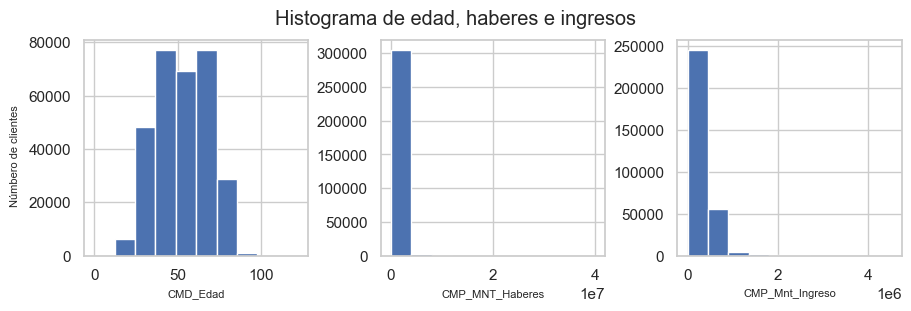

In [208]:
cols_people1 = ['CMD_Edad', 'CMP_MNT_Haberes','CMP_Mnt_Ingreso']
fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
for i in range(3):
    ax[i].hist(X[cols_people1[i]], bins=10)
    ax[i].set_xlabel(cols_people1[i], size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de edad, haberes e ingresos")
fig.show()

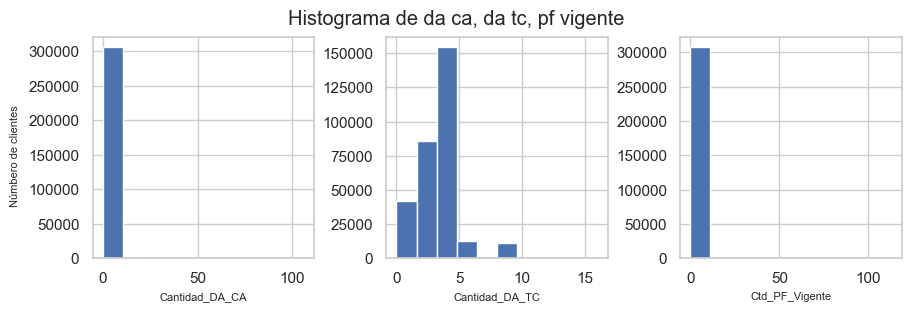

In [209]:
##'DebitoAutomaticoMesPesos','TotalIMPORTEXMES_SeguroVida','Ctd_TrxMonUlt12M_Bancon','Cuenta_Adelanto_28_IMPORTE','PHipotecarioUVAIMPORTE'
        
cols_people2 = ['Cantidad_DA_CA','Cantidad_DA_TC','Ctd_PF_Vigente']
fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
for i in range(3):
    ax[i].hist(X[cols_people2[i]], bins=10)
    ax[i].set_xlabel(cols_people2[i], size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de da ca, da tc, pf vigente")
fig.show()

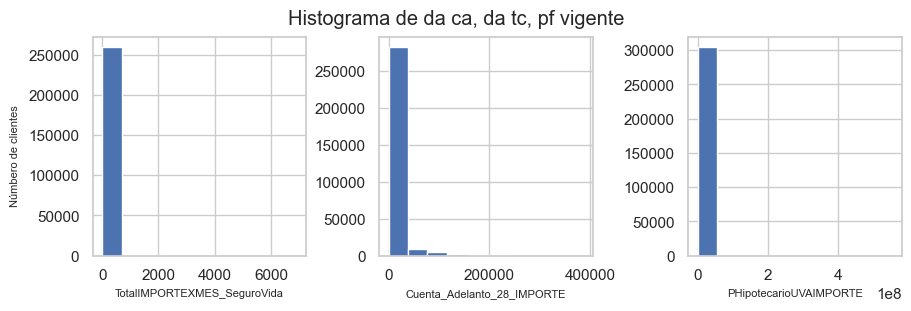

In [210]:
##'DebitoAutomaticoMesPesos','','Ctd_TrxMonUlt12M_Bancon','',''
        
cols_people3 = ['TotalIMPORTEXMES_SeguroVida','Cuenta_Adelanto_28_IMPORTE','PHipotecarioUVAIMPORTE']
fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
for i in range(3):
    ax[i].hist(X[cols_people3[i]], bins=10)
    ax[i].set_xlabel(cols_people3[i], size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de da ca, da tc, pf vigente")
fig.show()

Text(0.5, 0.98, 'Histograma de seguro de vida, cuenta adelanto, ph uva')

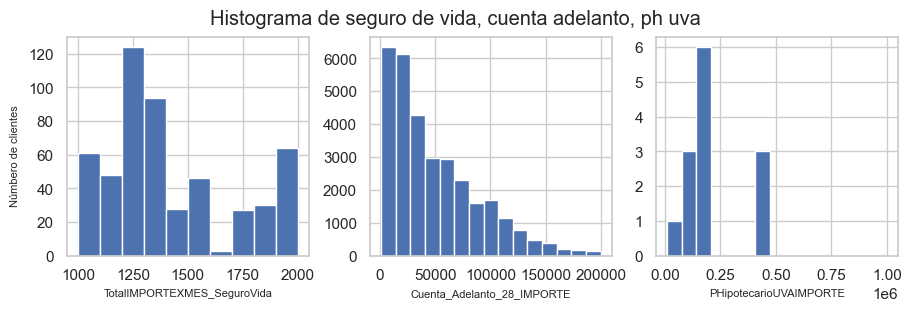

In [211]:

fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
ax[0].hist(X["TotalIMPORTEXMES_SeguroVida"], bins=10, range=(1000,2000)); ax[0].set_xlabel("TotalIMPORTEXMES_SeguroVida", size=8)
ax[1].hist(X["Cuenta_Adelanto_28_IMPORTE"], bins=15, range=(1000,200000)); ax[1].set_xlabel("Cuenta_Adelanto_28_IMPORTE", size=8)
ax[2].hist(X["PHipotecarioUVAIMPORTE"], bins=15, range=(10000,1000000)); ax[2].set_xlabel("PHipotecarioUVAIMPORTE", size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de seguro de vida, cuenta adelanto, ph uva")

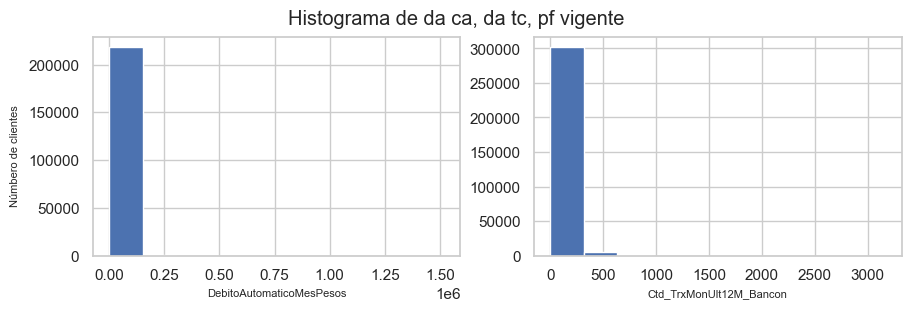

In [212]:

        
cols_people4 = ['DebitoAutomaticoMesPesos','Ctd_TrxMonUlt12M_Bancon']
fig, ax = plt.subplots(1,2, figsize=(9,3), constrained_layout=True)
for i in range(2):
    ax[i].hist(X[cols_people4[i]], bins=10)
    ax[i].set_xlabel(cols_people4[i], size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de da ca, da tc, pf vigente")
fig.show()

Text(0.5, 0.98, 'Histograma de debito automatico, trx monto bancon')

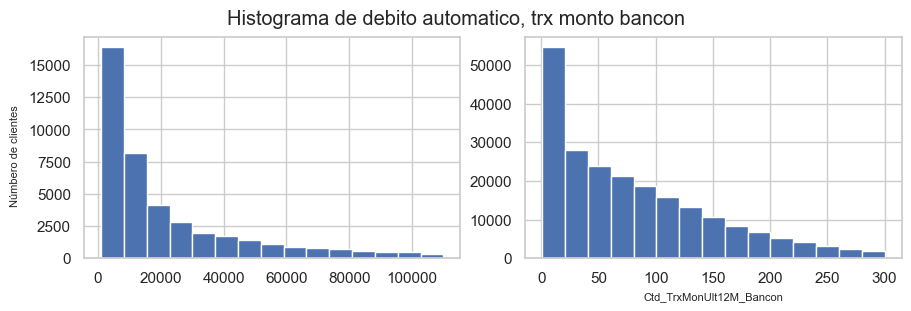

In [213]:

fig, ax = plt.subplots(1,2, figsize=(9,3), constrained_layout=True)
ax[0].hist(X["DebitoAutomaticoMesPesos"], bins=15, range=(1000,110000)); ax[1].set_xlabel("DebitoAutomaticoMesPesos", size=8)
ax[1].hist(X["Ctd_TrxMonUlt12M_Bancon"], bins=15, range=(1,300)); ax[1].set_xlabel("Ctd_TrxMonUlt12M_Bancon", size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de debito automatico, trx monto bancon")

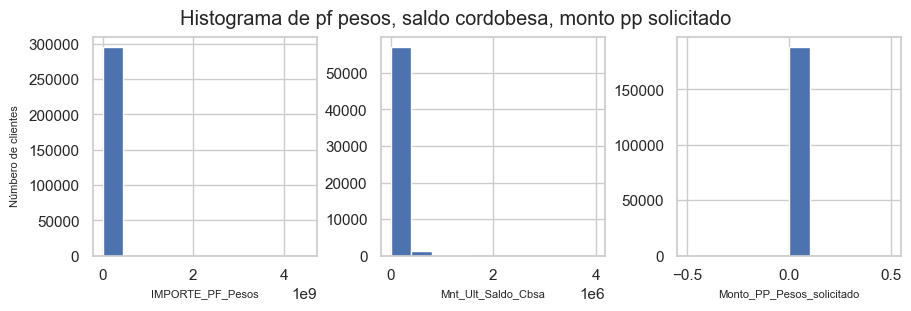

In [214]:
cols_people = ['IMPORTE_PF_Pesos','Mnt_Ult_Saldo_Cbsa','Monto_PP_Pesos_solicitado']
fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
for i in range(3):
    ax[i].hist(X[cols_people[i]], bins=10)
    ax[i].set_xlabel(cols_people[i], size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de pf pesos, saldo cordobesa, monto pp solicitado")
fig.show()

Ajustamos los valores

Text(0.5, 0.98, 'Histograma de importe pf pesos, saldo cordobesa, monto pp')

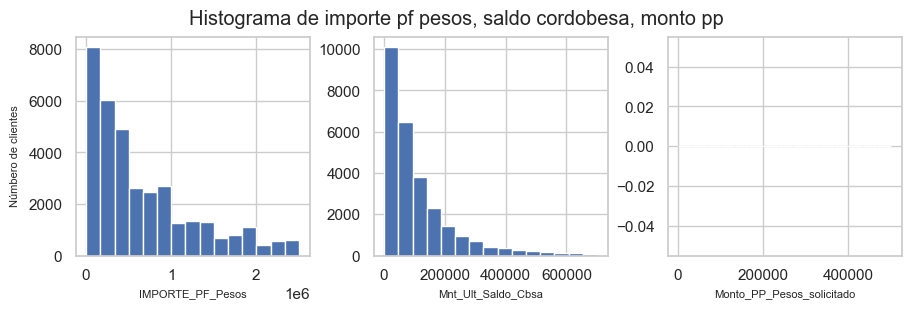

In [215]:

fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
ax[0].hist(X["IMPORTE_PF_Pesos"], bins=15, range=(1000,2500000)); ax[0].set_xlabel("IMPORTE_PF_Pesos", size=8)
ax[1].hist(X["Mnt_Ult_Saldo_Cbsa"], bins=15, range=(1000,700000)); ax[1].set_xlabel("Mnt_Ult_Saldo_Cbsa", size=8)
ax[2].hist(X["Monto_PP_Pesos_solicitado"], bins=15, range=(1000,500000)); ax[2].set_xlabel("Monto_PP_Pesos_solicitado", size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de importe pf pesos, saldo cordobesa, monto pp")

Text(0.5, 0.98, 'Histograma de edad, haberes, ingresos')

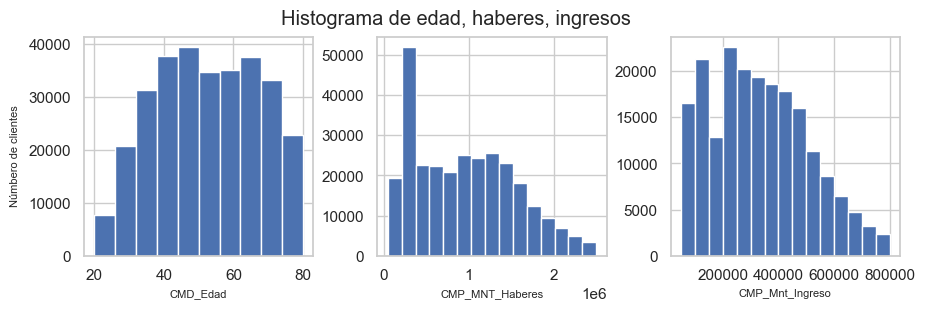

In [216]:

fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
ax[0].hist(X["CMD_Edad"], bins=10, range=(20,80)); ax[0].set_xlabel("CMD_Edad", size=8)
ax[1].hist(X["CMP_MNT_Haberes"], bins=15, range=(50000,2500000)); ax[1].set_xlabel("CMP_MNT_Haberes", size=8)
ax[2].hist(X["CMP_Mnt_Ingreso"], bins=15, range=(50000,800000)); ax[2].set_xlabel("CMP_Mnt_Ingreso", size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de edad, haberes, ingresos")

In [217]:
##### fig, ax = plt.subplots(1,3, figsize=(9,3), constrained_layout=True)
ax[0].hist(X["Cantidad_DA_CA"], bins=10, range=(0,10)); ax[0].set_xlabel("Cantidad_DA_CA", size=8)
ax[1].hist(X["Cantidad_DA_TC"], bins=15, range=(0,10)); ax[1].set_xlabel("Cantidad_DA_TC", size=8)
ax[2].hist(X["Ctd_PF_Vigente"], bins=15, range=(0,5)); ax[2].set_xlabel("Ctd_PF_Vigente", size=8)
fig.supylabel("Númbero de clientes", size=8)
fig.suptitle("Histograma de da ca, da tc, pf vigente")

Text(0.5, 0.98, 'Histograma de da ca, da tc, pf vigente')

In [218]:
age_99 = X["CMD_Edad"].quantile(q=0.99, interpolation="lower")
haberes_99 = X["CMP_MNT_Haberes"].quantile(q=0.99, interpolation="lower")
ingresos_99 = X["CMP_Mnt_Ingreso"].quantile(q=0.99, interpolation="lower")
print("Percentil 99 de la variable Edad es {}".format(age_99))
print("Percentil 99 de la variable Haberes es {}".format(haberes_99))
print("Percentil 99 de la variable Ingresos es {}".format(ingresos_99))

Percentil 99 de la variable Edad es 83.0
Percentil 99 de la variable Haberes es 3973806.0
Percentil 99 de la variable Ingresos es 1195598.0


## Graficamos TODO el data Set

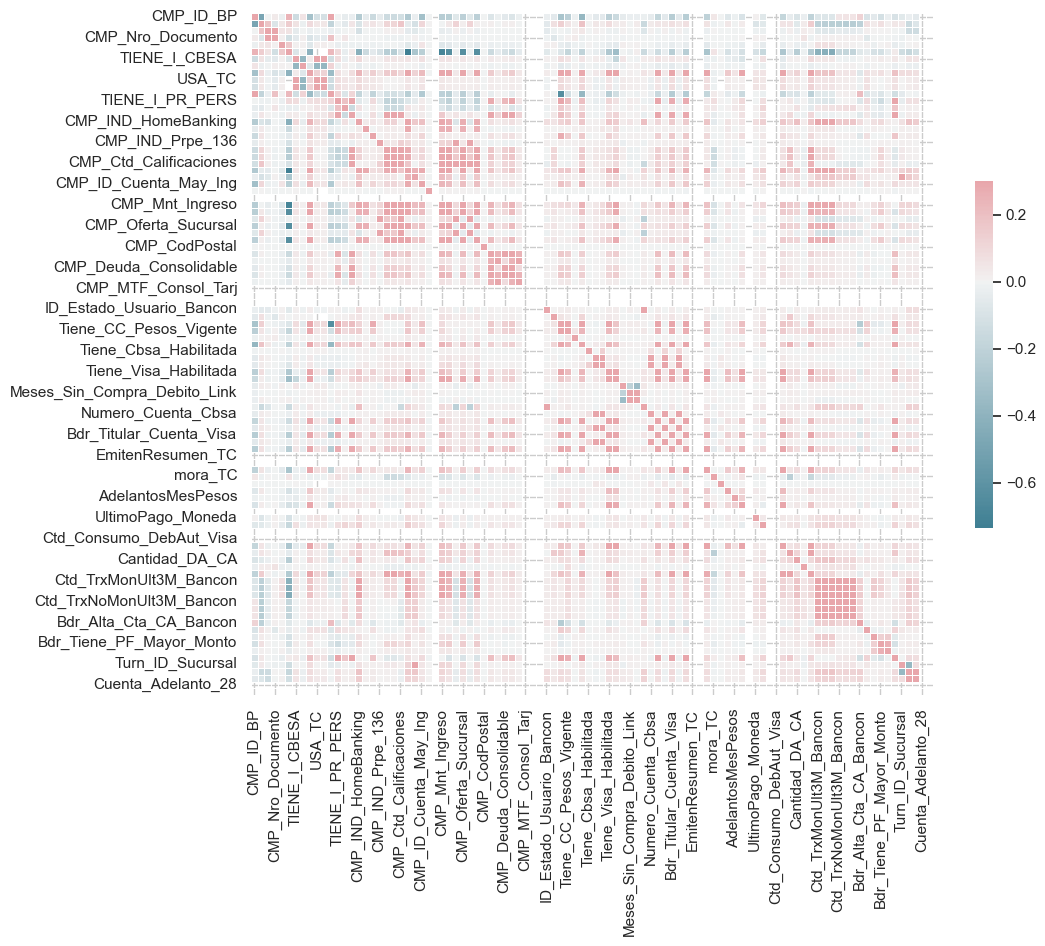

In [219]:
# 'Graficamos la relación entre Campos Importantes como ser: Tiene PAquetes, Tiene Tarjeta de Crédito Visa y Cordobesa, Tiene Préstamo y Su sueldo'
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(200, 10, as_cmap=True)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(df)

## Graficamos los datos de la lista de caracteristica

Sacamos el campo sexo, usa_tc, limite_calificacion_riesgo, bdr_tiene_da, cantidad_da_cc, tiene_i_visa porque no es representativo

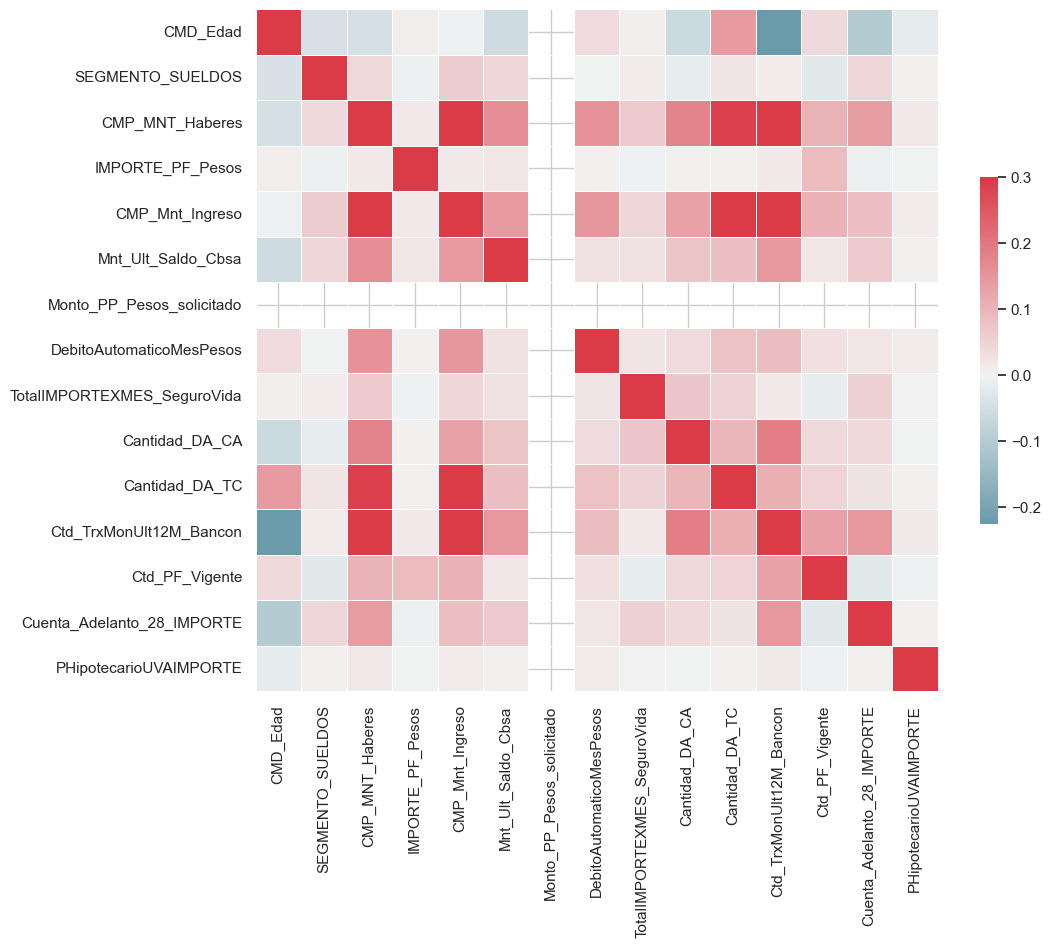

In [220]:
# 'Graficamos la relación entre Campos Importantes como ser: Tiene PAquetes, Tiene Tarjeta de Crédito Visa y Cordobesa, Tiene Préstamo y Su sueldo'
def plot_corr(X):
    corr = X.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(200, 10, as_cmap=True)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(X)

In [221]:
print(f'Dimensión del espacio de los datos: {len(X.columns)}')

Dimensión del espacio de los datos: 15


In [222]:
X.describe()

CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
count  307653.000000     307653.000000     3.076530e+05      2.954390e+05   
mean       52.636675          2.056375     1.041113e+06      2.387902e+05   
std        15.471746          2.089248     8.528648e+05      8.847719e+06   
min         0.000000          0.000000     1.020000e+02      0.000000e+00   
25%        40.000000          0.000000     3.756120e+05      0.000000e+00   
50%        52.000000          2.000000     9.391440e+05      0.000000e+00   
75%        65.000000          3.000000     1.445905e+06      0.000000e+00   
max       122.000000          7.000000     4.003759e+07      4.500000e+09   

       CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
count     3.076530e+05        5.870100e+04                   188197.0   
mean      2.556037e+05        6.120861e+04                        0.0   
std       2.765165e+05        1.405111e+05                        0.0   
min       0.000000e+00        0.000000e+00                        0.0   
25%       0.000000e+00        0.000000e+00                        0.0   
50%       2.156490e+05        0.000000e+00                        0.0   
75%       4.089250e+05        6.800000e+04                        0.0   
max       4.508893e+06        3.976935e+06                        0.0   

       DebitoAutomaticoMesPesos  TotalIMPORTEXMES_SeguroVida  Cantidad_DA_CA  \
count              2.194100e+05                261051.000000   307653.000000   
mean               6.175202e+03                    33.523231        0.974998   
std                2.522680e+04                   143.358060        2.117472   
min                0.000000e+00                     0.000000        0.000000   
25%                0.000000e+00                     0.000000        0.000000   
50%                0.000000e+00                     0.000000        0.000000   
75%                0.000000e+00                     0.000000        2.000000   
max                1.517640e+06                  6910.000000      106.000000   

       Cantidad_DA_TC  Ctd_TrxMonUlt12M_Bancon  Ctd_PF_Vigente  \
count   307653.000000            307653.000000   307653.000000   
mean         3.250321                66.080796        0.299669   
std          1.745758                89.894707        1.119550   
min          0.000000                 0.000000        0.000000   
25%          2.000000                 0.000000        0.000000   
50%          4.000000                32.000000        0.000000   
75%          4.000000               103.000000        0.000000   
max         16.000000              3162.000000      113.000000   

       Cuenta_Adelanto_28_IMPORTE  PHipotecarioUVAIMPORTE  
count               298485.000000            3.046850e+05  
mean                  5430.656897            1.333444e+05  
std                  21201.685634            7.407282e+06  
min                      0.000000            0.000000e+00  
25%                      0.000000            0.000000e+00  
50%                      0.000000            0.000000e+00  
75%                      0.000000            0.000000e+00  
max                 386000.000000            5.535738e+08

In [228]:

# Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset
X.columns = X.columns.str.replace('#N/D', '0')
X.head()



CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
0      75.0               0.0        1723860.0          200000.0   
1      81.0               2.0         579360.0               NaN   
2      74.0               1.0         710878.0               0.0   
3      87.0               0.0        1355498.0               0.0   
4      85.0               0.0        1471561.0               NaN   

   CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
0         457161.0                 NaN                        0.0   
1         193120.0                 NaN                        0.0   
2         187350.0                 NaN                        0.0   
3              0.0                 NaN                        0.0   
4              0.0                 NaN                        0.0   

   DebitoAutomaticoMesPesos  TotalIMPORTEXMES_SeguroVida  Cantidad_DA_CA  \
0                       NaN                          0.0             1.0   
1                  181209.0                          0.0             0.0   
2                   16770.0                          0.0             4.0   
3                       0.0                          0.0             0.0   
4                       NaN                          0.0             0.0   

   Cantidad_DA_TC  Ctd_TrxMonUlt12M_Bancon  Ctd_PF_Vigente  \
0             4.0                    118.0             1.0   
1             3.0                    137.0            22.0   
2             4.0                     61.0             0.0   
3             4.0                      0.0             0.0   
4             4.0                    241.0             2.0   

   Cuenta_Adelanto_28_IMPORTE  PHipotecarioUVAIMPORTE  
0                         0.0                     0.0  
1                         0.0                     0.0  
2                         0.0                     0.0  
3                         0.0                     0.0  
4                         0.0                     0.0

In [231]:

X = pd.DataFrame(X)
X = X.fillna(0)
X.describe

<bound method NDFrame.describe of         CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
0           75.0               0.0        1723860.0          200000.0   
1           81.0               2.0         579360.0               0.0   
2           74.0               1.0         710878.0               0.0   
3           87.0               0.0        1355498.0               0.0   
4           85.0               0.0        1471561.0               0.0   
...          ...               ...              ...               ...   
307648       0.0               0.0          35014.0               0.0   
307649       0.0               0.0         284508.0               0.0   
307650       0.0               0.0         266940.0        10000000.0   
307651       0.0               0.0         205116.0               0.0   
307652       0.0               0.0         807862.0               0.0   

        CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
0              

## 2) Visualización con TSNE y PCA

### Primero rescalamos los datos a utilizar

In [232]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled.shape

(307653, 15)

# Análisis PCA

In [233]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_scaled)

df_pca = pd.DataFrame(pca, columns = ["x1", "x2"])

X_pca = X.copy()
X_pca['x1'] = df_pca["x1"]
X_pca['x2'] = df_pca["x2"]

### t-distributed stochastic neighbor embedding

In [436]:
from sklearn.manifold import TSNE
Xtsne = TSNE(n_components=2).fit_transform(X_scaled)

df_tsne = pd.DataFrame(Xtsne, columns = ["x1", "x2"])

X_tsne = X.copy()
X_tsne['x1'] = df_tsne["x1"]
X_tsne['x2'] = df_tsne["x2"]

In [437]:
X_tsne.columns
# X.columns

Index(['CMD_Edad', 'SEGMENTO_SUELDOS', 'CMP_MNT_Haberes', 'IMPORTE_PF_Pesos',
       'CMP_Mnt_Ingreso', 'Mnt_Ult_Saldo_Cbsa', 'DebitoAutomaticoMesPesos',
       'TotalIMPORTEXMES_SeguroVida', 'CMP_MTF_Max_Consolidable',
       'Cantidad_DA_CA', 'Cantidad_DA_TC', 'Ctd_TrxMonUlt12M_Bancon',
       'Ctd_PF_Vigente', 'PHipotecarioUVAIMPORTE', 'x1', 'x2'],
      dtype='object')

In [438]:
X_tsne['CMP_MNT_Haberes'].describe()
##df['Ingresos'].describe()

count    1.502400e+04
mean     1.053630e+06
std      6.361865e+05
min      1.760000e+02
25%      6.256488e+05
50%      1.081870e+06
75%      1.417436e+06
max      2.057548e+07
Name: CMP_MNT_Haberes, dtype: float64

Text(0.5, 1.0, 'PCA 2D')

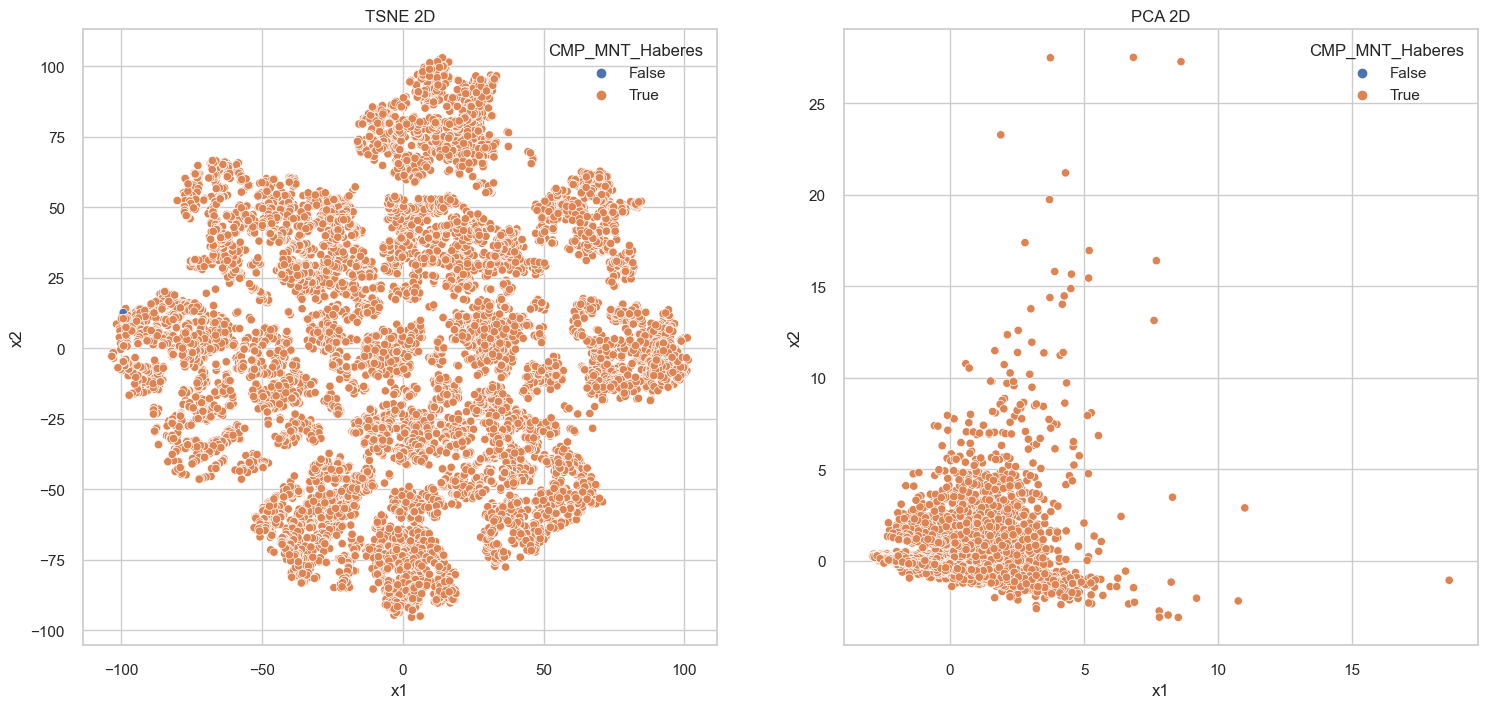

In [439]:
hue = X_tsne['CMP_MNT_Haberes'] > 1000

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.scatterplot(data=X_tsne,x = 'x1',y = 'x2',ax=ax[0], hue = hue)
ax[0].set_title('TSNE 2D')
sns.scatterplot(data = X_pca, x = 'x1', y = 'x2',ax=ax[1], hue = hue)
ax[1].set_title('PCA 2D')

# 3) Elaboración y evaluacíon de Clusters: K-Means

### Clusters utilizando kMeans



In [234]:
from sklearn.cluster import KMeans

In [235]:
### Buscamos el valor de k

Text(0.5, 1.0, 'Inercia de los k-means vs clusters')

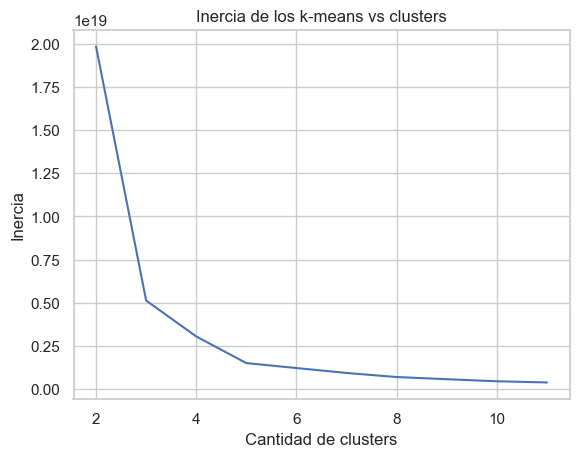

In [236]:
scores = [KMeans(n_clusters=i+2).fit(X).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Cantidad de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de los k-means vs clusters")

### Evaluación de Clusters: Distancia al Centroide, el método del codo

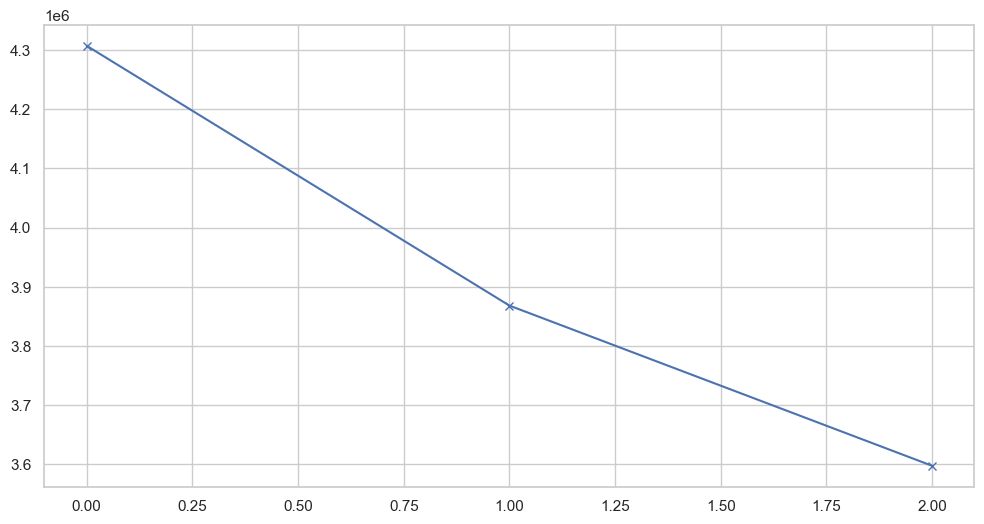

In [237]:
### Elegimos 4 clusters, porque eso lo vemos en el grafico anterior, de sugerencia

n_clusters=4
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_scaled)
    cost.append(kmean.inertia_)

plt.figure(figsize = (12,6))
plt.plot(cost, 'bx-')

### Evaluación de Clusters: Silhouette

In [130]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
K = np.arange(2,4)
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)

    # Tomamos las etiquetas
    etiquetas = km.labels_

    # Calculamos el silhouette
    valor_medio_sil = silhouette_score(X_scaled, etiquetas)
    lista_sil.append(valor_medio_sil)

plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')

plt.show()

### Valor de Silhouette para cada observación

In [ ]:
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [2]

for i, k in enumerate(lista_k):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_scaled)
    # centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')
    ax.set_title('Silhouette plot for the various clusters', y=1.02);

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

### Cuando uno terminó... aparece un código más sencillo

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

lista_k = [2, 3, 4]

for k in K:
  kmean = KMeans(n_clusters = k)

  visualizer = SilhouetteVisualizer(kmean.fit(X_scaled), colors='yellowbrick')
  visualizer.fit(X_scaled)
  visualizer.show()

### Definimos la cantidad de clusters que queremos utilizar

In [238]:
C = 4
kmean= KMeans(C)
kmean.fit(X_scaled)
labels = kmean.labels_

# Presentación de resultados

In [239]:
clusters = pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
0      75.0               0.0        1723860.0          200000.0   
1      81.0               2.0         579360.0               0.0   
2      74.0               1.0         710878.0               0.0   
3      87.0               0.0        1355498.0               0.0   
4      85.0               0.0        1471561.0               0.0   

   CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
0         457161.0                 0.0                        0.0   
1         193120.0                 0.0                        0.0   
2         187350.0                 0.0                        0.0   
3              0.0                 0.0                        0.0   
4              0.0                 0.0                        0.0   

   DebitoAutomaticoMesPesos  TotalIMPORTEXMES_SeguroVida  Cantidad_DA_CA  \
0                       0.0                          0.0             1.0   
1                  181209.0                          0.0             0.0   
2                   16770.0                          0.0             4.0   
3                       0.0                          0.0             0.0   
4                       0.0                          0.0             0.0   

   Cantidad_DA_TC  Ctd_TrxMonUlt12M_Bancon  Ctd_PF_Vigente  \
0             4.0                    118.0             1.0   
1             3.0                    137.0            22.0   
2             4.0                     61.0             0.0   
3             4.0                      0.0             0.0   
4             4.0                    241.0             2.0   

   Cuenta_Adelanto_28_IMPORTE  PHipotecarioUVAIMPORTE  cluster  
0                         0.0                     0.0        2  
1                         0.0                     0.0        2  
2                         0.0                     0.0        0  
3                         0.0                     0.0        0  
4                         0.0                     0.0        0

### ¿Cuántas observaciones fueron asignadas a cada cluster?

In [240]:
clusters['cluster'].value_counts().sort_index()

0    113378
1        92
2     85639
3    108544
Name: cluster, dtype: int64

### Hacemos uso de la función describe() filtrando por cada cluster

In [241]:
for c in np.arange(0, C, 1):
  print(f"Caracterización del Cluster {c}")
  print(clusters[clusters['cluster'] == c].describe())
  print("=============================================")

Caracterización del Cluster 0
            CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
count  113378.000000     113378.000000     1.133780e+05      1.133780e+05   
mean       67.267856          2.030685     6.804913e+05      1.533536e+05   
std         8.321129          1.567884     4.608867e+05      1.017021e+06   
min        38.000000          0.000000     8.810000e+02      0.000000e+00   
25%        61.000000          1.000000     2.882652e+05      0.000000e+00   
50%        67.000000          3.000000     5.463940e+05      0.000000e+00   
75%        73.000000          3.000000     9.858420e+05      0.000000e+00   
max       122.000000          7.000000     4.375203e+06      8.505000e+07   

       CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
count    113378.000000        1.133780e+05                   113378.0   
mean     159502.578463        1.150244e+04                        0.0   
std      149295.682493        4.949906e+04               

            CMD_Edad  SEGMENTO_SUELDOS  CMP_MNT_Haberes  IMPORTE_PF_Pesos  \
count  108544.000000     108544.000000     1.085440e+05      1.085440e+05   
mean       39.146678          2.126308     7.548297e+05      8.072870e+04   
std         9.193617          2.226152     5.158081e+05      5.984218e+05   
min         0.000000          0.000000     1.020000e+02      0.000000e+00   
25%        32.000000          0.000000     2.801288e+05      0.000000e+00   
50%        39.000000          2.000000     7.421090e+05      0.000000e+00   
75%        46.000000          4.000000     1.126640e+06      0.000000e+00   
max        74.000000          7.000000     4.595714e+06      5.400000e+07   

       CMP_Mnt_Ingreso  Mnt_Ult_Saldo_Cbsa  Monto_PP_Pesos_solicitado  \
count    108544.000000        1.085440e+05                   108544.0   
mean     134522.295171        8.206335e+03                        0.0   
std      159547.743215        4.735938e+04                        0.0   
min           

### Podemos usar un boxplot para ver si se entiende mejor...

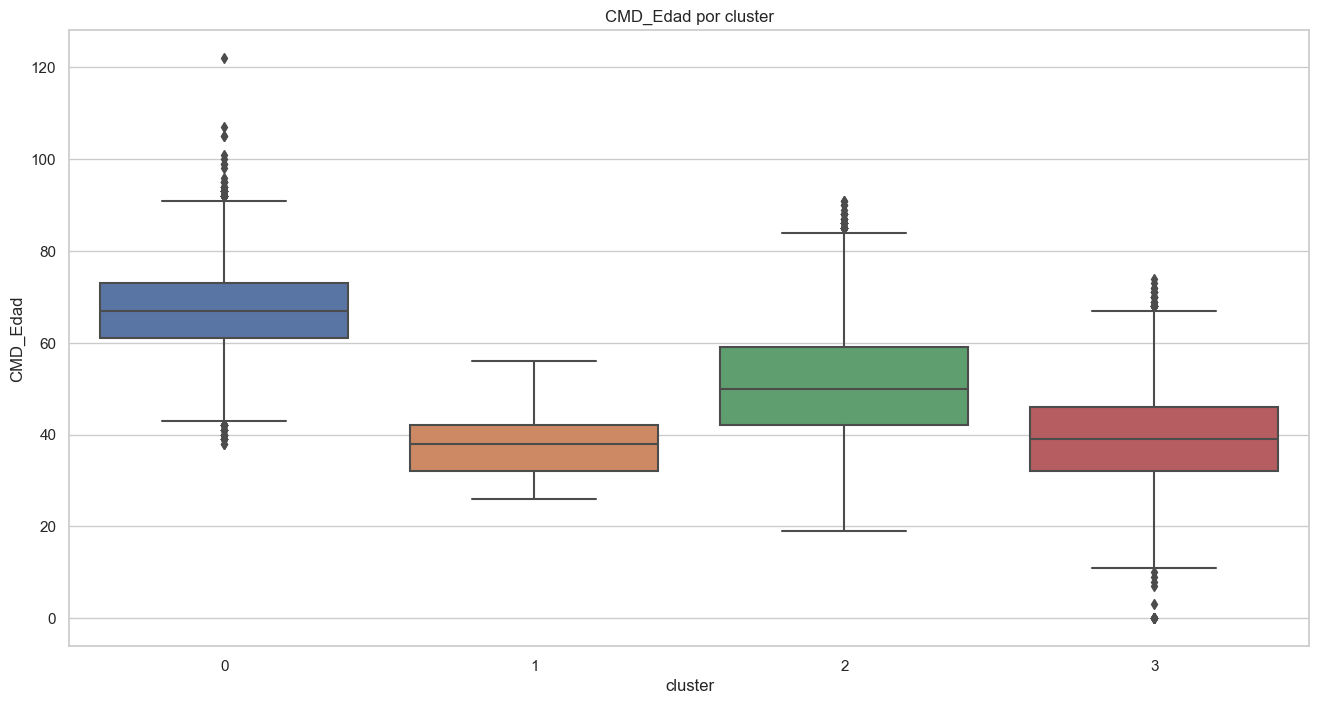

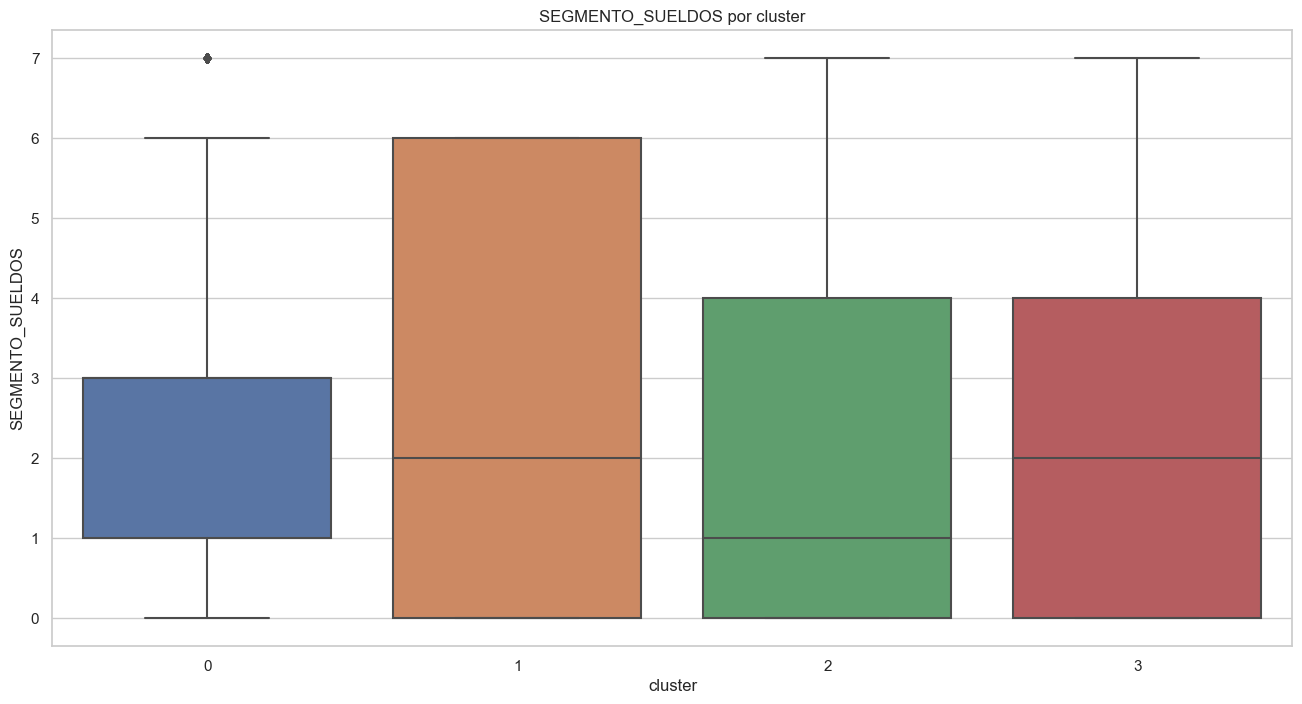

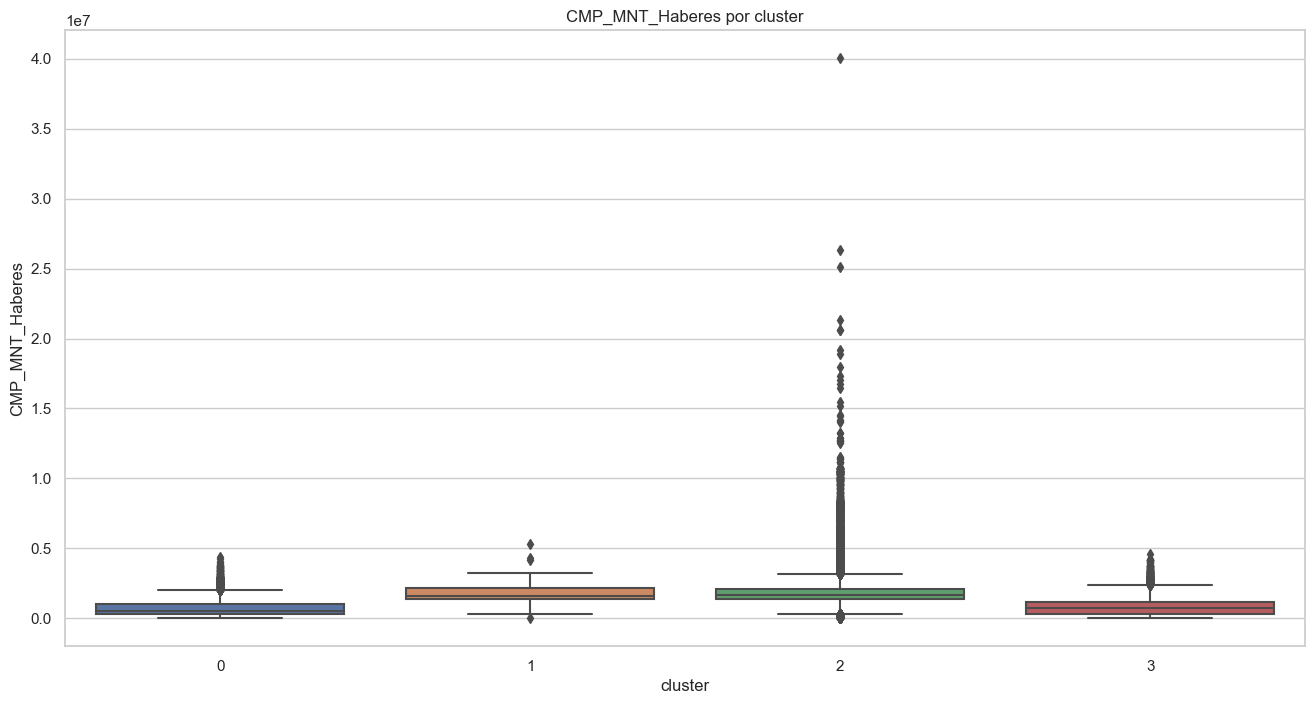

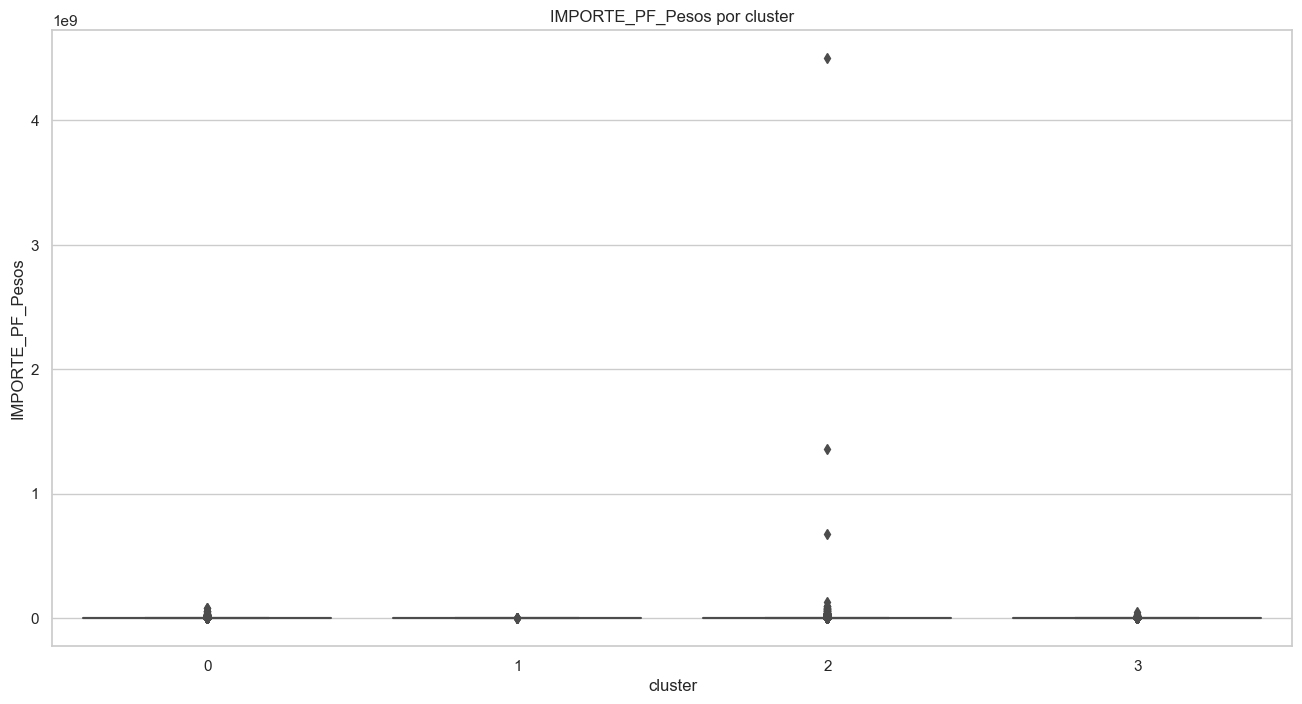

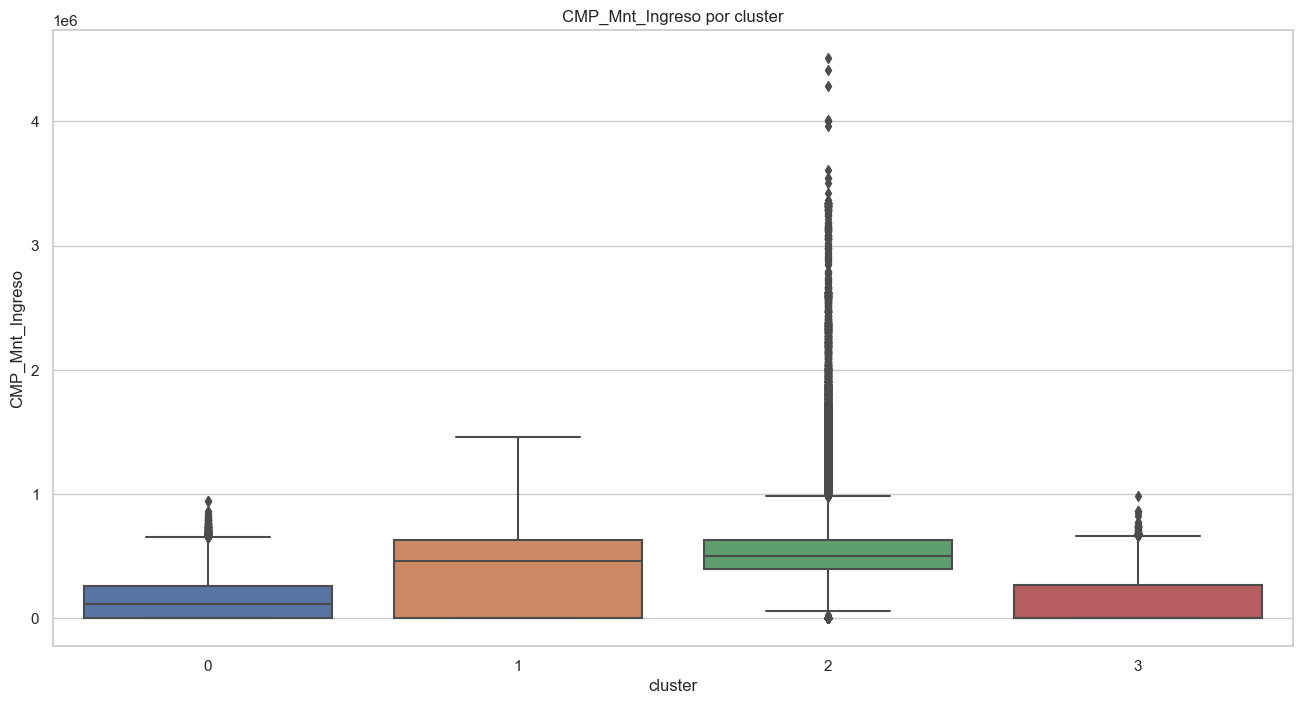

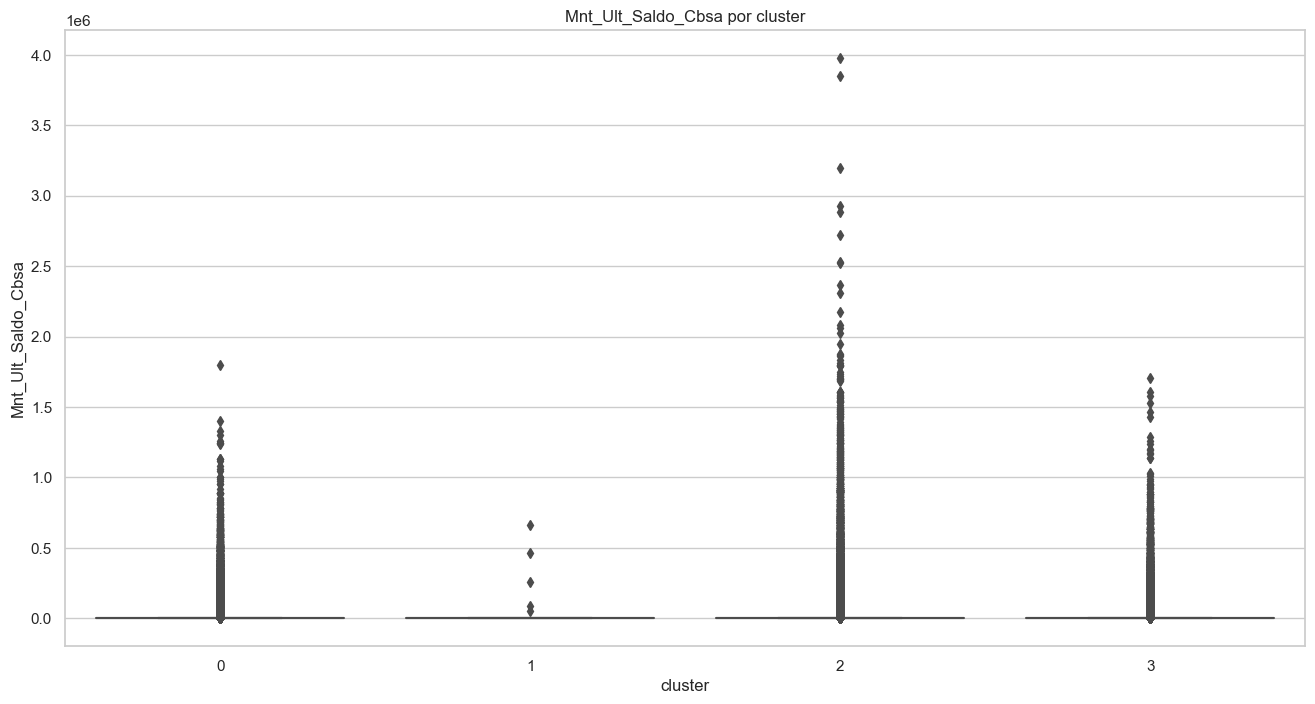

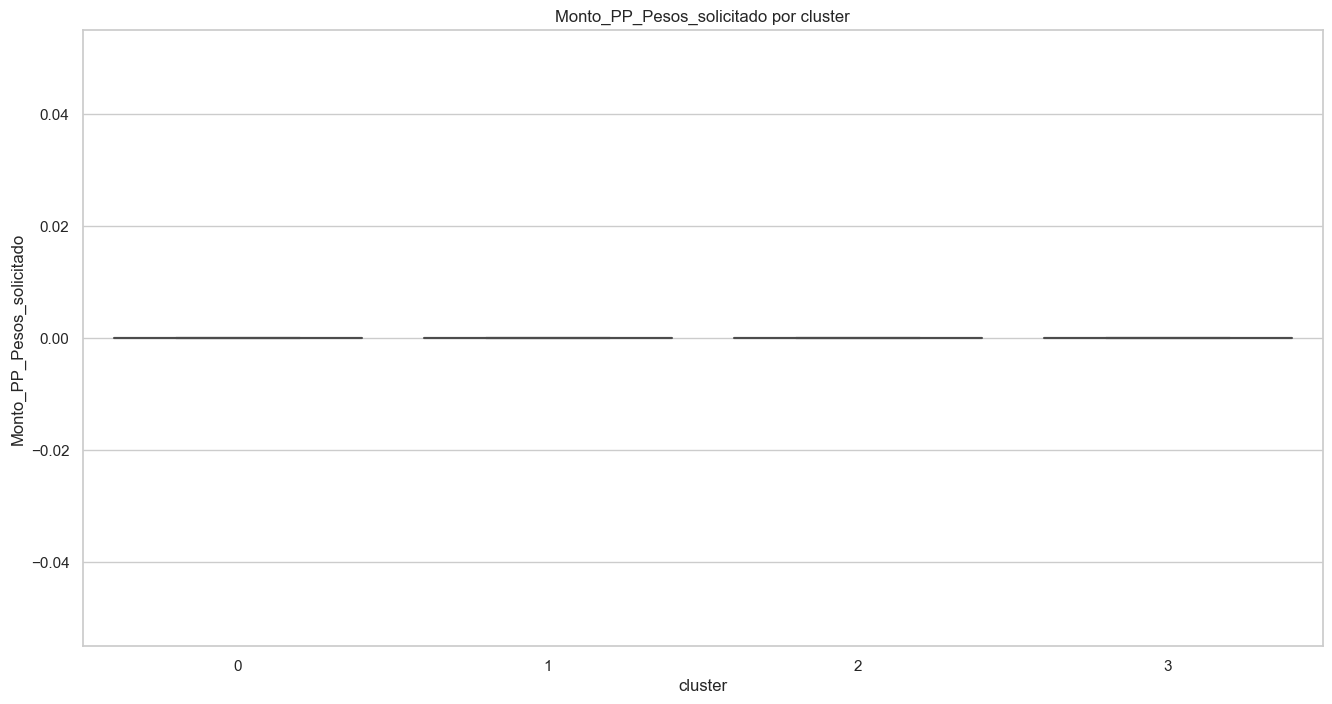

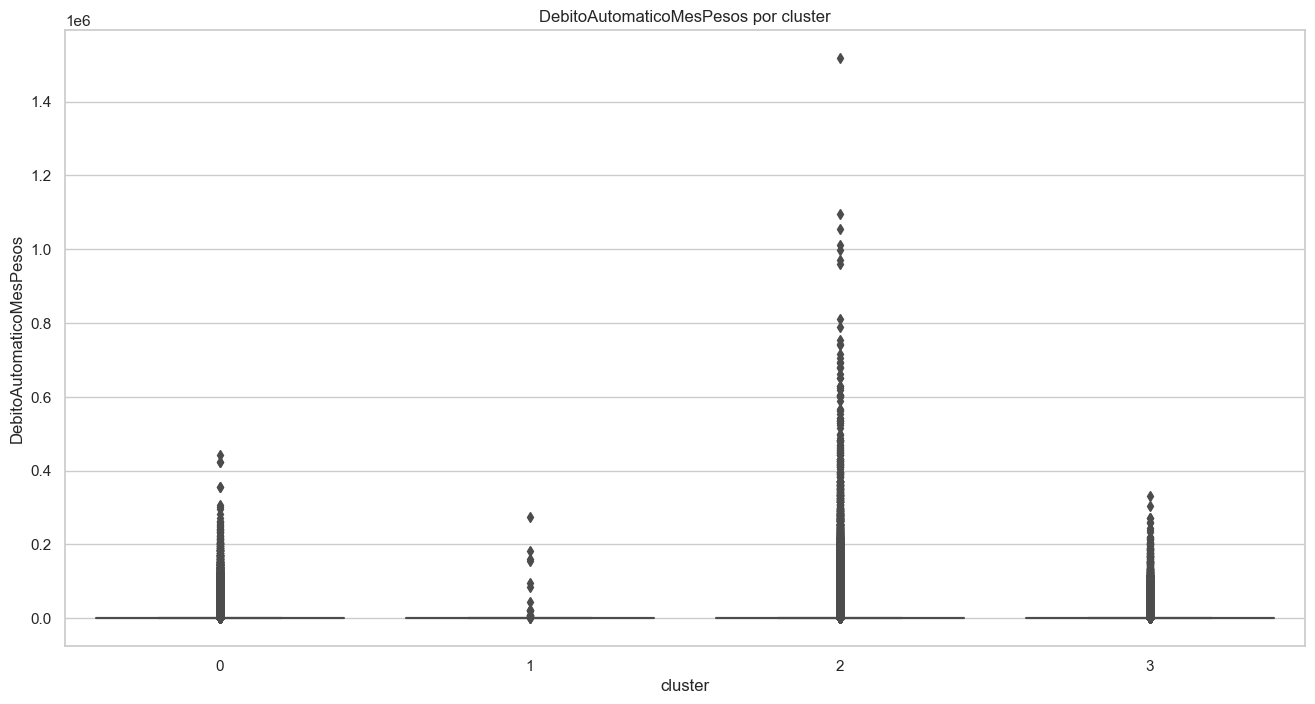

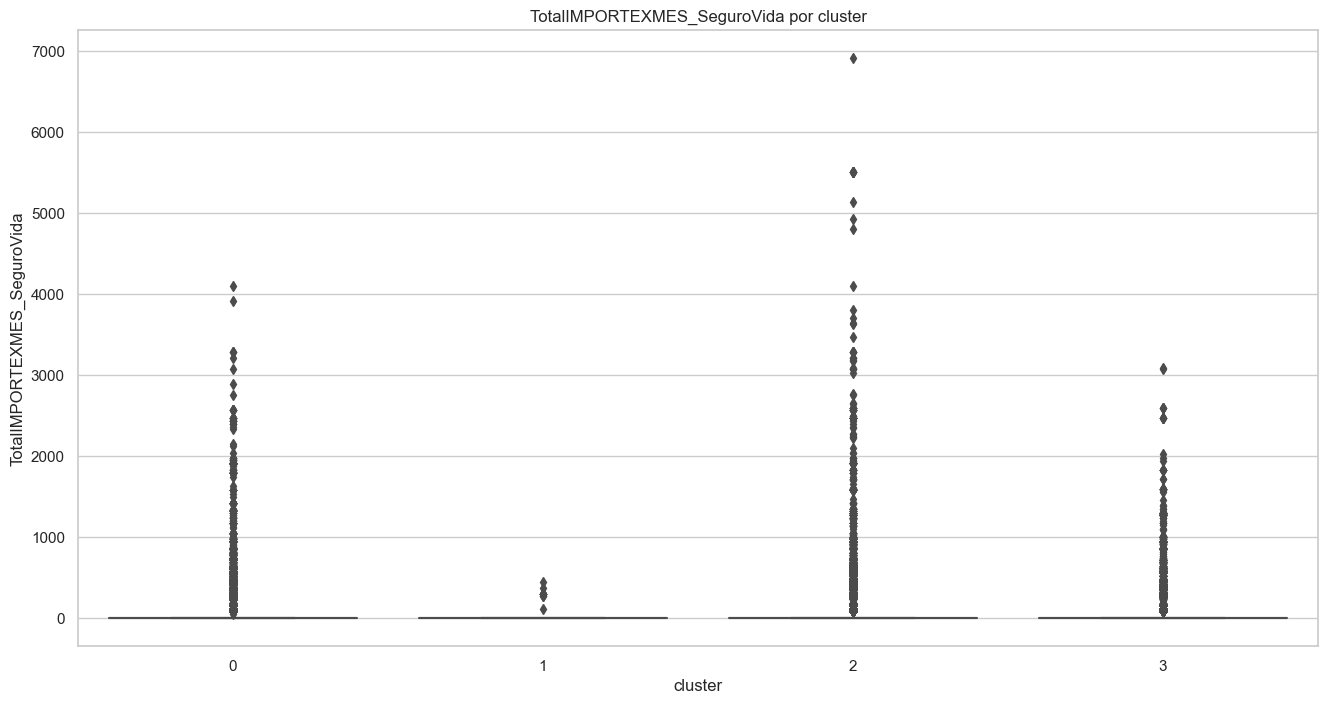

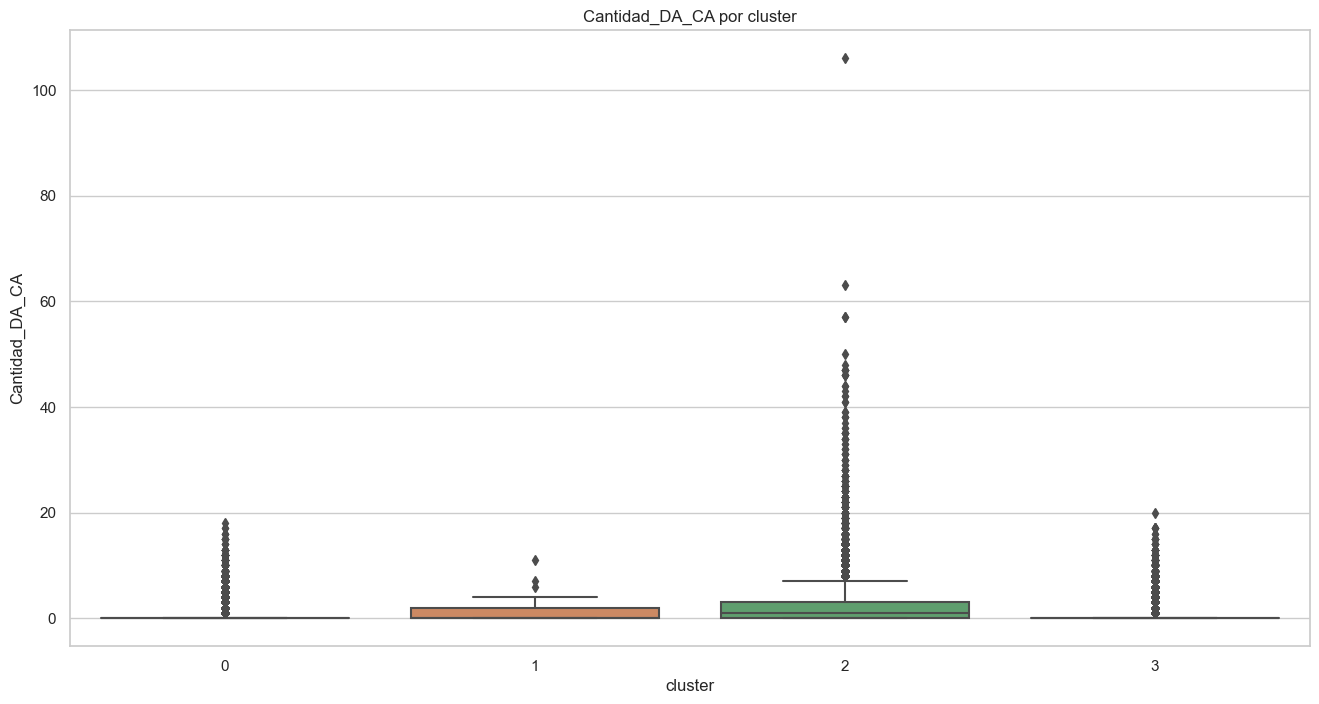

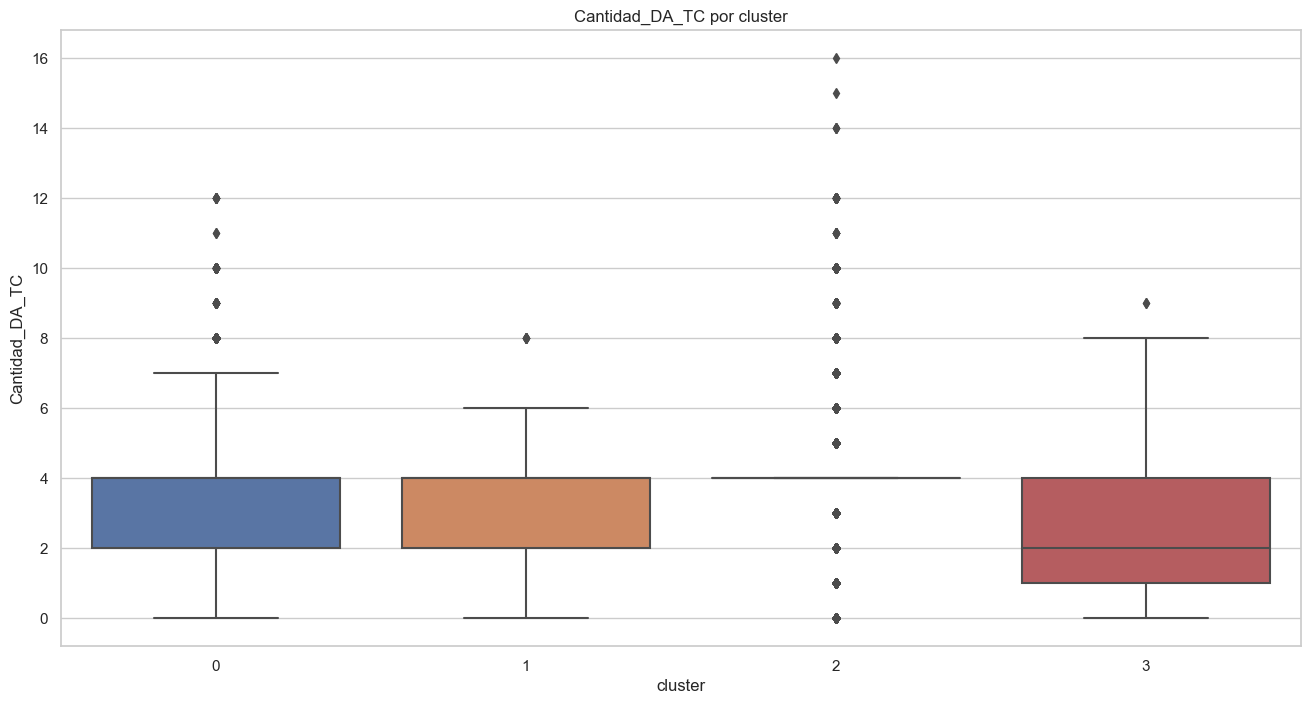

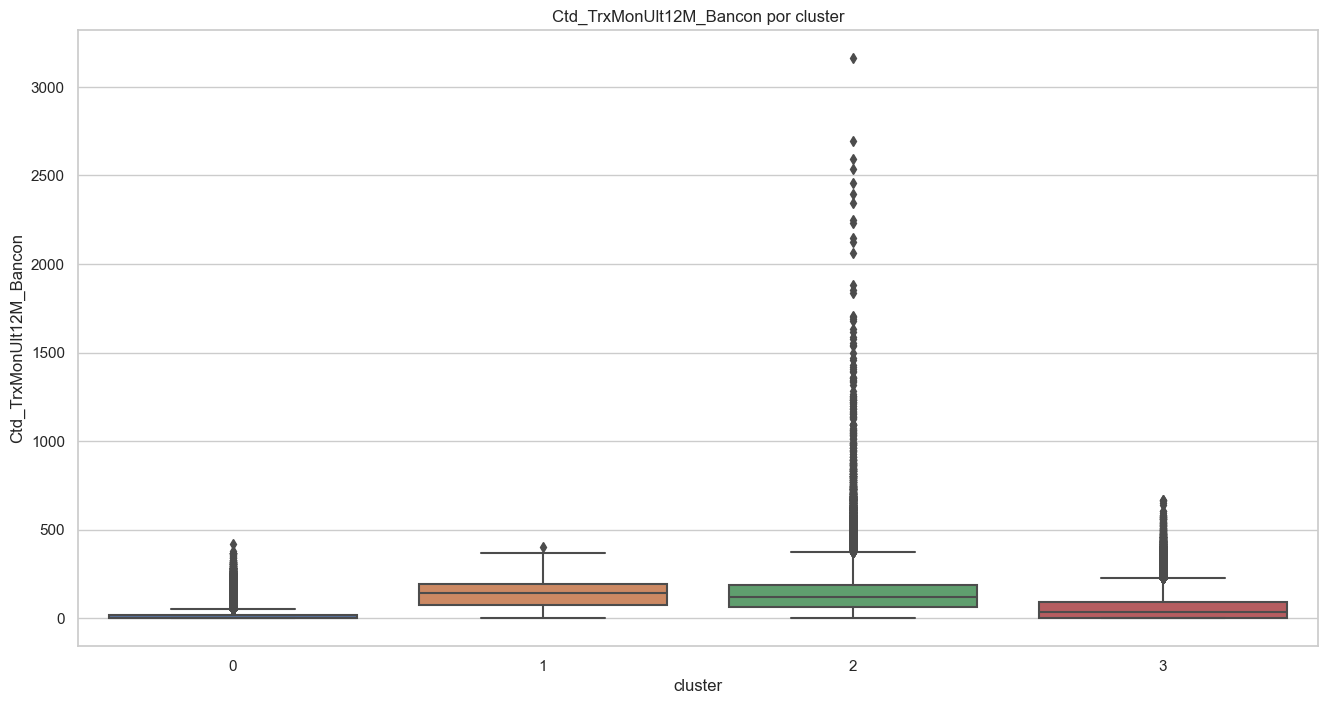

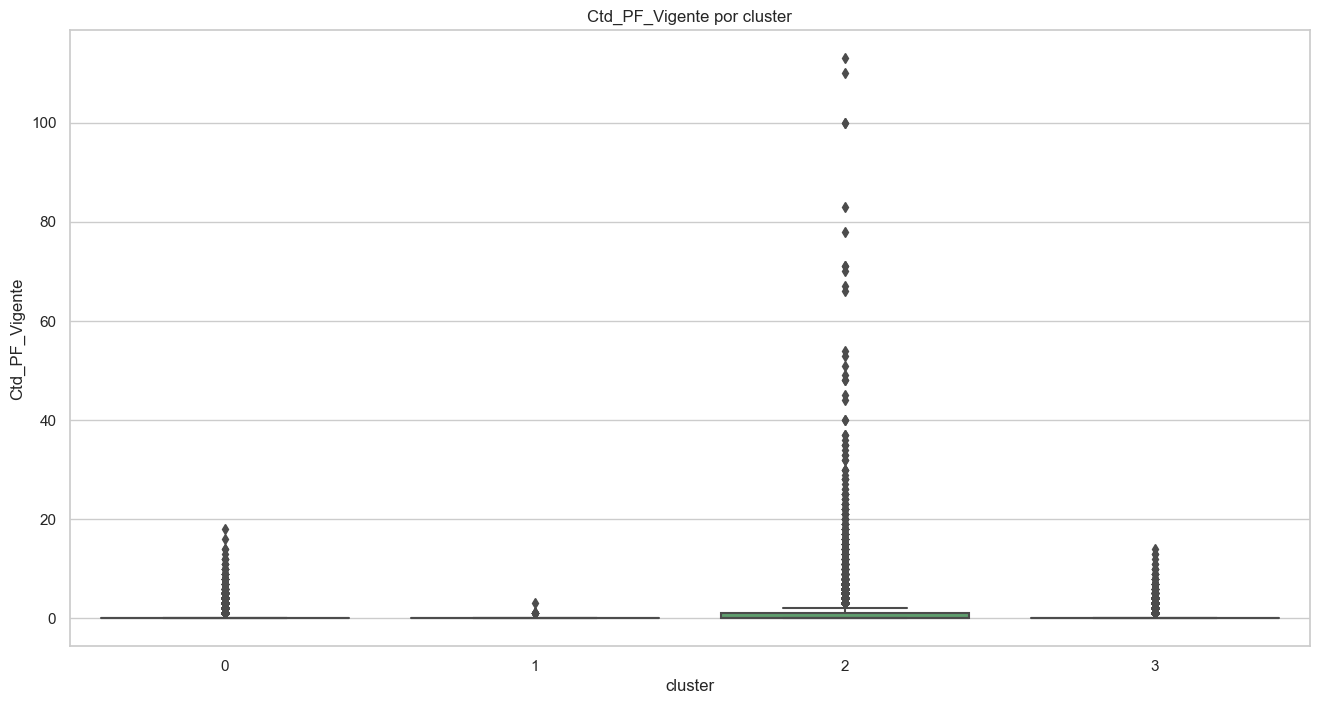

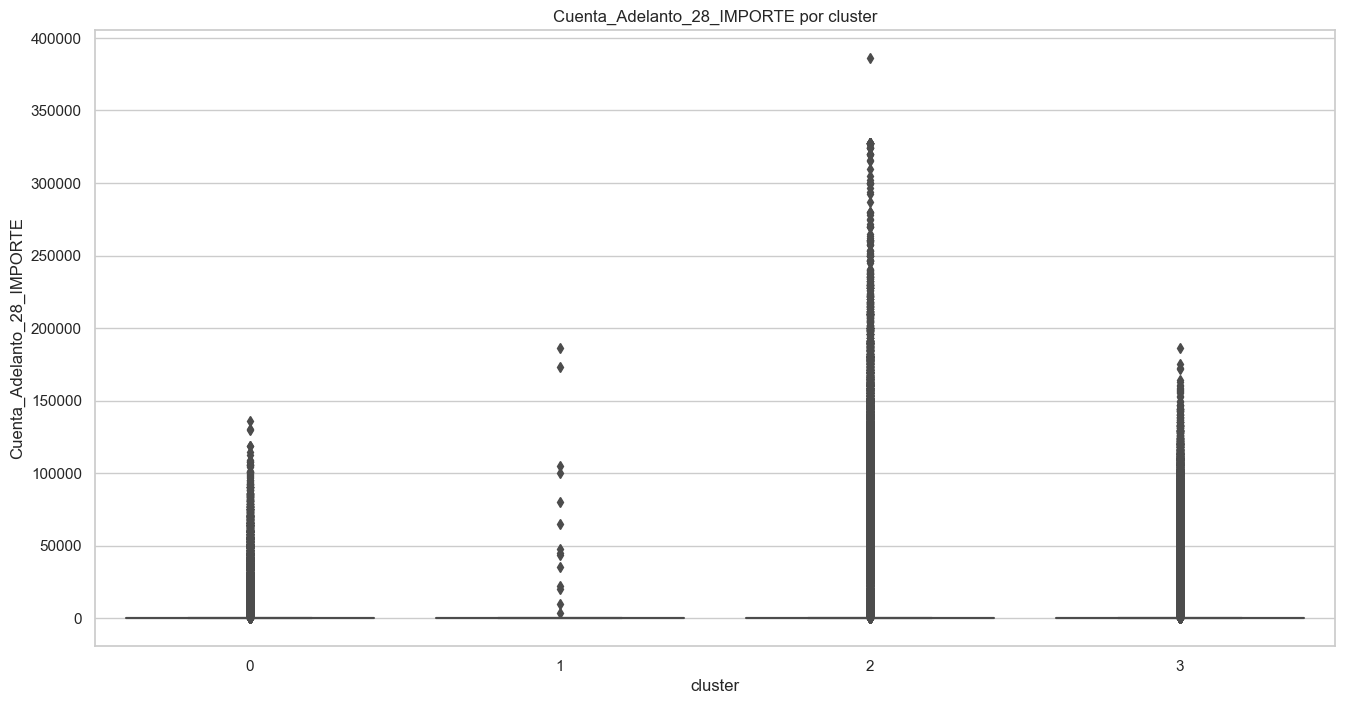

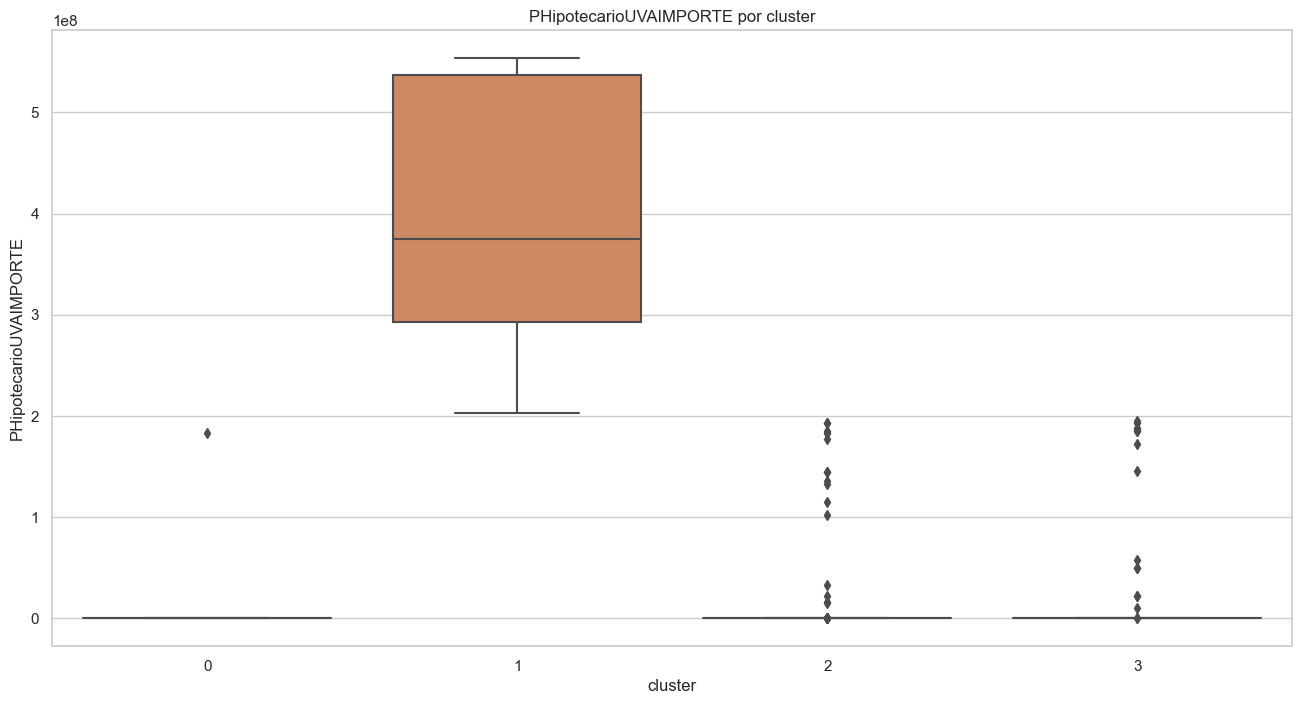

In [242]:
for col in X.columns:
  f, ax = plt.subplots(figsize=(16, 8))
  sns.boxplot(x = 'cluster', y = col,data = clusters).set_title(f"{col} por cluster")

### No queda muy claro, no? Probemos con un violinplot

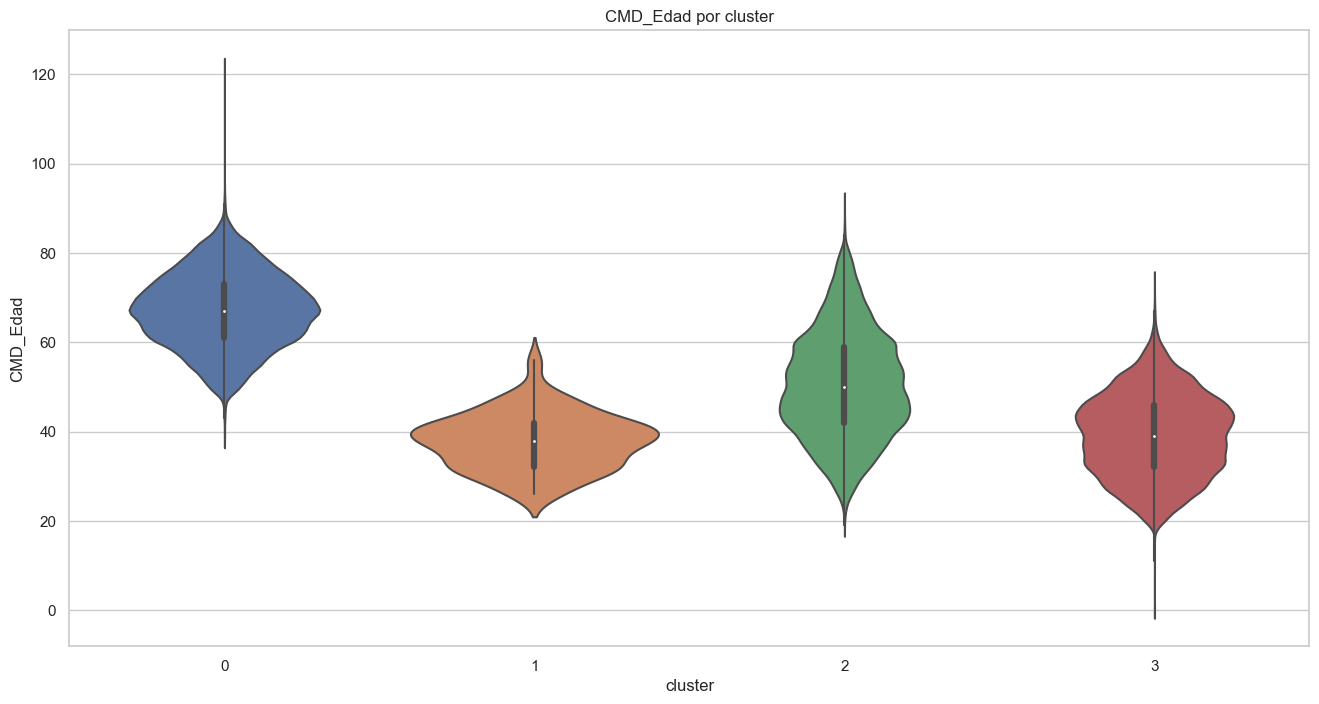

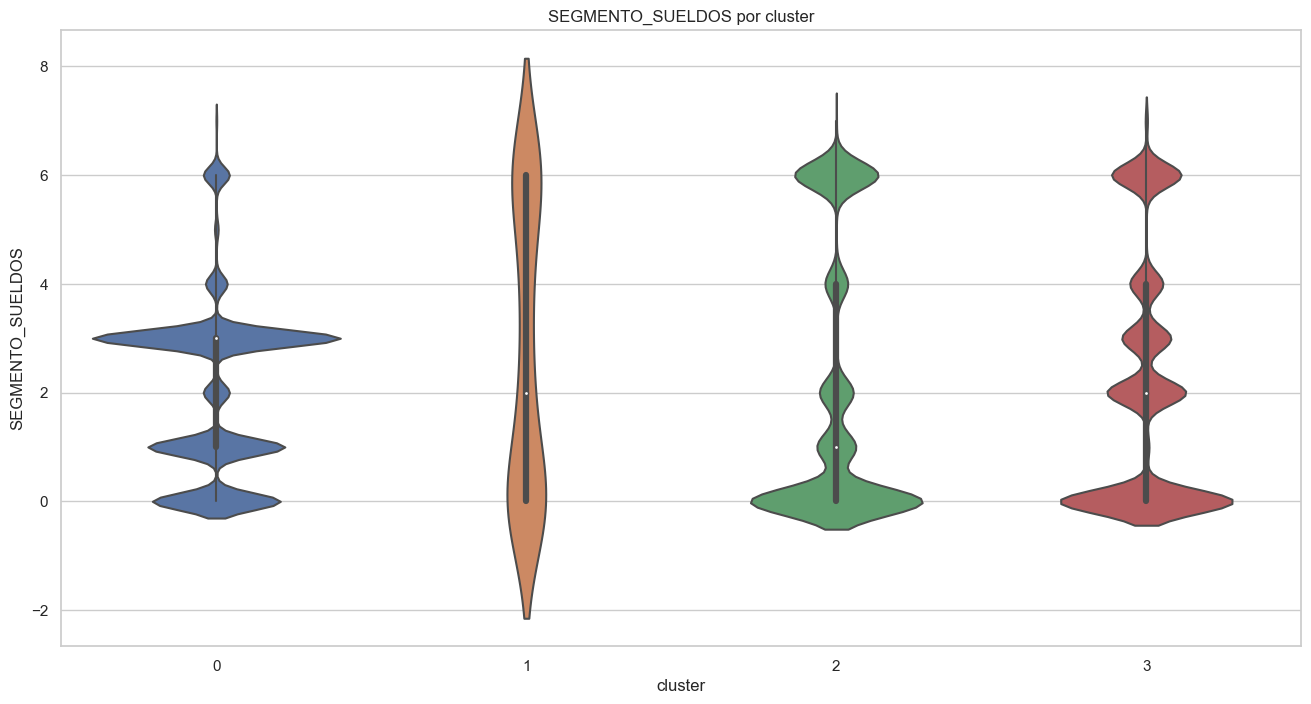

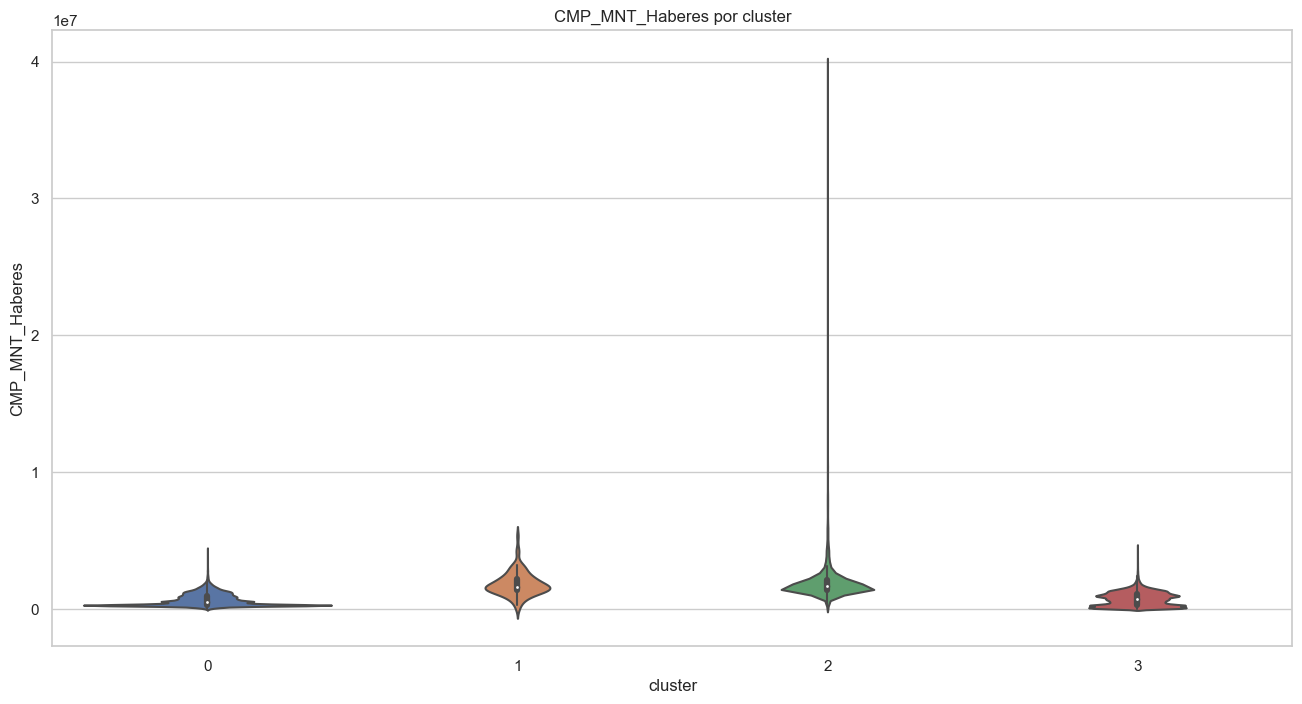

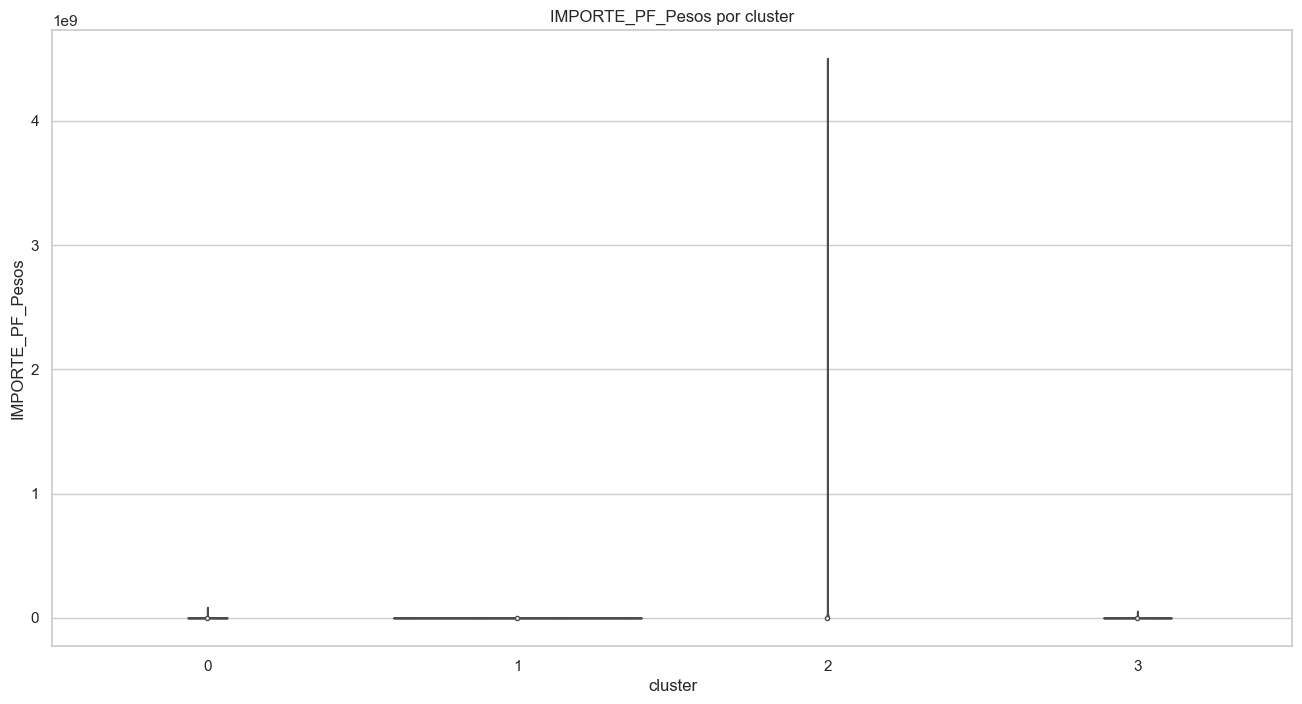

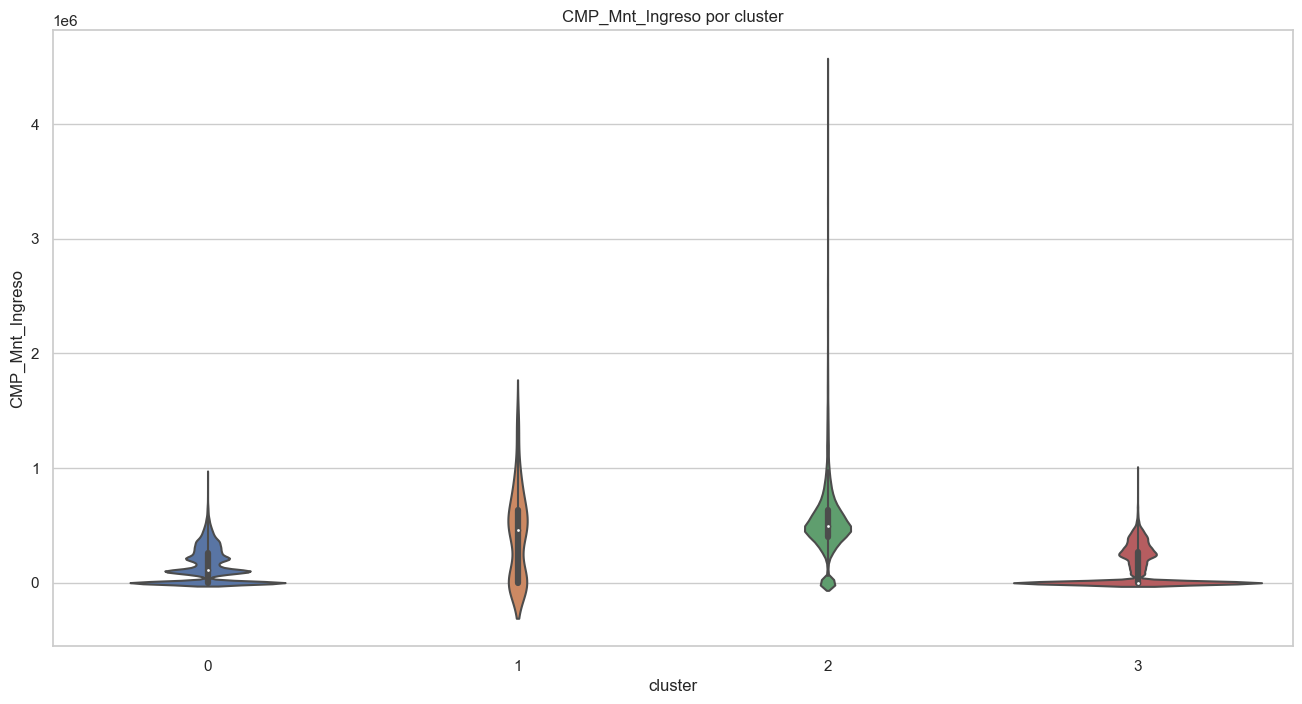

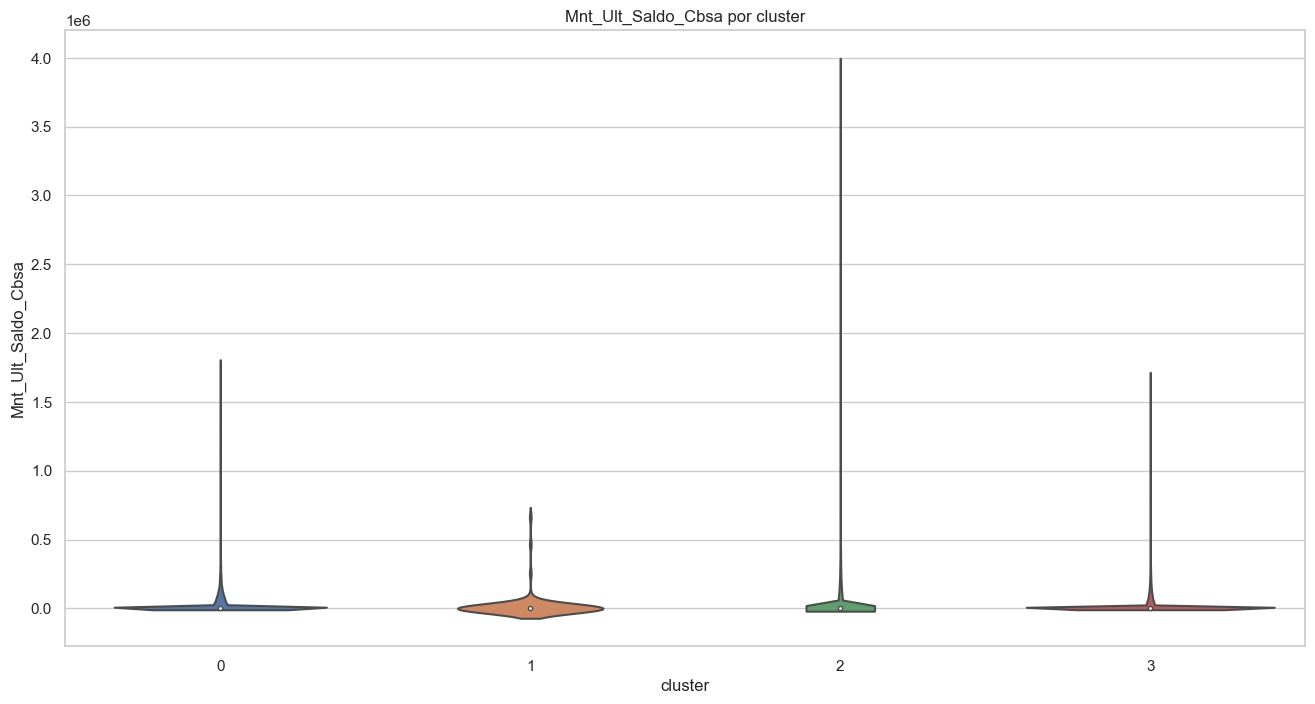

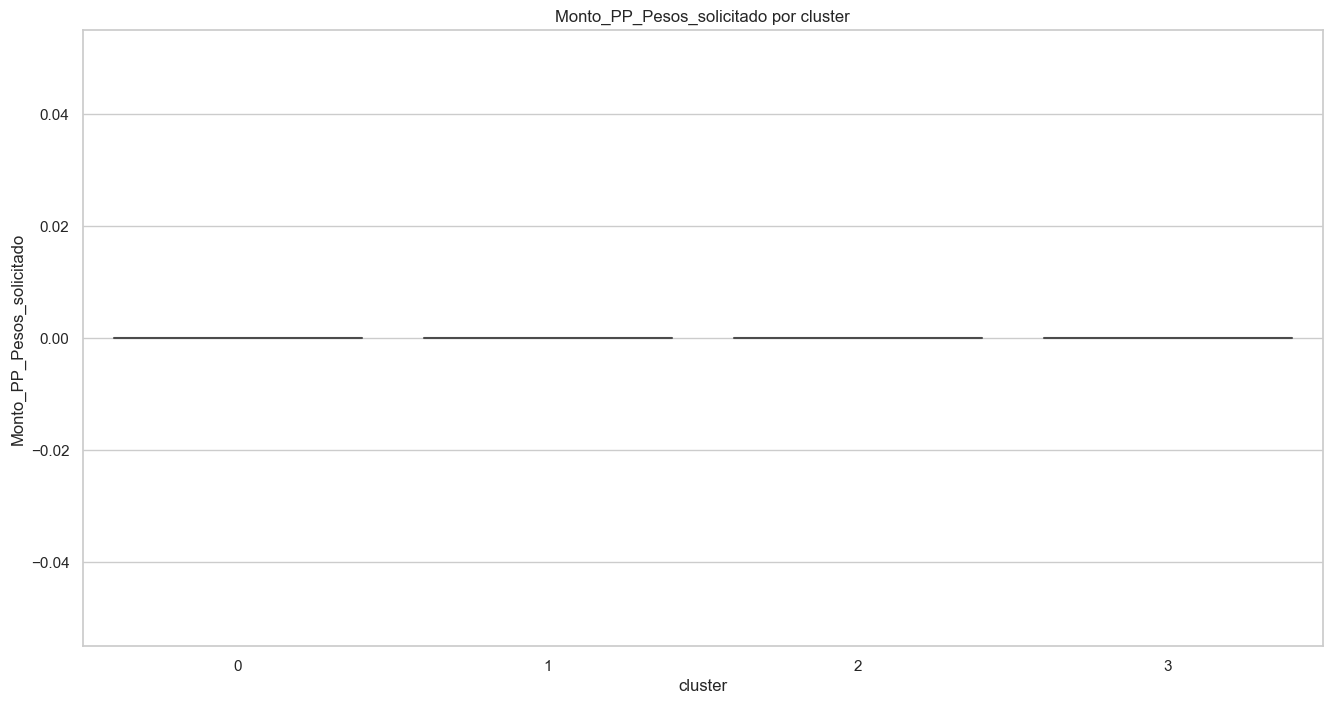

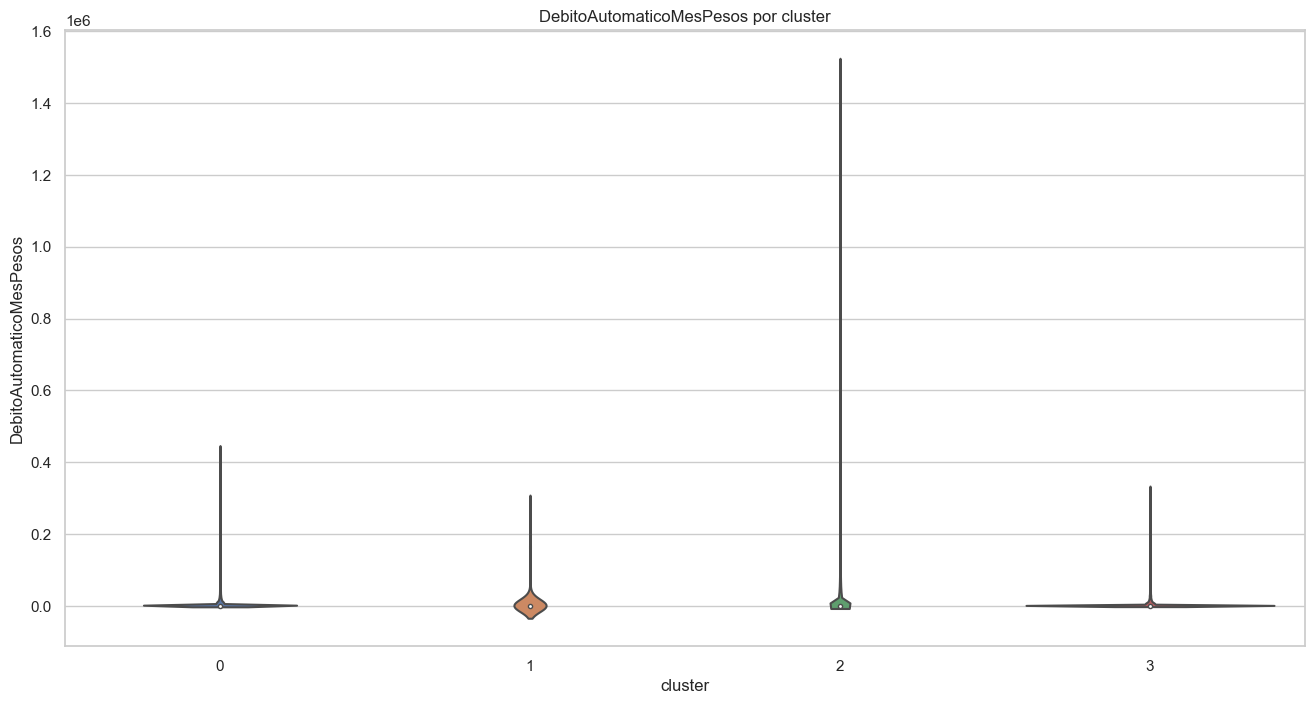

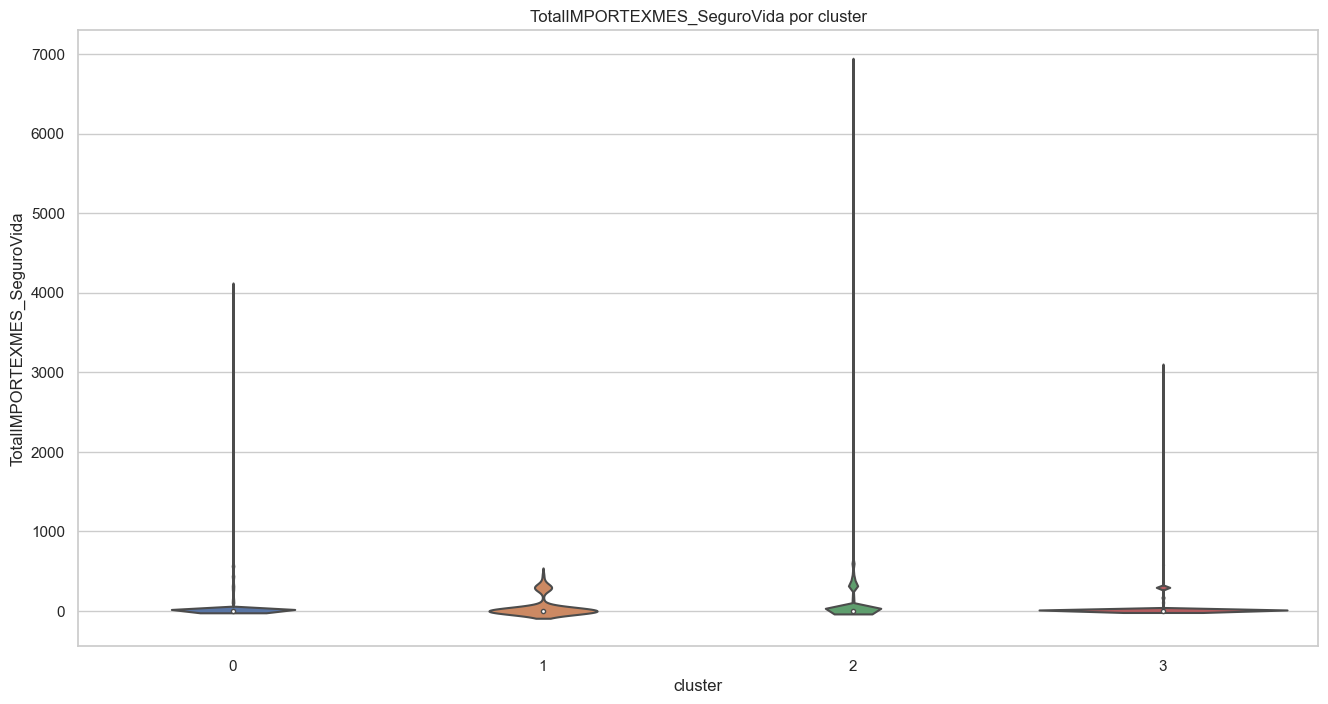

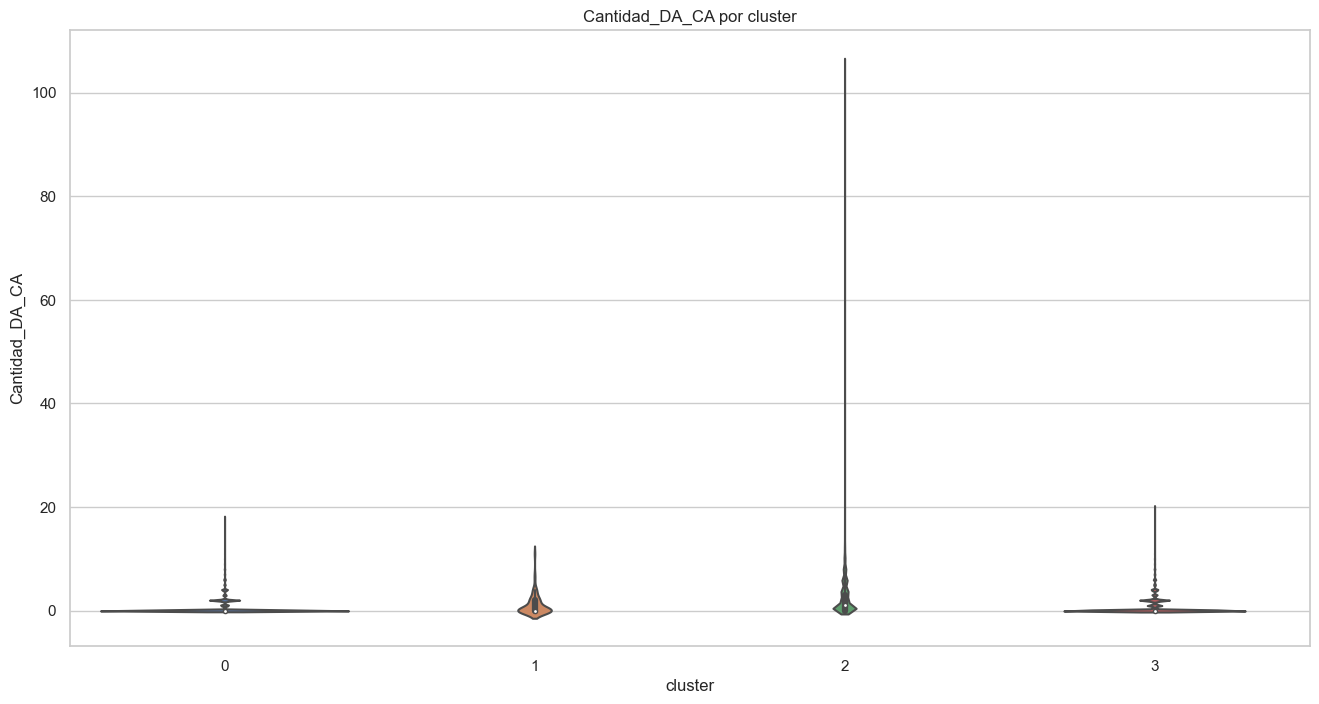

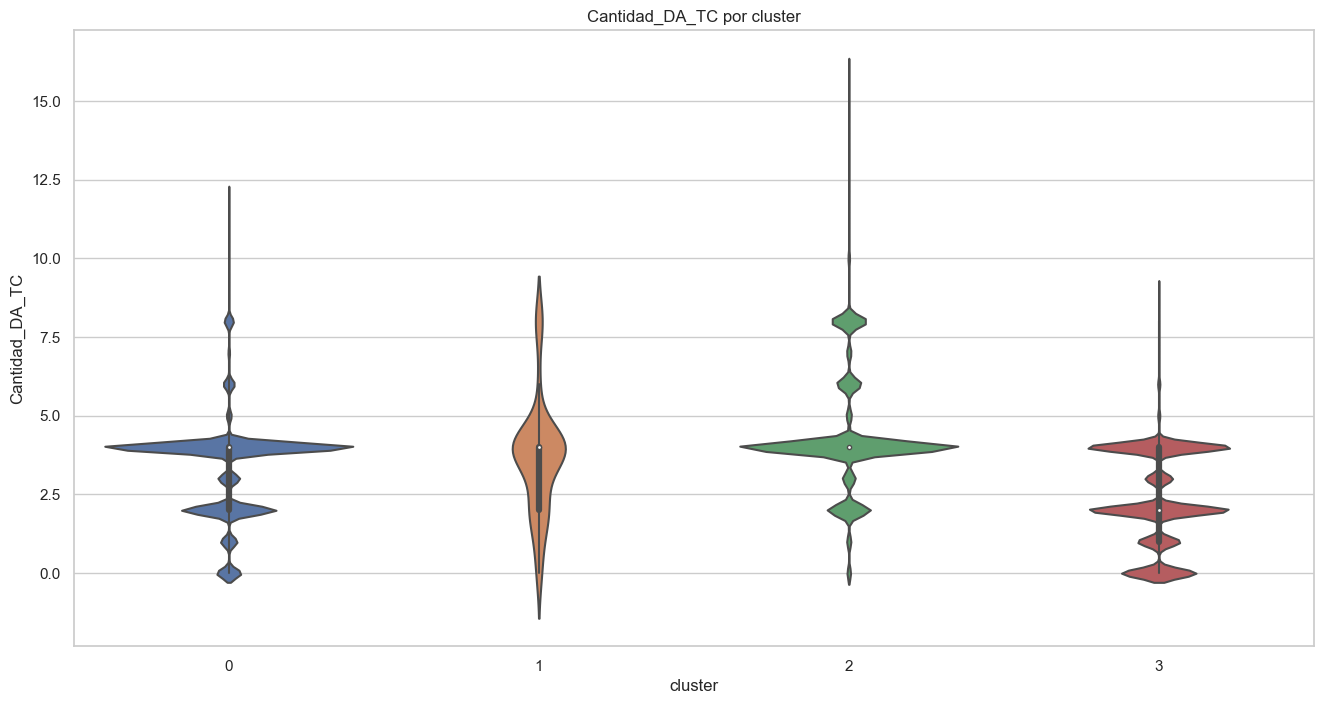

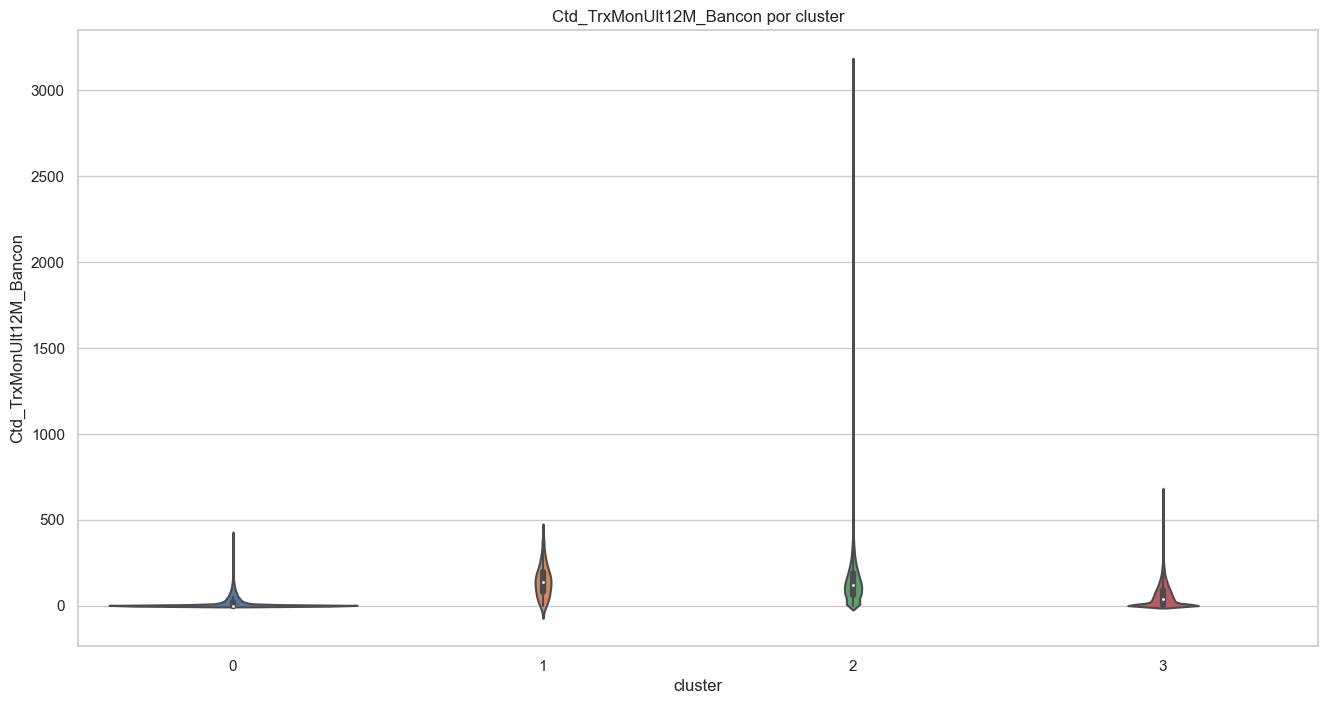

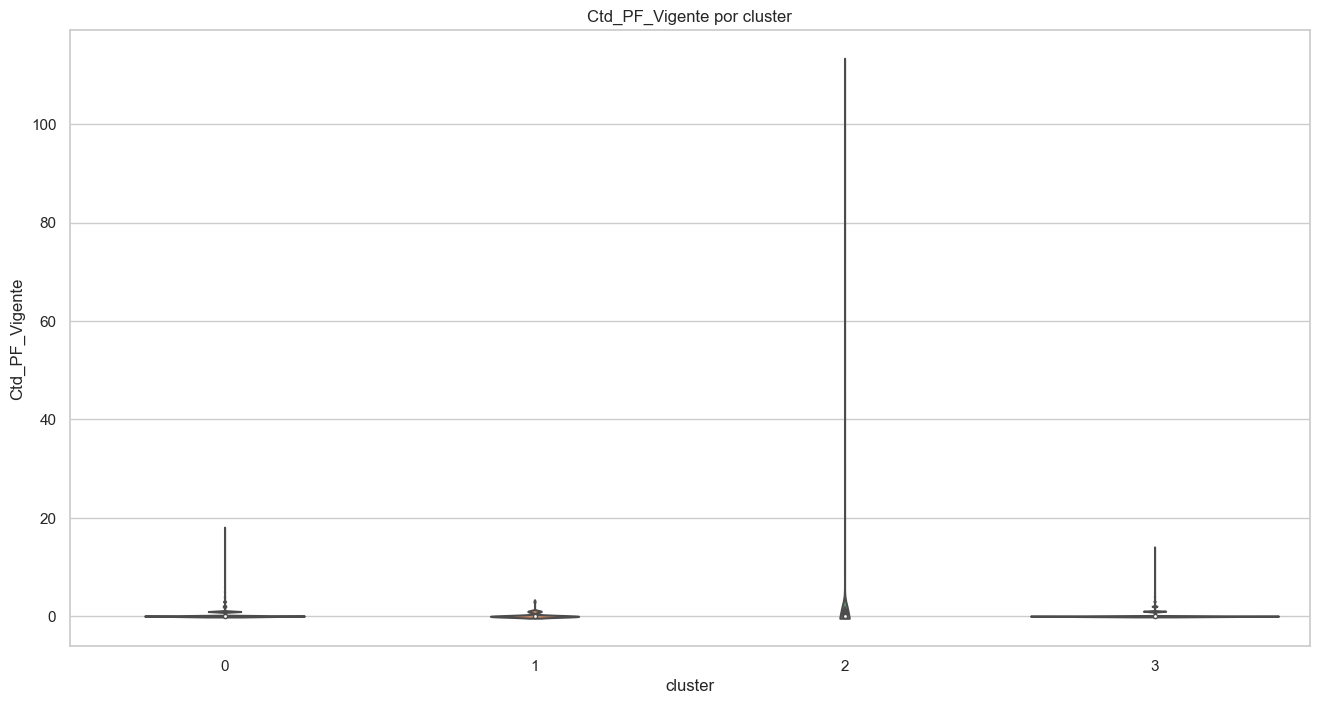

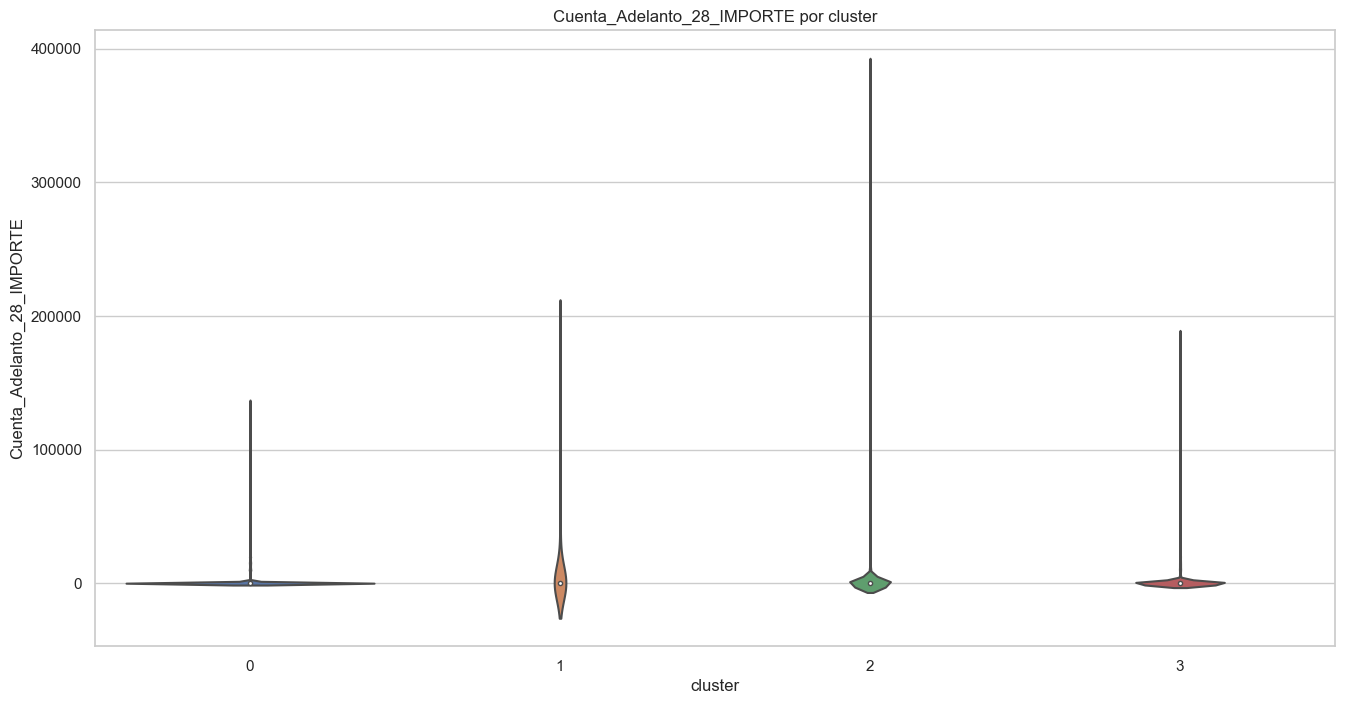

In [243]:
for col in X.columns[:-1]:
  f, ax = plt.subplots(figsize=(16, 8))
  sns.violinplot(x = 'cluster', y = col,data = clusters).set_title(f"{col} por cluster")

### Podemos usar también el pairplot.. pero sería tan grande la matriz que conviene hacer una selección aleatoria de variables, y de muestra para agilizar el procesado.

<Figure size 500x500 with 0 Axes>

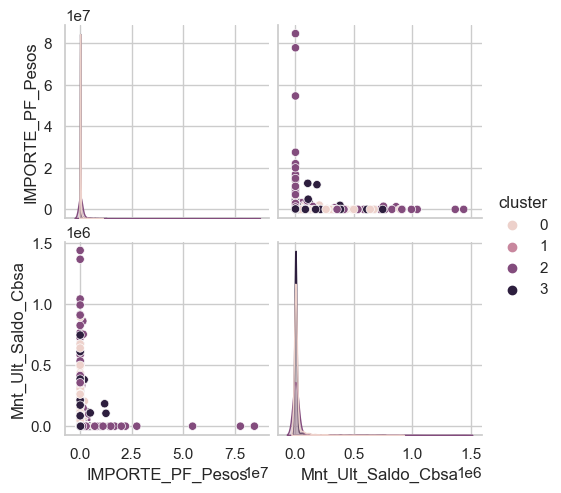

In [244]:
import random
random.seed(39)

random_col = X[random.choices(X.columns, k=2)]
random_col['cluster'] = clusters['cluster']
X_sample = random_col.sample(5000)

plt.figure(figsize = (5,5))
sns.pairplot(X_sample, hue="cluster")

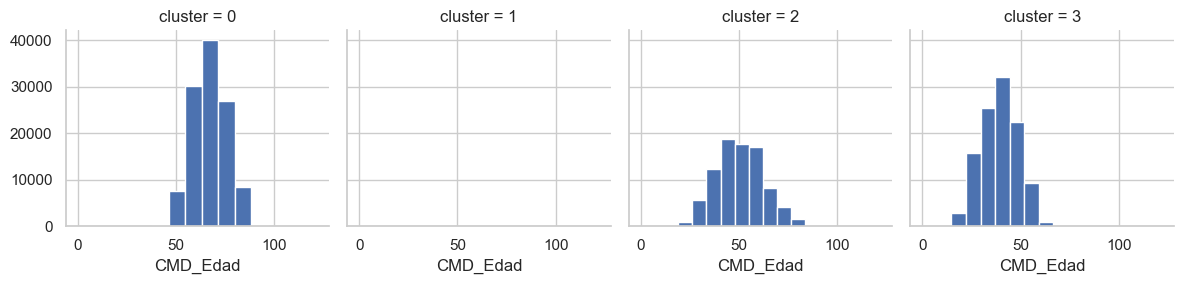

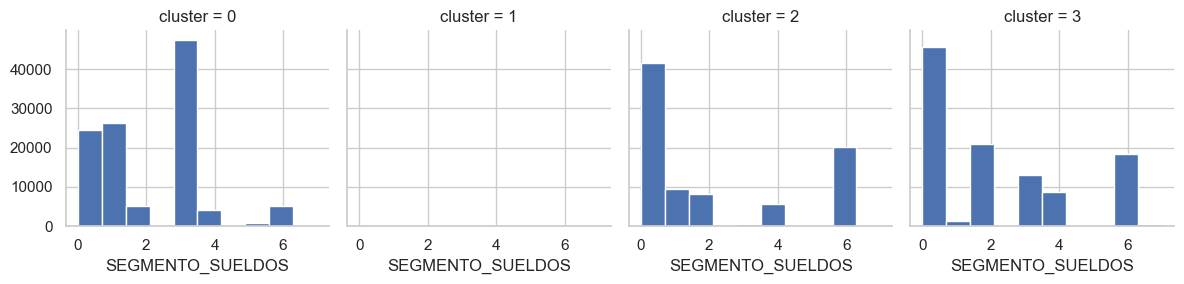

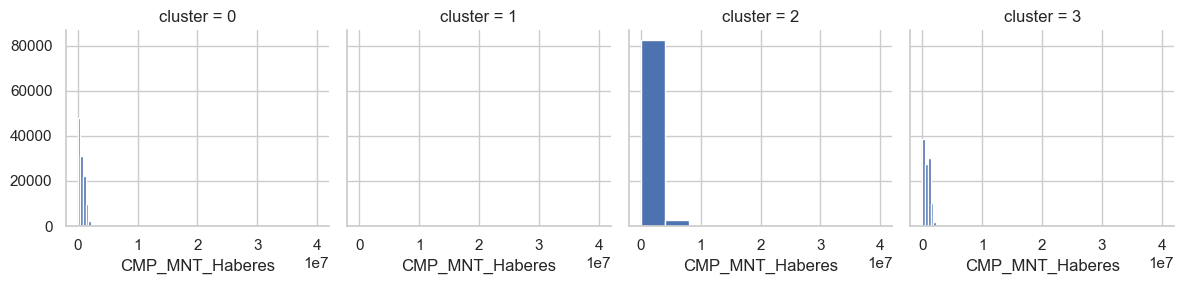

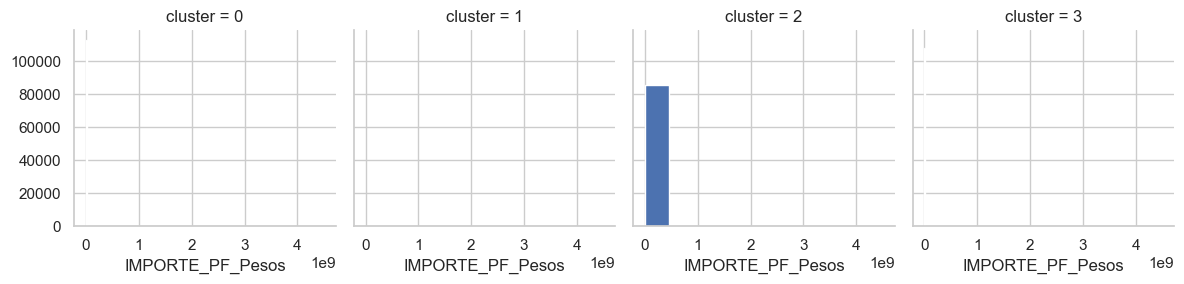

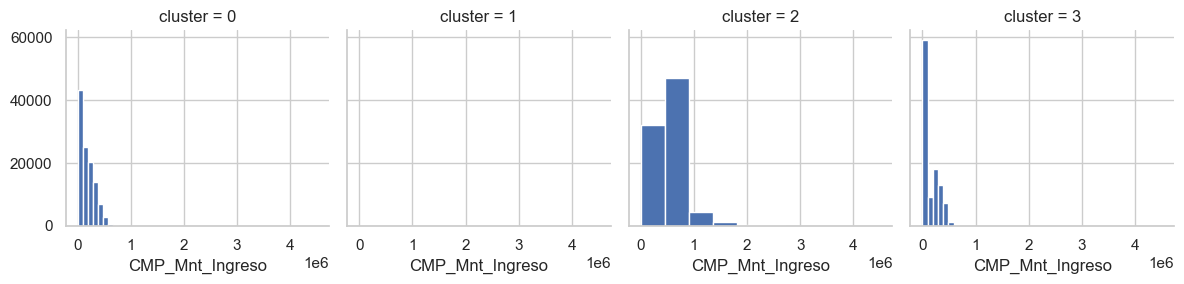

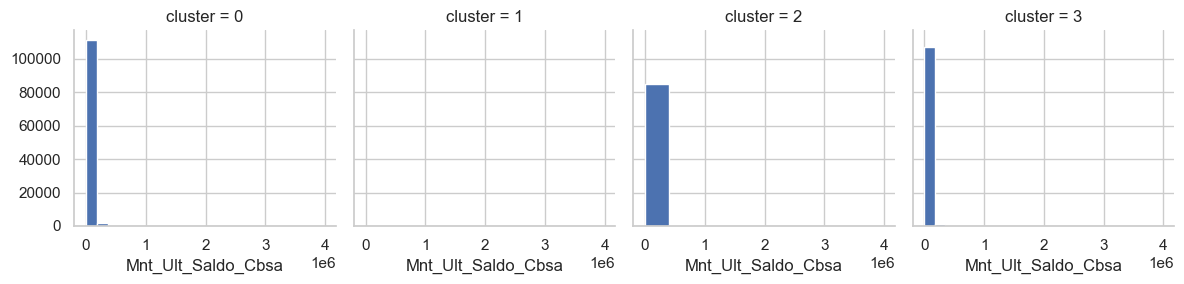

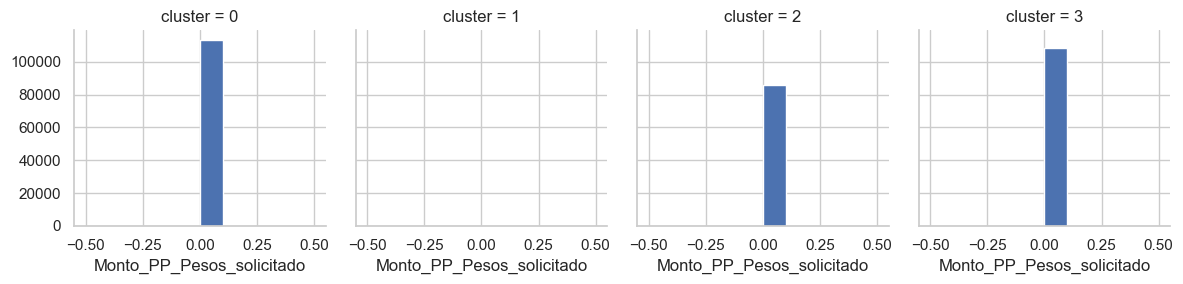

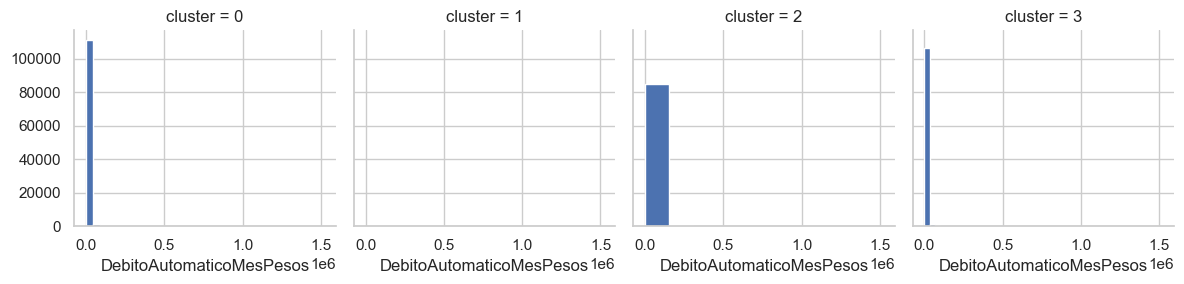

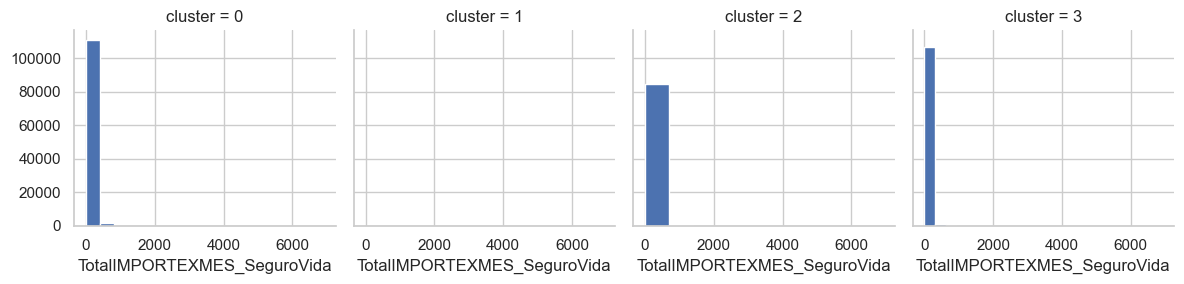

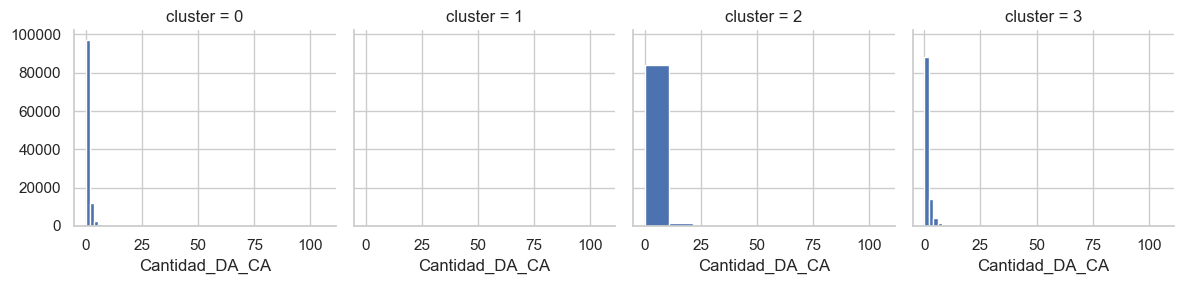

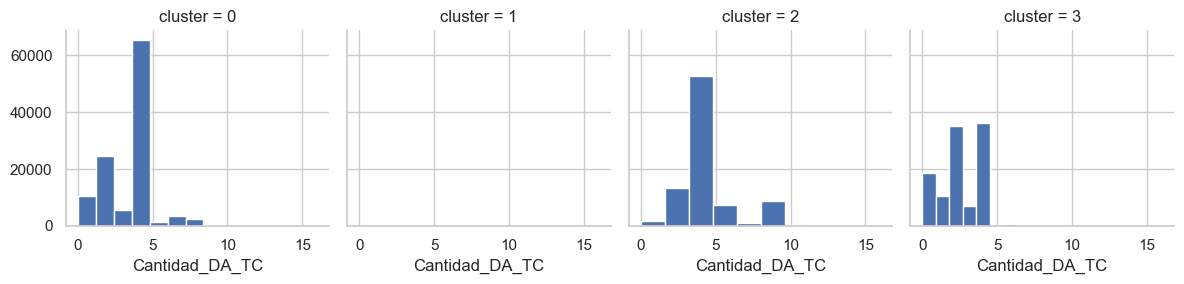

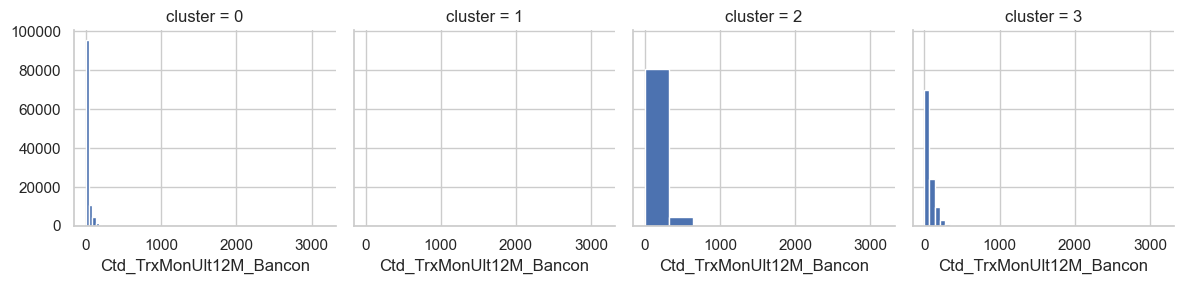

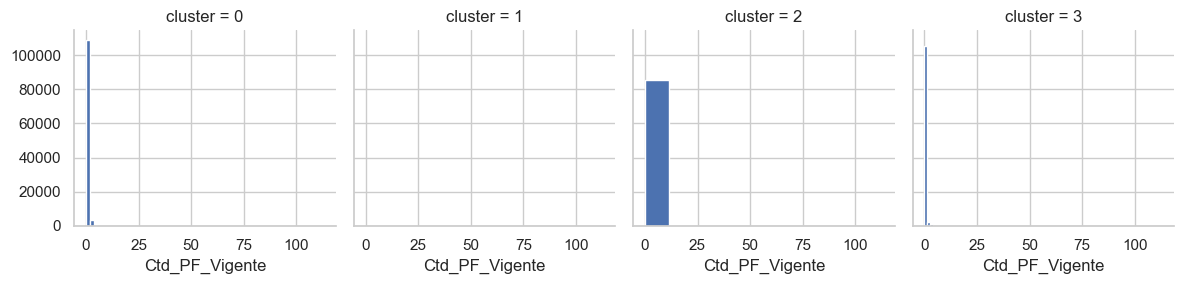

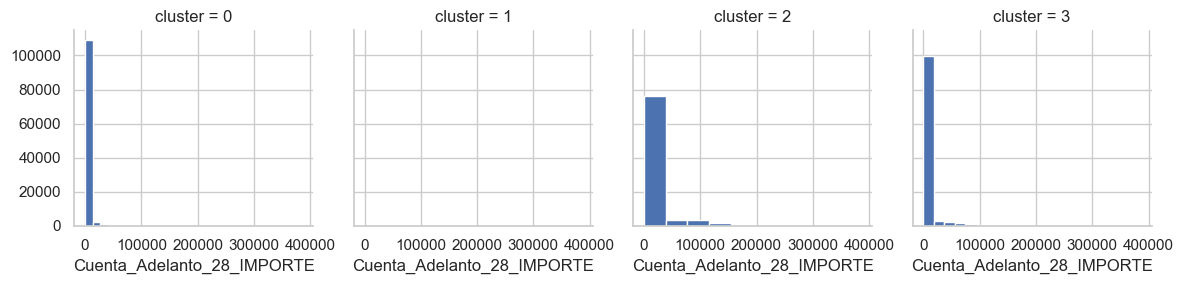

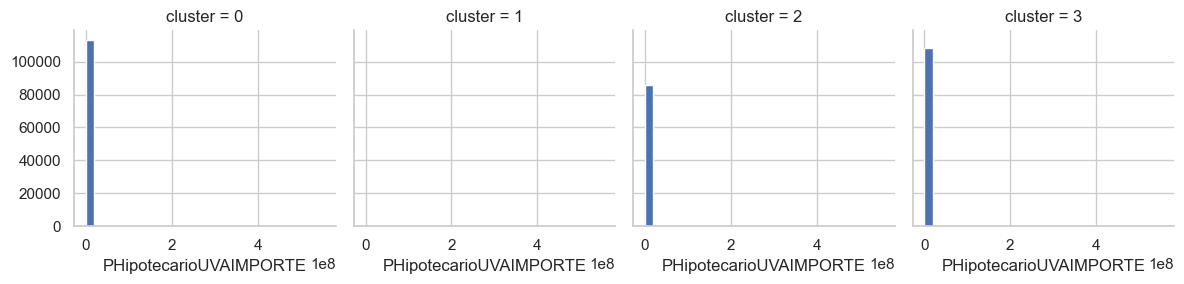

In [245]:
X_clus = X.copy()
X_clus['cluster'] = clusters['cluster']

for c in X_clus.iloc[:,:-1]:
    grid = sns.FacetGrid(X_clus, col='cluster')
    grid.map(plt.hist, c)

### Graficamos los clusters generados en dos dimensiones

In [89]:
df_pca['cluster'] = clusters['cluster']
df_tsne['cluster'] = clusters['cluster']


#### aqui tengo que arreglar df_tsne

NameError: name 'df_pca' is not defined

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
# sns.color_palette("husl", 9)

sns.scatterplot(data=df_tsne,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[0], palette="deep")
ax[0].set_title('TSNE 2D')
sns.scatterplot(data = df_pca,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[1], palette="deep")
ax[1].set_title('PCA 2D')

### Reducción de características

In [ ]:
for iter in np.arange(0,2,1):

  random_col = X[random.choices(X.columns, k=3)]
  print("========================================")
  print(f"Grafico {iter+1}")
  print(random_col.columns)

  scale = StandardScaler()
  random_col_X_scaled = scale.fit_transform(random_col)

  kmean = KMeans(5)
  kmean.fit(random_col_X_scaled)
  labels = kmean.labels_

  clus = pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)

  # PCA en features seleccionadas
  # from sklearn.decomposition import PCA
  pca = PCA(n_components=2).fit_transform(random_col_X_scaled)
  df_PCA = pd.DataFrame(pca, columns = ["x1", "x2"])

  # TSNE en features seleccionadas
  Xtsne = TSNE(n_components=2).fit_transform(random_col_X_scaled)
  df_tSNE = pd.DataFrame(Xtsne, columns = ["x1", "x2"])

  df_PCA['cluster'] = clus['cluster']
  df_tSNE['cluster'] = clus['cluster']

  fig, ax = plt.subplots(1, 2, figsize=(18,8))
  sns.color_palette("husl", 9)

  sns.scatterplot(data=df_tSNE,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[0], palette="deep")
  ax[0].set_title('TSNE 2D')
  sns.scatterplot(data = df_PCA,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[1], palette="deep")
  ax[1].set_title('PCA 2D')
  # plt.suptitle(f'Silhouette analysis using = {random_col.columns}',fontsize=16, fontweight='semibold', y=1.05);
  plt.show();

#  4) Elaboración y evaluacíon de Clusters: DBSCAN

### Una excelente visualización de cómo trabaja DBSCAN

In [459]:
from sklearn.cluster import DBSCAN

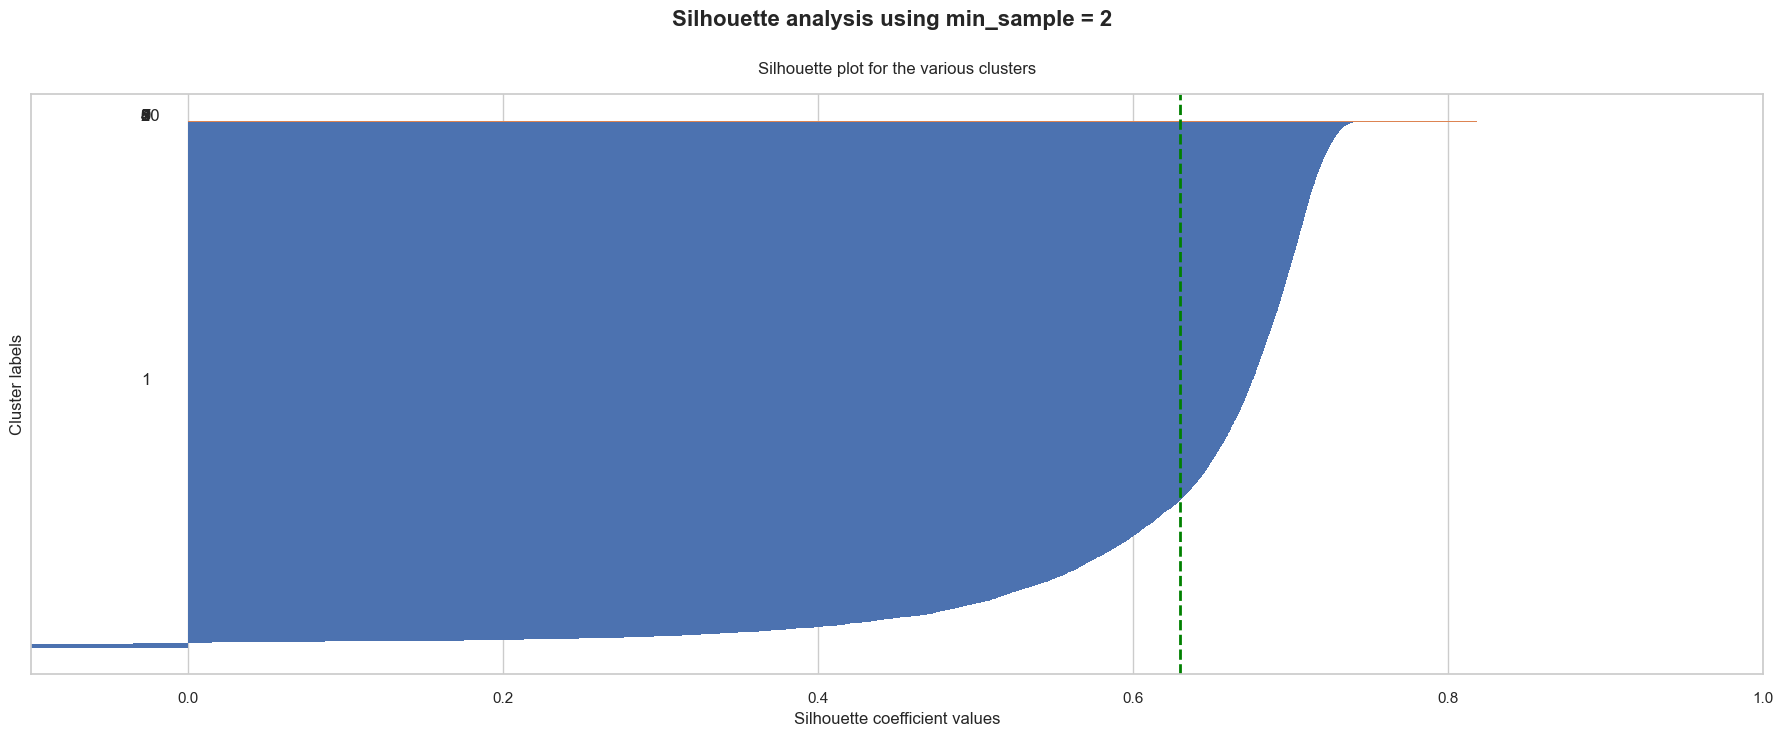

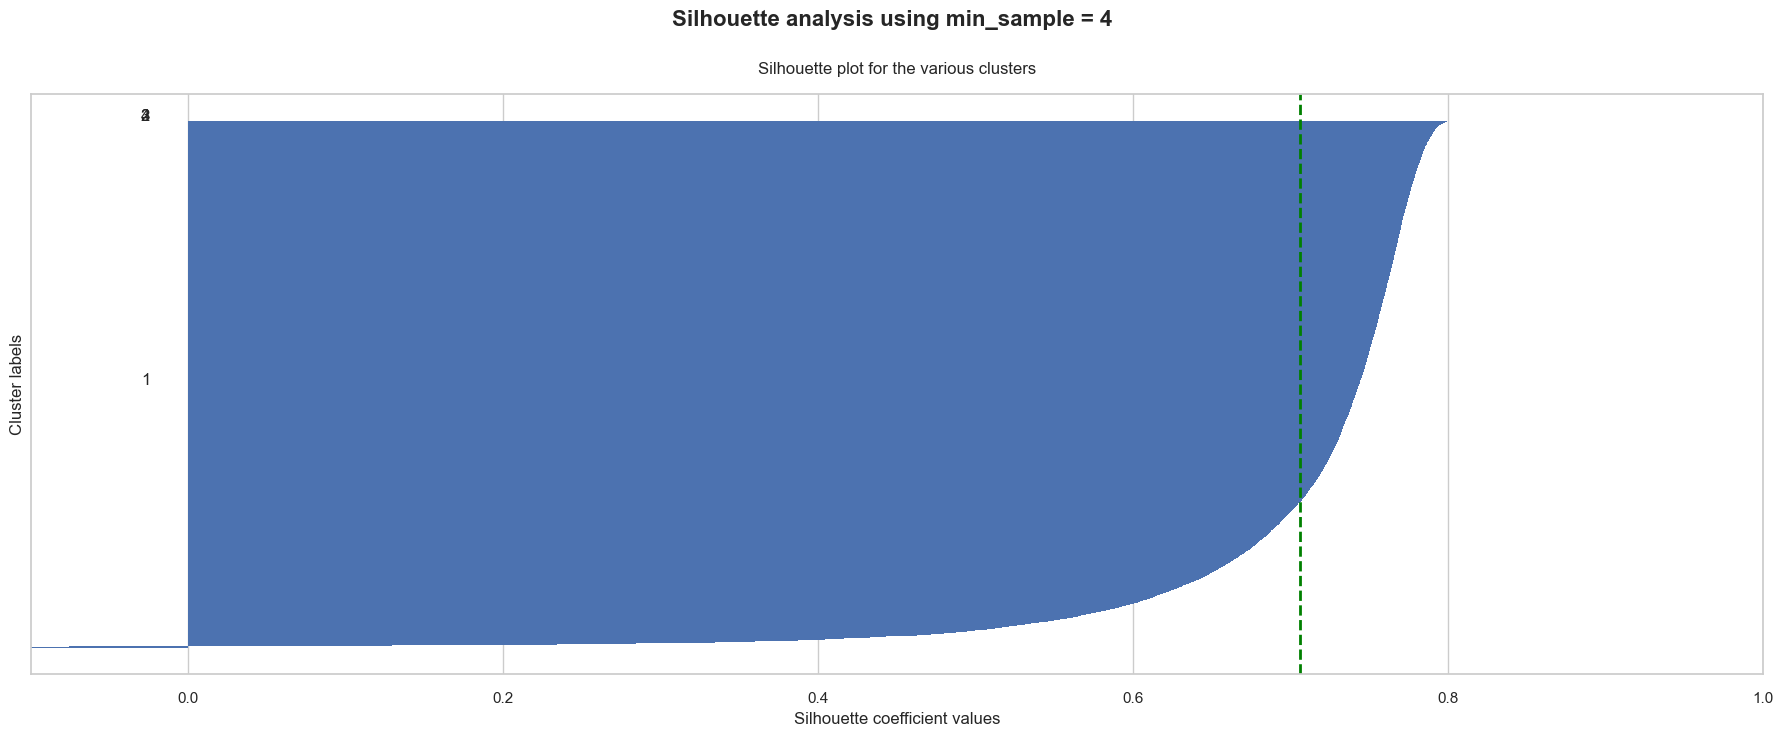

In [460]:
 # Aca definen la lista de los min_sample  para los cuales quieren hacer un gráfico
lista_k = [2,4]

for i, k in enumerate(lista_k):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    db = DBSCAN(eps = 4,min_samples = k,metric='euclidean')
    model = db.fit(X_scaled)
    labels = model.labels_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)[1:]): # agregué [1:]

        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')
    ax.set_title('Silhouette plot for the various clusters', y=1.02);

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using min_sample = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [461]:
db = DBSCAN(eps = 3,min_samples = 20,metric='euclidean')
model = db.fit(X_scaled)

result = pd.DataFrame(model.labels_, columns = ['cluster'])
result.value_counts()

cluster
 0         14641
-1           367
 1            16
dtype: int64

### Presentación de resultados

In [462]:
df_pca['cluster'] = result['cluster']
df_tsne['cluster'] = result['cluster']

Text(0.5, 1.0, 'PCA 2D')

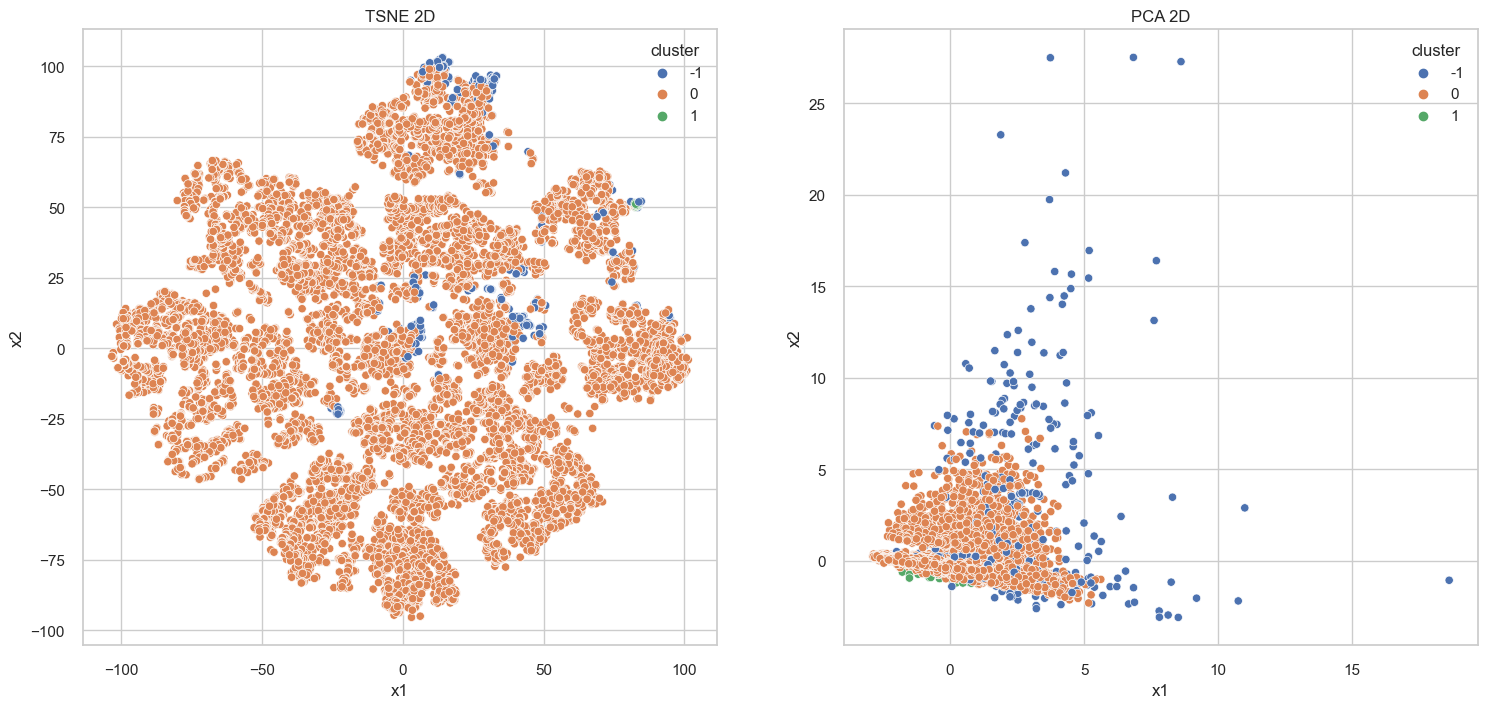

In [463]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.color_palette("husl", 9)

sns.scatterplot(data=df_tsne,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[0], palette="deep")
ax[0].set_title('TSNE 2D')
sns.scatterplot(data = df_pca,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[1], palette="deep")
ax[1].set_title('PCA 2D')

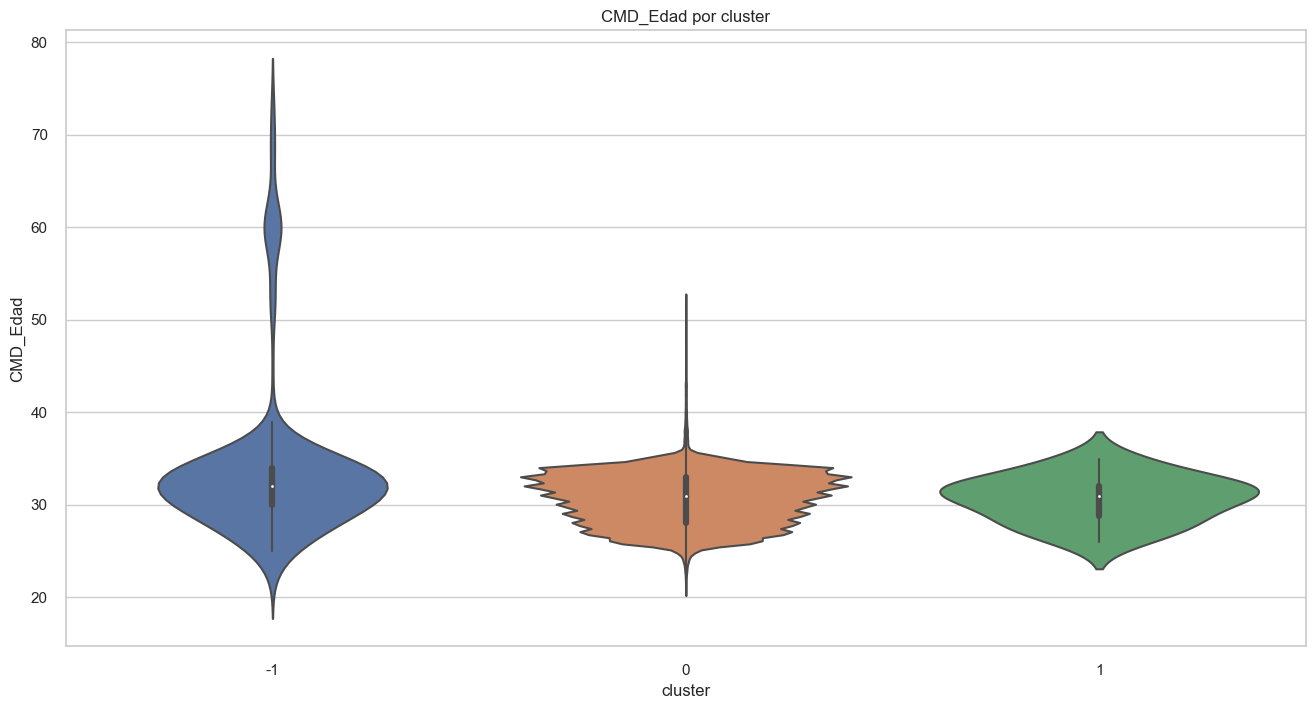

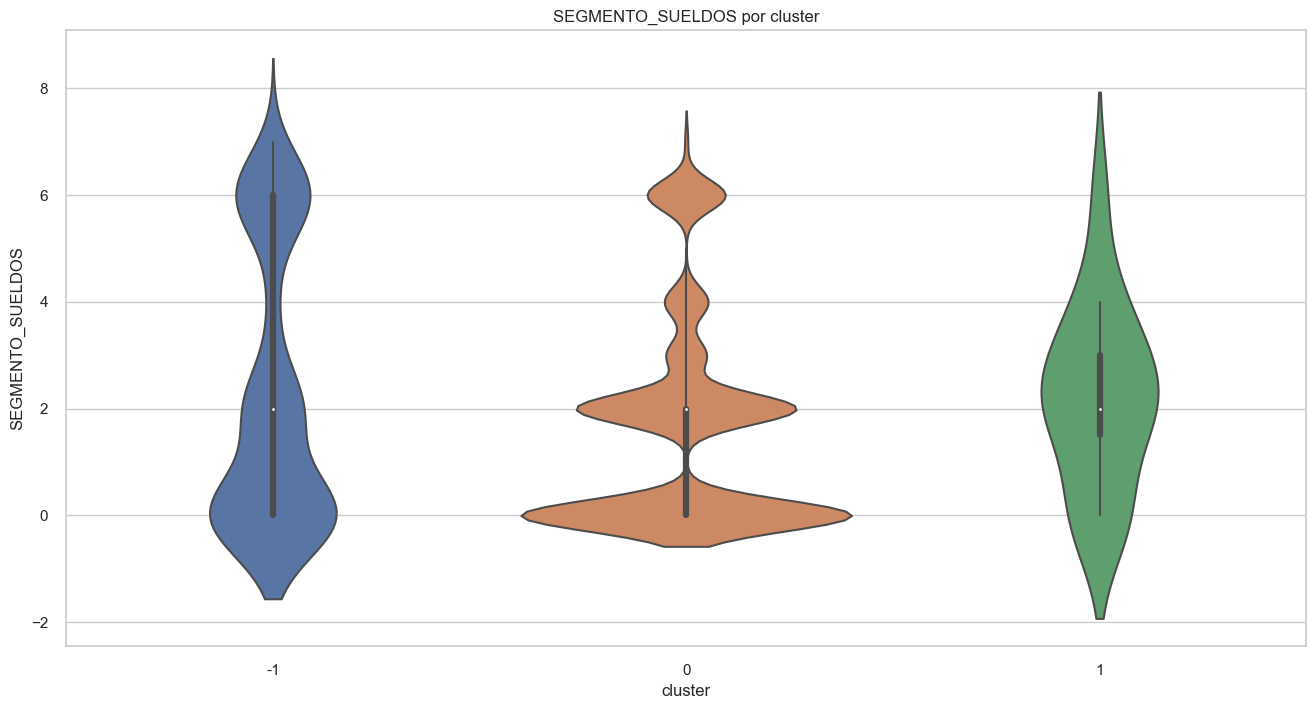

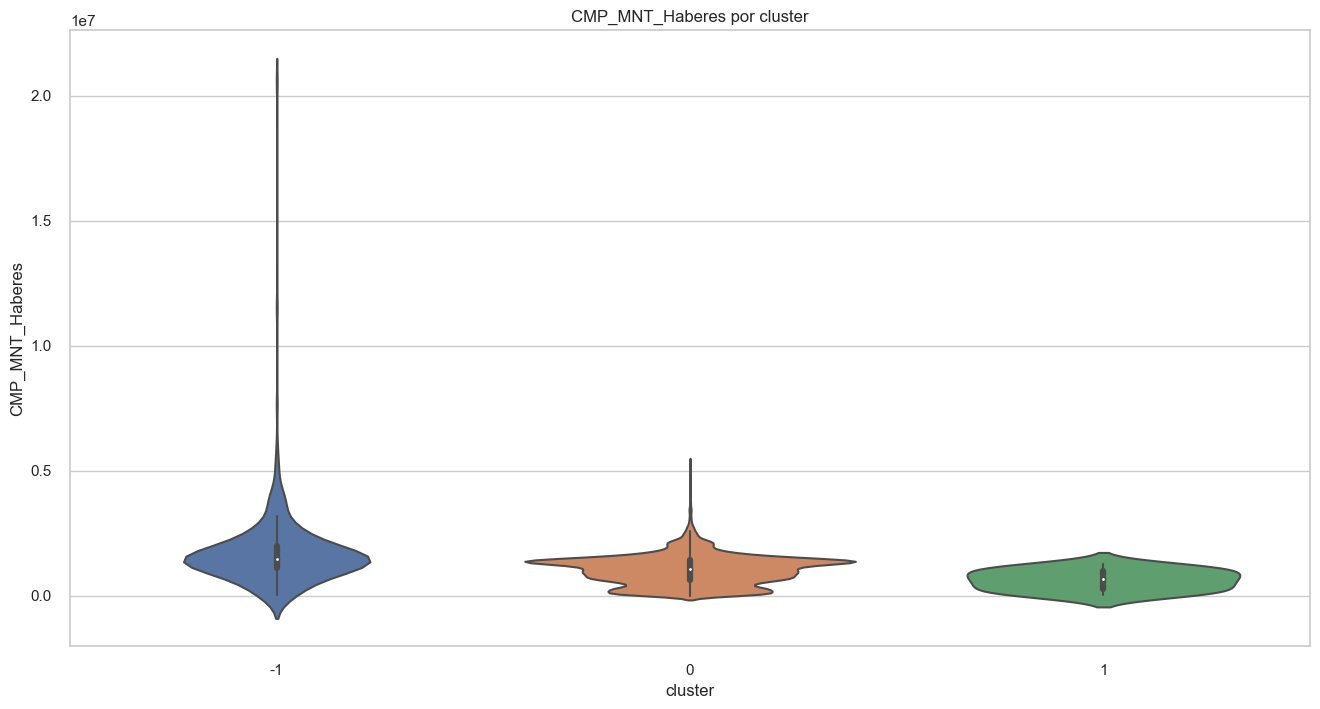

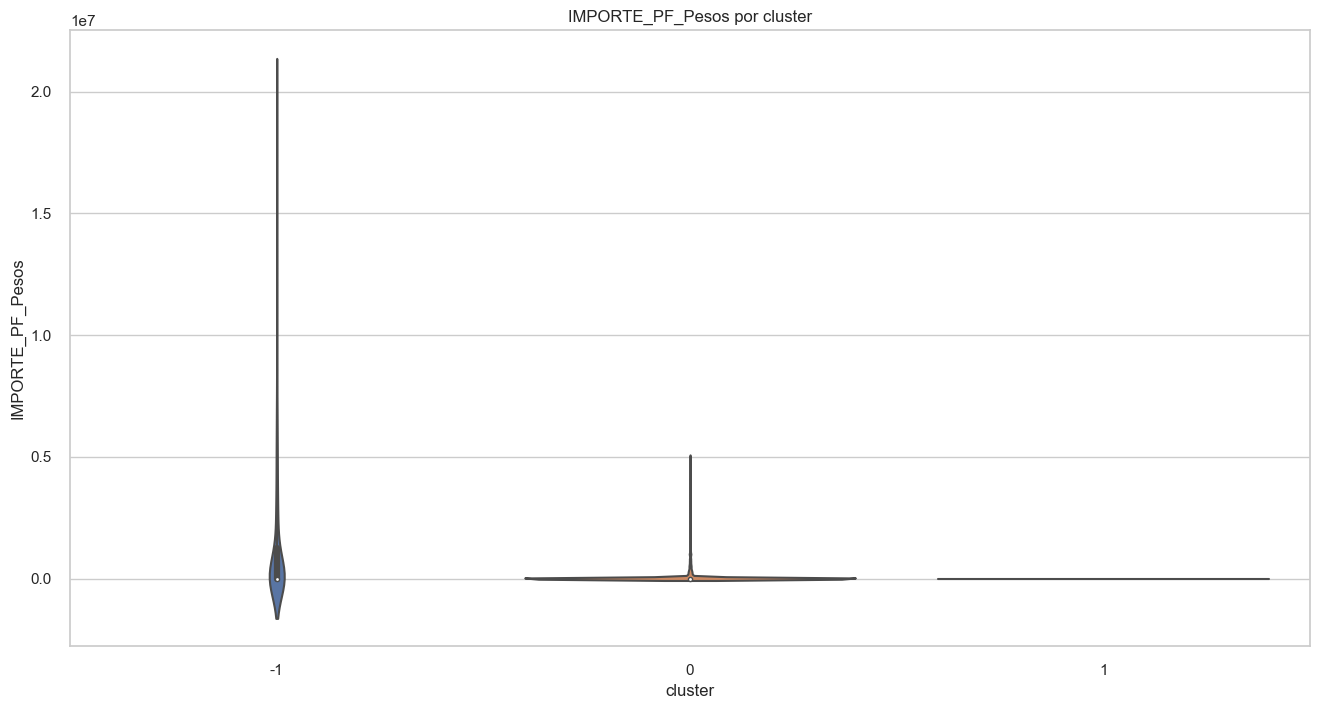

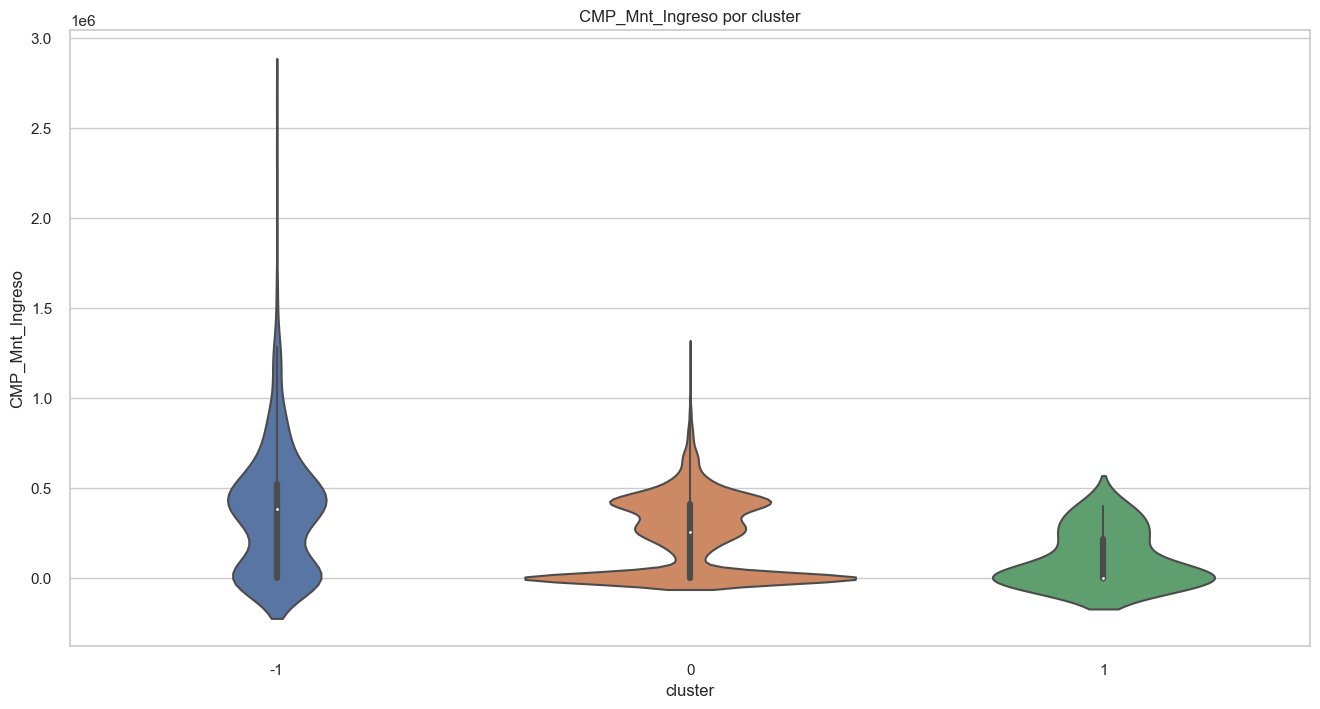

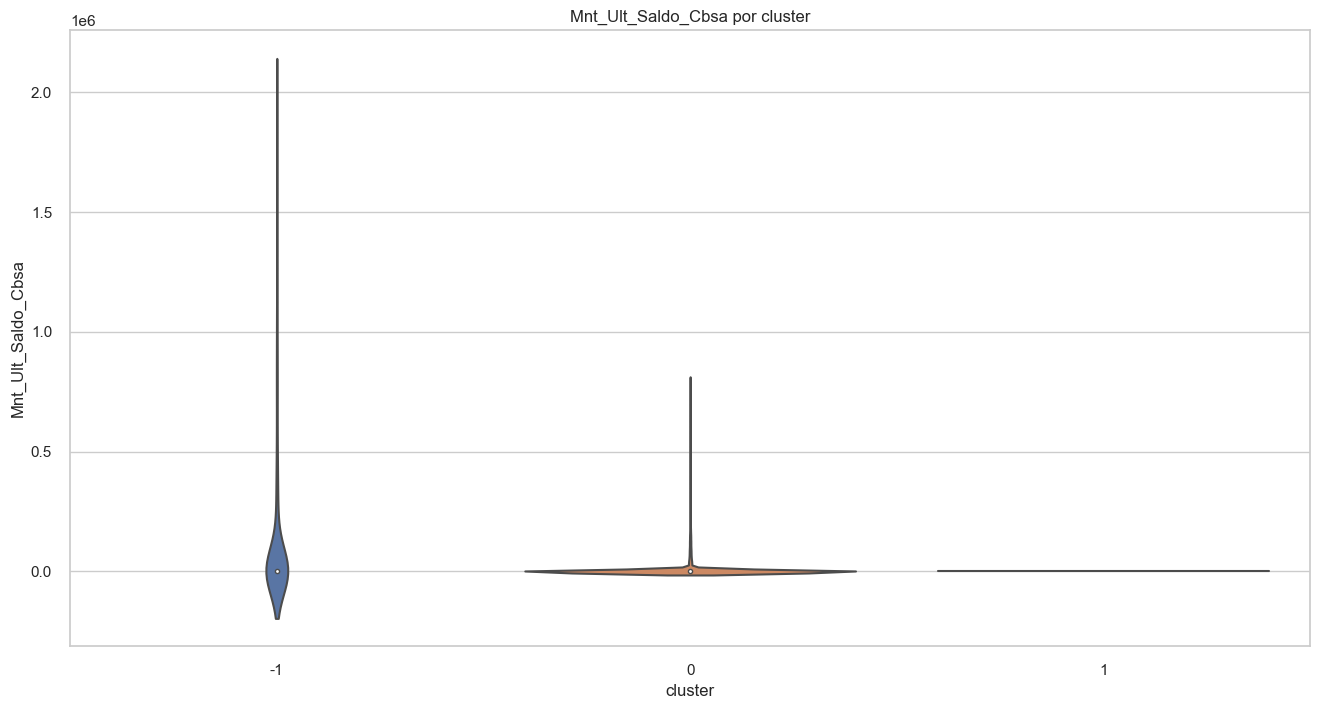

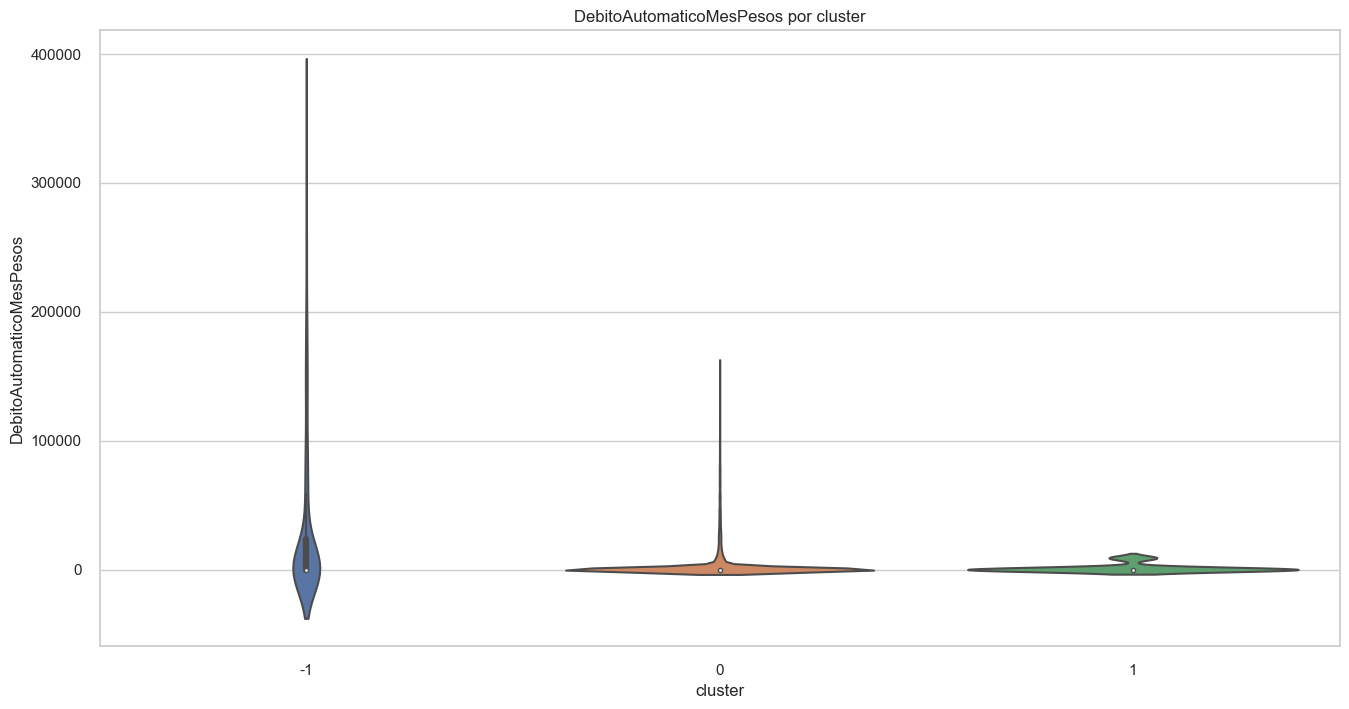

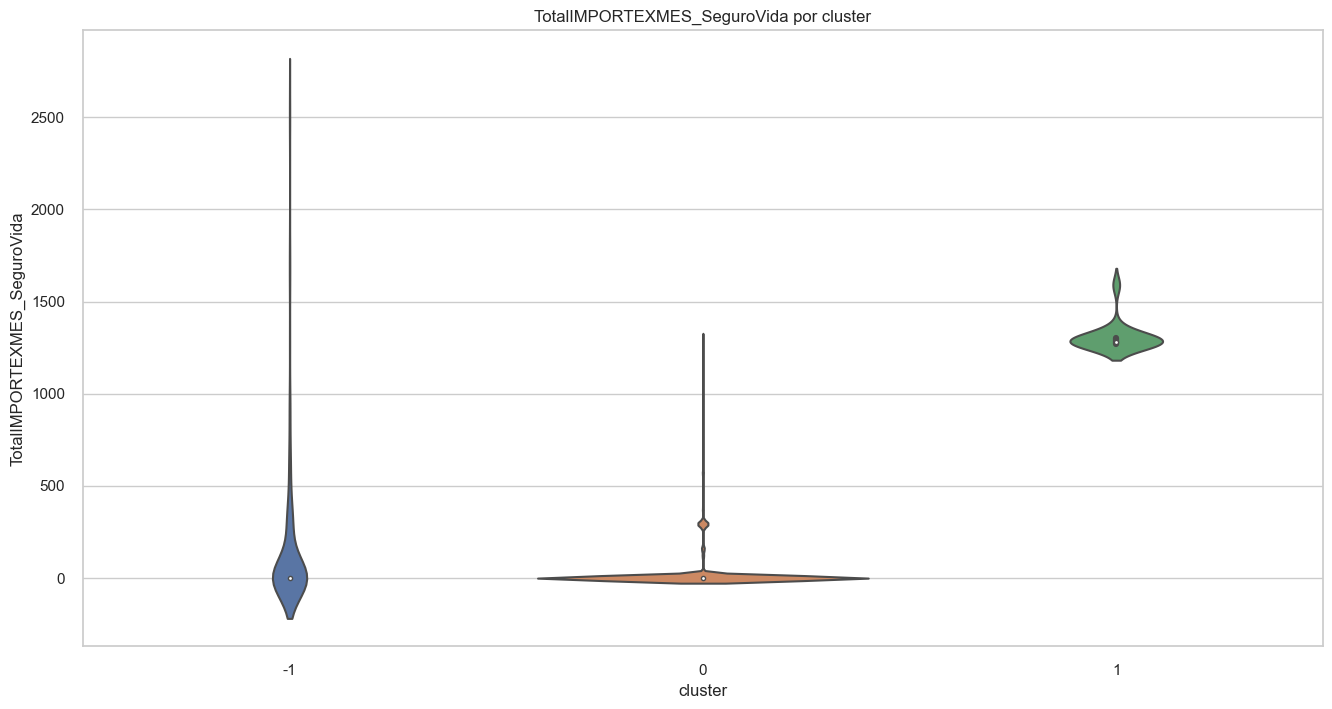

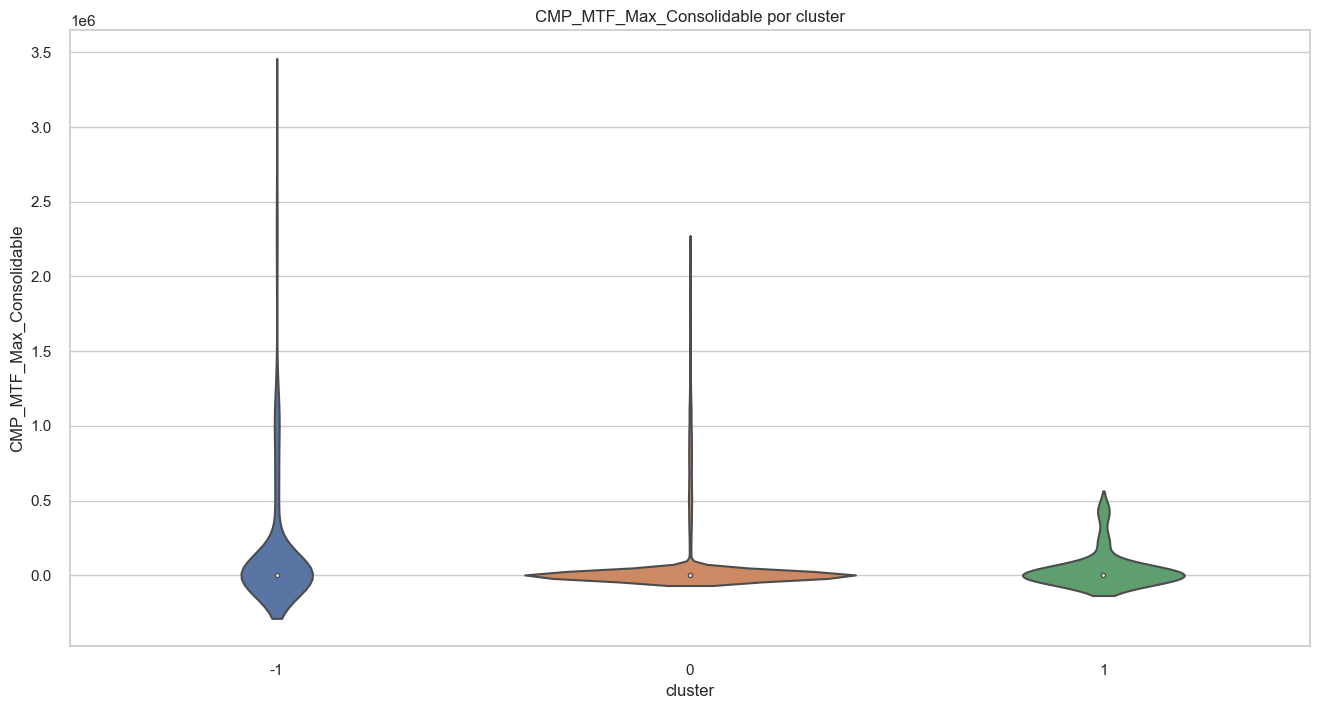

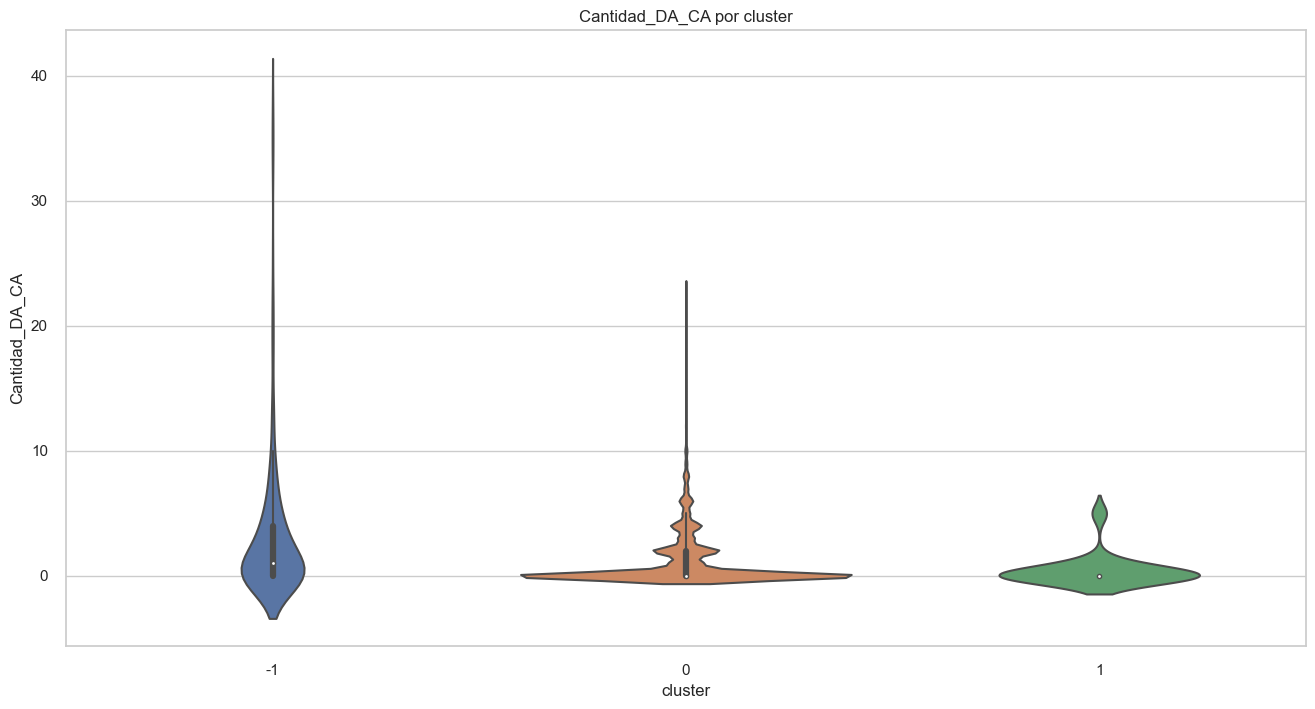

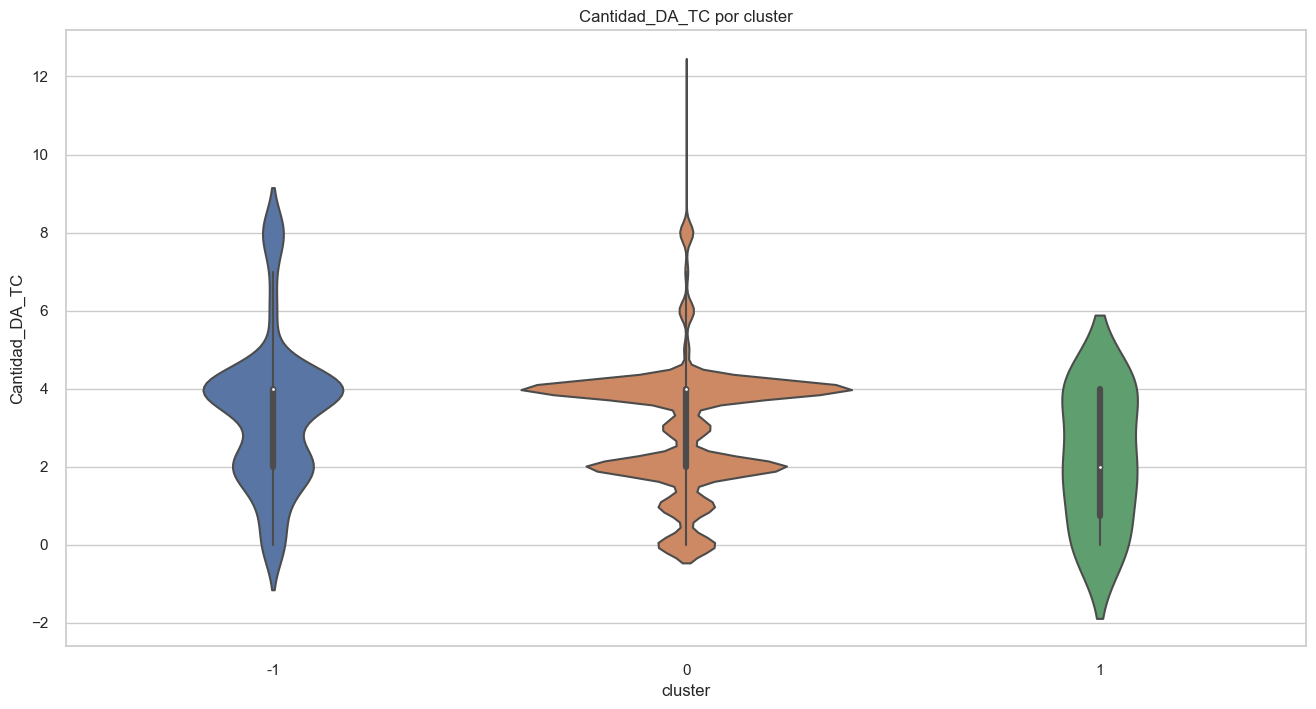

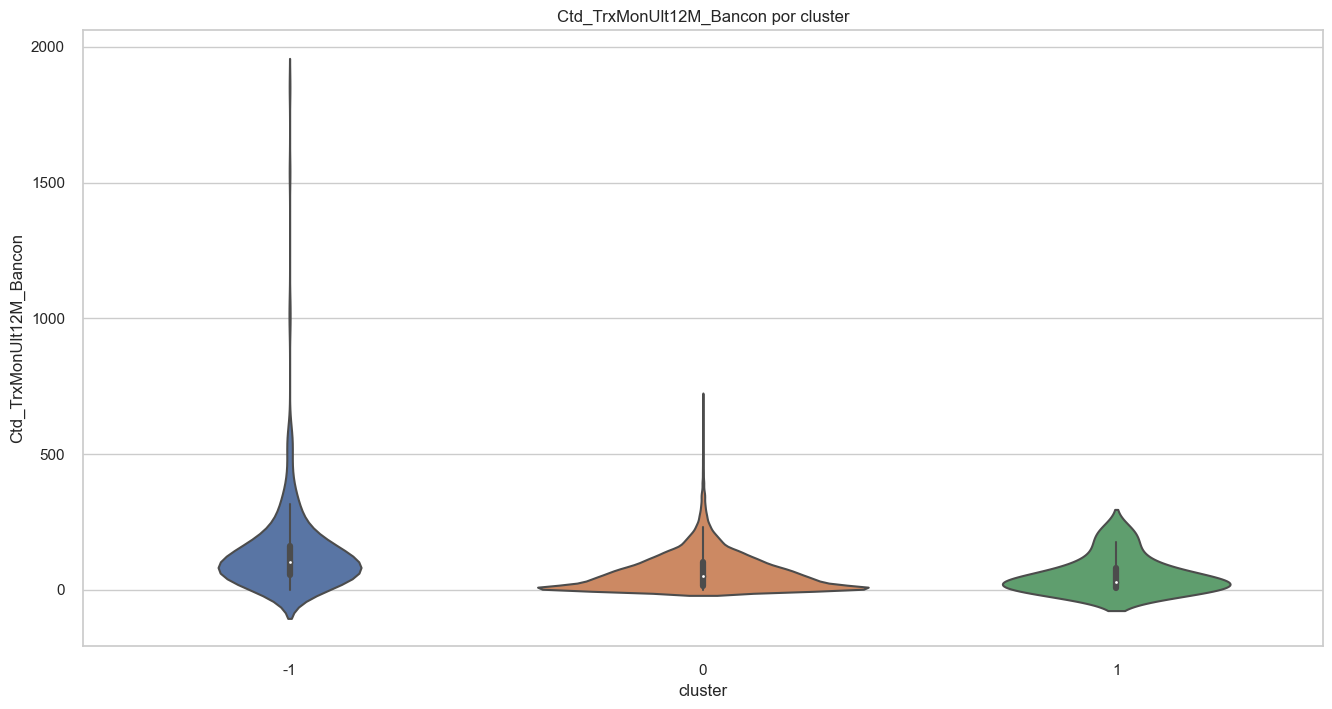

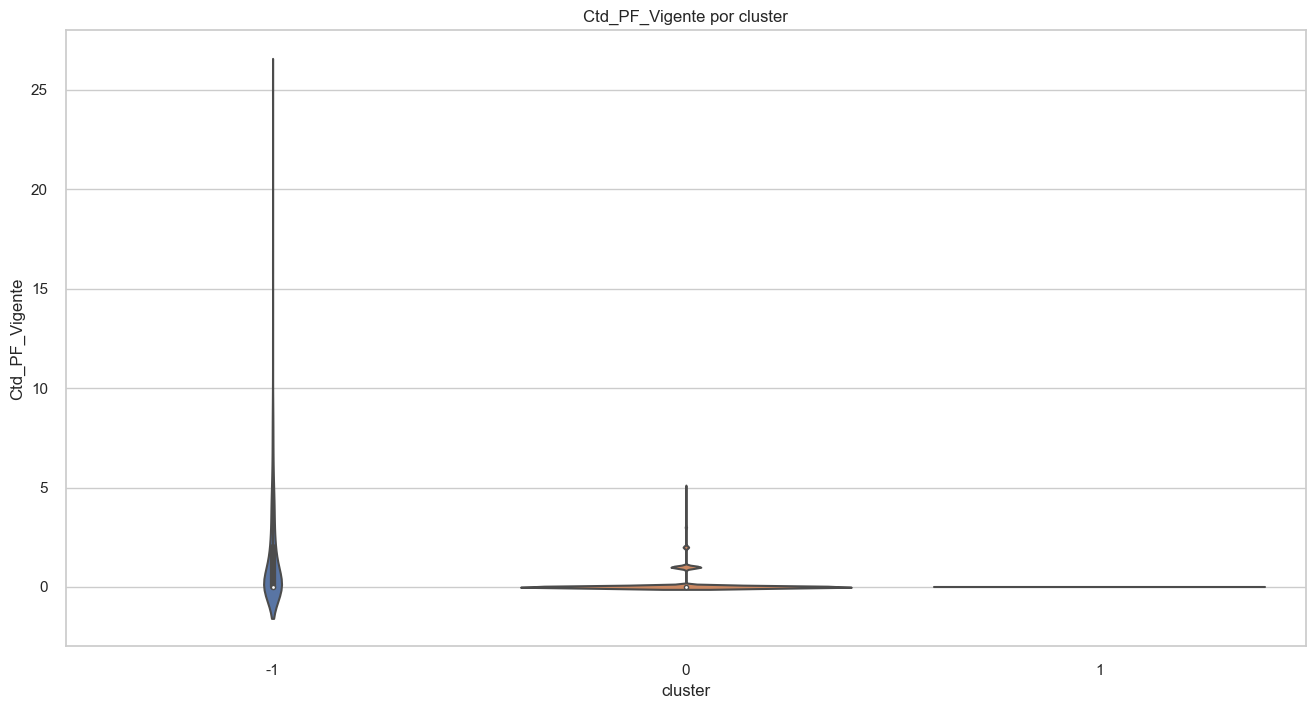

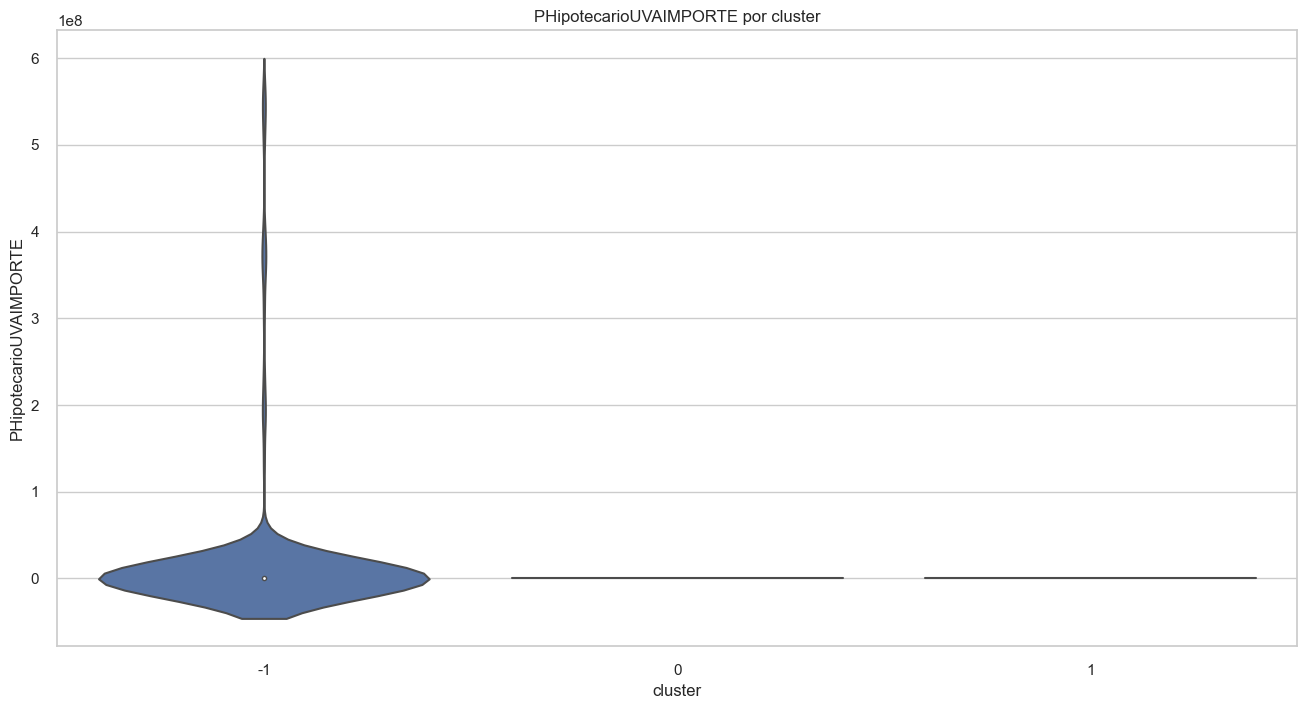

In [464]:
X_clus['cluster'] = result['cluster']

for col in X_clus.columns[:-1]:
  f, ax = plt.subplots(figsize=(16, 8))
  sns.violinplot(x = 'cluster', y = col ,data = X_clus).set_title(f"{col} por cluster")

# 5) Hierarchical Clustering - Agglomerative

In [465]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#### Calculamos el silhouette_score para distintas cantidaddes de clusters

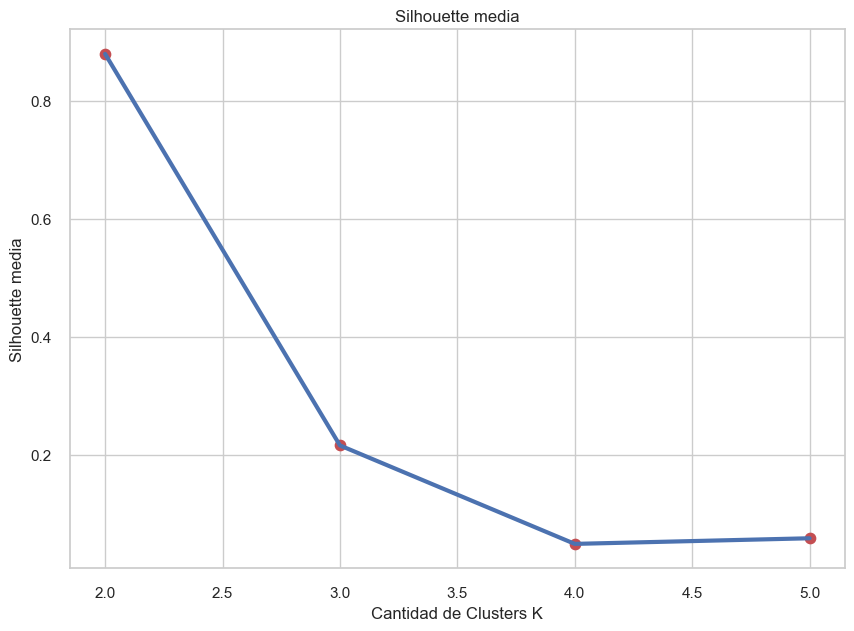

In [466]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
K = np.arange(2,6)
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    aglomClust = AgglomerativeClustering(n_clusters = k)
    model = aglomClust.fit(X_scaled)
    labels = model.labels_

    # Calculamos el silhouette
    valor_medio_sil = silhouette_score(X_scaled, labels)
    lista_sil.append(valor_medio_sil)


plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')

plt.show()

### Valor de Silhouette para cada observación

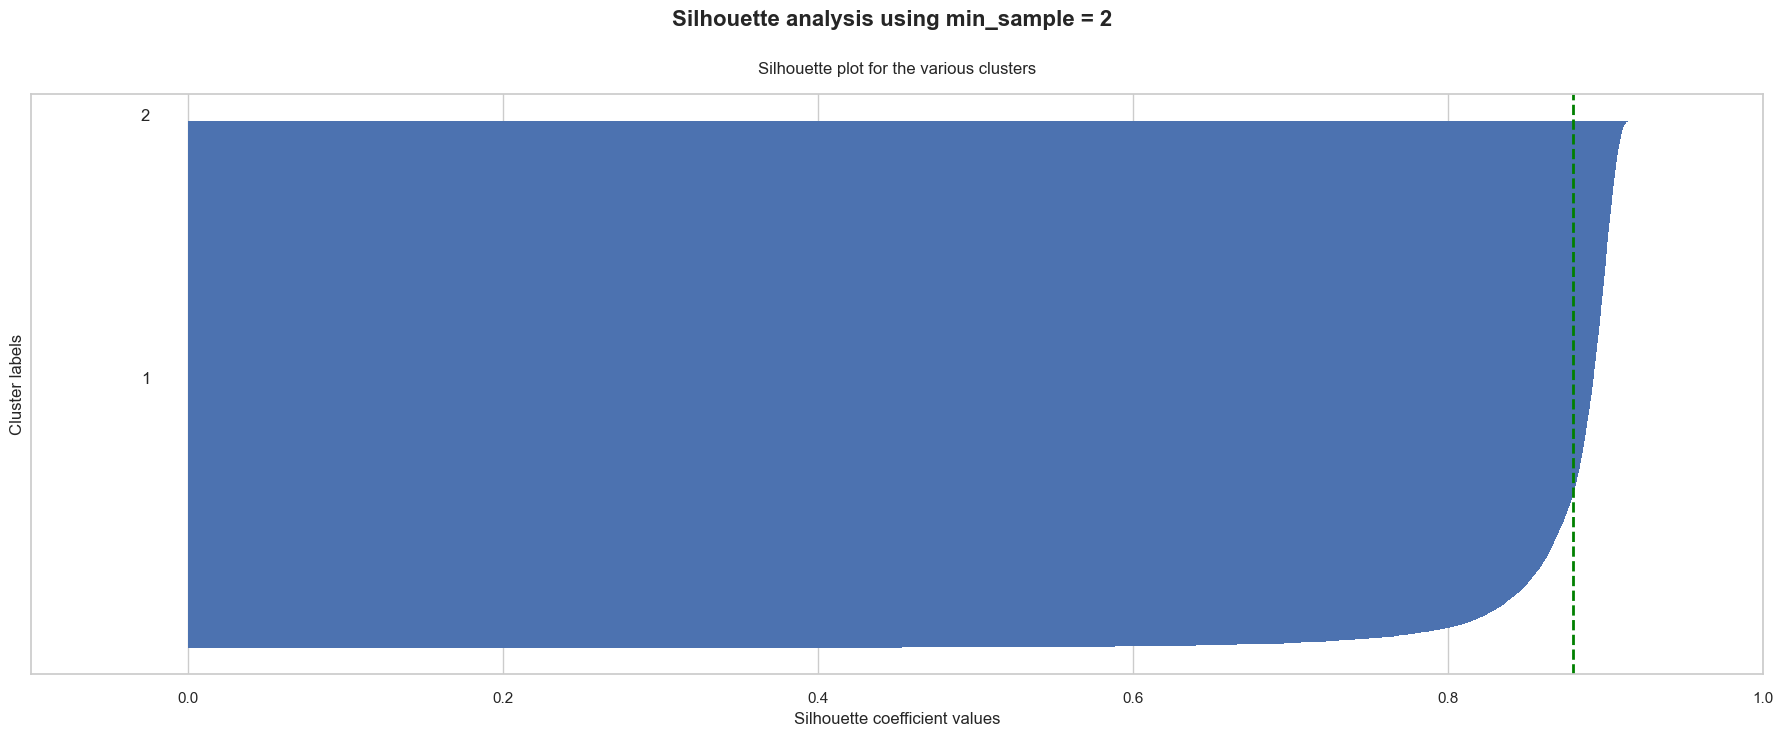

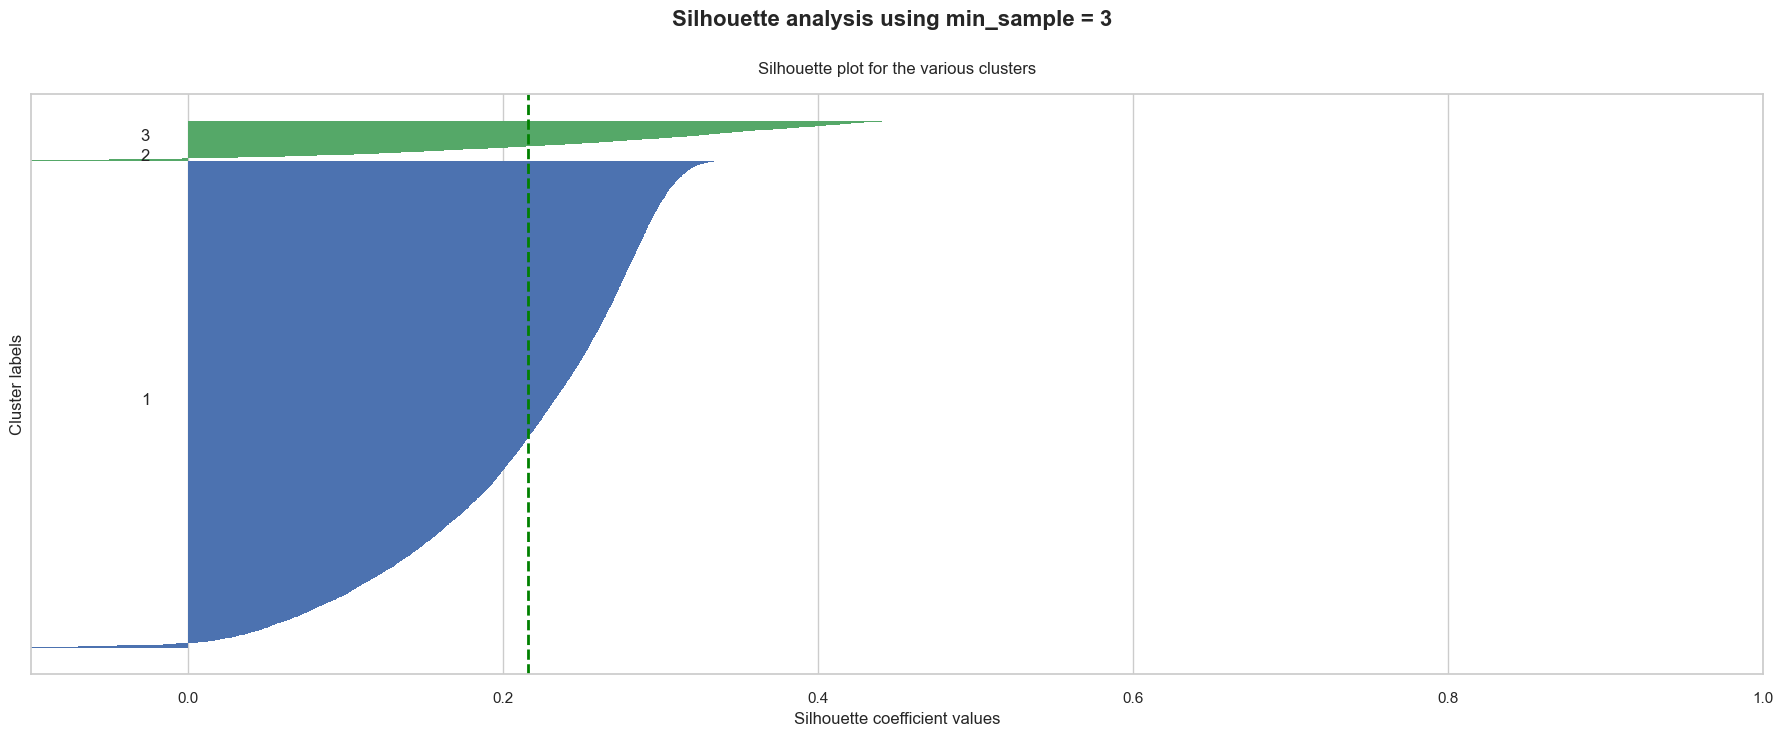

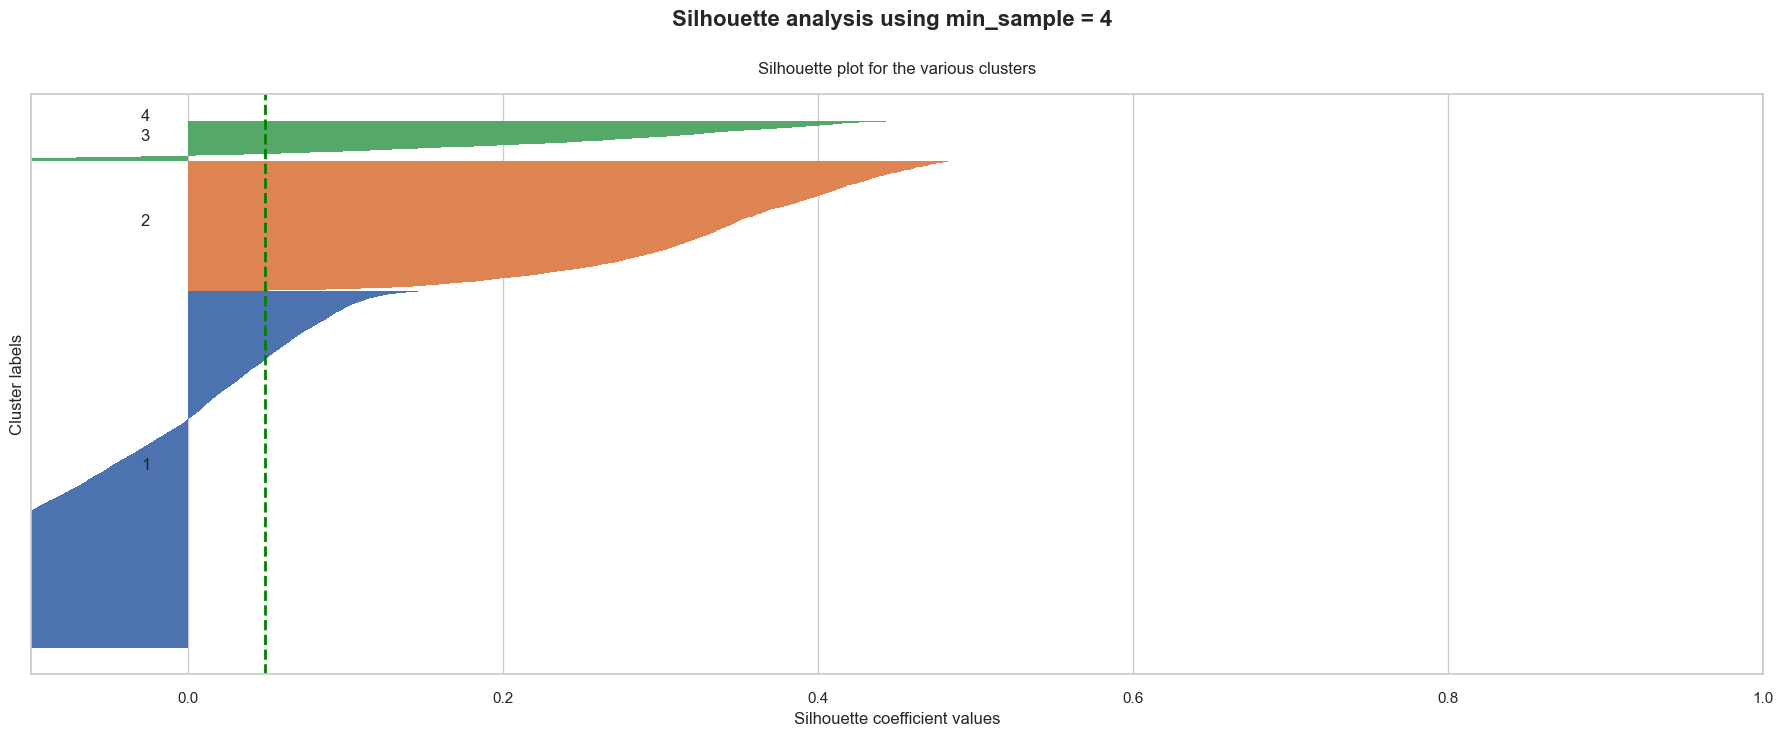

In [467]:
lista_k = list(range(2, 5))

for i, k in enumerate(lista_k):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    aglomClust = AgglomerativeClustering(n_clusters = k)
    model = aglomClust.fit(X_scaled)
    labels = model.labels_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):

        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster labels')
    ax.set_title('Silhouette plot for the various clusters', y=1.02);

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using min_sample = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

#### Definimos la cantidad de clusters

In [468]:
aglomClust = AgglomerativeClustering(n_clusters = 4)
modelo = aglomClust.fit(X_scaled)

### Graficamos el dendograma

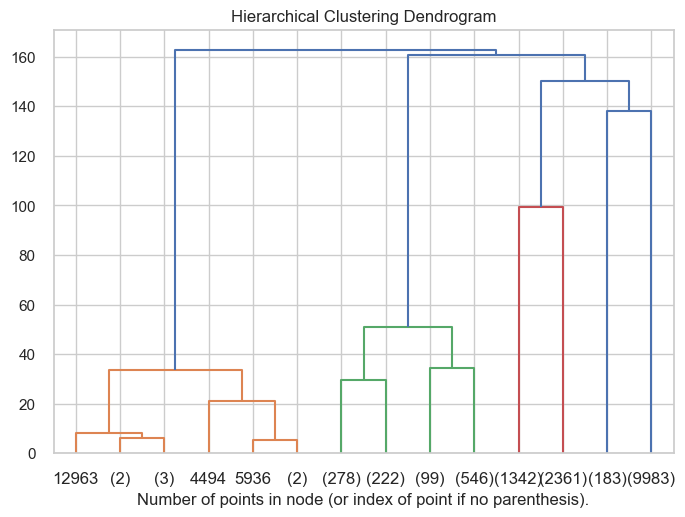

In [469]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Almacenamos los resultados para graficarlos en dos dimensiones mediante PCA y tSNE



In [470]:
df_pca['cluster'] = modelo.labels_
df_tsne['cluster'] = modelo.labels_

Text(0.5, 1.0, 'PCA 2D')

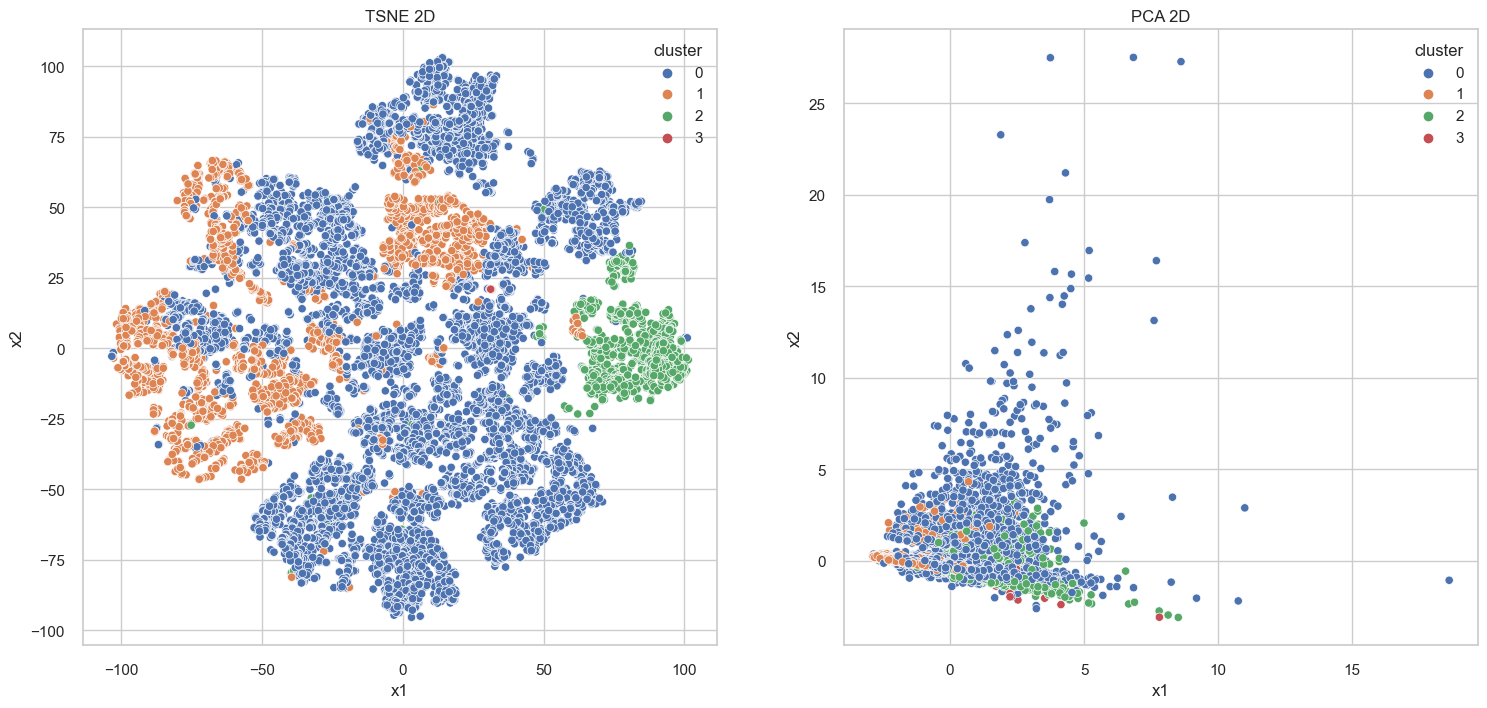

In [471]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

sns.scatterplot(data=df_tsne,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[0], palette="deep")
ax[0].set_title('TSNE 2D')
sns.scatterplot(data = df_pca,x = 'x1',y = 'x2', hue = 'cluster',ax=ax[1], palette="deep")
ax[1].set_title('PCA 2D')